Diagnostics notebook for Pypico

In [1]:
import zmq
import time
import logging
import sys

from motorControl import MotorControl
from cmdparse import SCPIParser
import numpy as np
import matplotlib.pyplot as plt

import pypico_settings

port = 5000

# setup logging
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)
# create a file handler for the logger
fh = logging.FileHandler('motorControl.log')
fh.setLevel(logging.DEBUG)
# create a console handler for the logger
ch = logging.StreamHandler()
ch.setLevel(logging.INFO)
# create format for log file
fformatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
cformatter = logging.Formatter('%(levelname)s - %(message)s')
fh.setFormatter(fformatter)
ch.setFormatter(cformatter)
# add the handlers to the logger
logger.addHandler(fh)
logger.addHandler(ch)
# setup motor controller
mc = MotorControl(pypico_settings, logger,persist=True)

INFO - Connection to 192.168.1.121:23 succeeded.
WARNING - Hard starting, motor check will be performed.
INFO - Response: ''

INFO - Sending next command(0): 've?\r\n'
INFO - Response: '\xff\xfd\x03\xff\xfb\x018742 Version 2.2 08/01/13'

INFO - Sending next command(1): '*idn?\r\n'
INFO - Response: 'New_Focus 8742 v2.2 08/01/13 10948'

INFO - Sending next command(2): 'mc\r\n'
INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Sending next command(3): '1qm?\r\n'
INFO - Response: '2'

INFO - Motor 1: type 2
INFO - Response: ''

INFO - Sending next command(4): '1ac?\r\n'
INFO - Response: '100000'

INFO - Sending next command(5): '1va?\r\n'
INFO - Response: '1750'

INFO - Sending next command(6): '1tp?\r\n'
INFO - Response: '-24595'

INFO - Sending next command(7): '2qm?\r\n'
INFO - Response: '2'



motor types:  [2, 0, 0, 0]
motor types: 

INFO - Motor 2: type 2
INFO - Response: ''

INFO - Sending next command(8): '2ac?\r\n'
INFO - Response: '100000'

INFO - Sending next command(9): '2va?\r\n'
INFO - Response: '1750'

INFO - Sending next command(10): '2tp?\r\n'
INFO - Response: '698879'

INFO - Sending next command(11): '3qm?\r\n'
INFO - Response: '2'

INFO - Motor 3: type 2
INFO - Response: ''

INFO - Sending next command(12): '3ac?\r\n'
INFO - Response: '200000'

INFO - Sending next command(13): '3va?\r\n'
INFO - Response: '1750'

INFO - Sending next command(14): '3tp?\r\n'
INFO - Response: '0'



 [2, 2, 0, 0]
motor types:  [2, 2, 2, 0]
Arduino: 


In [2]:
# checks current positions for all four channels
for i in range(0,4):
   print mc.getPosition(i)

INFO - Channel: 0 position: 0.0
INFO - Channel: 1 position: 0.0439453125
INFO - Channel: 2 position: 0.0
INFO - Channel: 3 position: 0.0


780
0
0.0
780
1
0.0439453125
480
2
0.0
480
3
0.0


In [268]:
# Channel to test
test_channel=1
positions=[]
positions.append(mc.getPosition(test_channel))

INFO - Channel: 1 position: -551.689453125


780
1


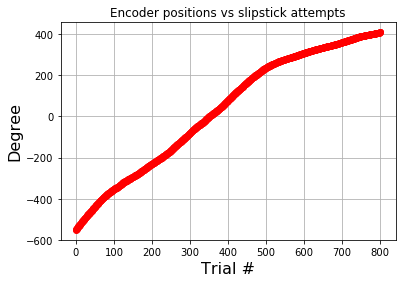

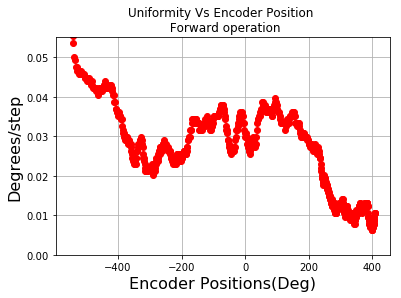

In [286]:
AbsPositions=np.array(positions)
slope=np.ediff1d(AbsPositions)/test_steps
savefig=False
# np.save('20180621_Encoder_Forward_Positions',AbsPositions)
# np.save('20180621_Encoder_Forward_Slopes',slope)
np.save('20180621_Encoder_Backward_Positions',AbsPositions)
np.save('20180621_Encoder_Backward_Slopes',slope)

# AbsPositions=np.load('20180621_Encoder_Forward_Positions.npy')
# slope=np.load('20180621_Encoder_Forward_Slopes.npy')

fig, ax = plt.subplots()
ax.plot(AbsPositions, 'ro')
ax.grid()
ax.set_title('Encoder positions vs slipstick attempts')
ax.set_ylabel('Degree',fontsize=16)
ax.set_xlabel('Trial #',fontsize=16)
if savefig:
    plt.savefig('20180621_Encoder_Backward_Operation.png')

fig, ax = plt.subplots()
ax.plot(AbsPositions[1:],slope, 'ro')
#ax.set_title('Encoder movement uniformity Vs Encoder Position \n Backward operation')
ax.set_title('Uniformity Vs Encoder Position \n Forward operation')
ax.set_ylabel('Degrees/step',fontsize=16)
ax.set_xlabel('Encoder Positions(Deg)',fontsize=16)
ax.set_ylim(0,0.055)
ax.grid()
if savefig:
    plt.savefig('20180621_Encoder_Backward_Operation_slope.png')
plt.show()



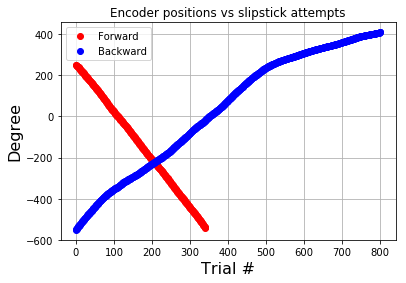

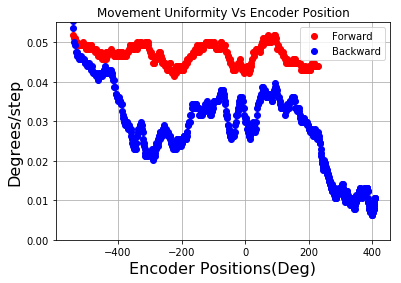

In [304]:
savefig=True

AbsPositions_Forward=np.load('20180621_Encoder_Forward_Positions.npy')
slope_Forward=np.load('20180621_Encoder_Forward_Slopes.npy')

AbsPositions_Backward=np.load('20180621_Encoder_Backward_Positions.npy')
slope_Backward=np.load('20180621_Encoder_Backward_Slopes.npy')

fig, ax = plt.subplots()
ax.plot(AbsPositions_Forward,'ro',label='Forward')
ax.plot(AbsPositions_Backward,'bo',label='Backward')
ax.grid()
ax.set_title('Encoder positions vs slipstick attempts')
ax.set_ylabel('Degree',fontsize=16)
ax.set_xlabel('Trial #',fontsize=16)
ax.legend()
if savefig:
    plt.savefig('20180621_Encoder_testing.png')
    plt.savefig('20180621_Encoder_testing.pdf')

fig, ax = plt.subplots()
ax.plot(AbsPositions_Forward[11:],slope_Forward[10:], 'ro',label='Forward')
ax.plot(AbsPositions_Backward[1:],slope_Backward, 'bo',label='Backward')
#ax.set_title('Encoder movement uniformity Vs Encoder Position \n Backward operation')
ax.set_title('Movement Uniformity Vs Encoder Position')
ax.set_ylabel('Degrees/step',fontsize=16)
ax.set_xlabel('Encoder Positions(Deg)',fontsize=16)
ax.set_ylim(0,0.055)
ax.legend()
ax.grid()
if savefig:
    plt.savefig('20180621_Encoder_Uniformity.png')
    plt.savefig('20180621_Encoder_Uniformity.pdf')
plt.show()


In [261]:


slope

array([ 0.01669922,  0.02021484,  0.02636719,  0.03164062,  0.03779297,
        0.04042969,  0.04306641,  0.04394531,  0.04306641,  0.04394531,
        0.04394531,  0.04394531,  0.04394531,  0.04394531,  0.04394531,
        0.04394531,  0.04482422,  0.04394531,  0.04482422,  0.04394531,
        0.04394531,  0.04306641,  0.04306641,  0.04394531,  0.04306641,
        0.04306641,  0.04306641,  0.04306641,  0.04394531,  0.04306641,
        0.04306641,  0.04306641,  0.04306641,  0.04394531,  0.04306641,
        0.04394531,  0.04482422,  0.04482422,  0.04482422,  0.04482422,
        0.04482422,  0.04482422,  0.04482422,  0.04570312,  0.04570312,
        0.04570312,  0.04482422,  0.04482422,  0.04482422,  0.04482422,
        0.04482422,  0.04482422,  0.04482422,  0.04482422,  0.04570312,
        0.04570312,  0.04482422,  0.04570312,  0.04658203,  0.04658203,
        0.04746094,  0.04746094,  0.04746094,  0.04833984,  0.04833984,
        0.04833984,  0.04921875,  0.04833984,  0.05009766,  0.05

Closed-loop movement test

In [305]:
positions=[]
positions.append(mc.getPosition(0))

INFO - Channel: 0 position: -3.69140625


780
0


In [310]:
mc.move_abs(1,-150)
new_position=mc.getPosition(1)
positions.append(new_position)

INFO - Channel: 1 position: -149.985351562
INFO - Already within acceptable angle error, not moving
INFO - Channel: 1 position: -149.985351562


780
1
780
1


In [6]:
positions

[-97.8662109375, -99]

Continuous position monitoring

In [4]:
positions1=[]
positions2=[]
positions3=[]
positions4=[]
positions1.append(mc.getPosition(0));
positions2.append(mc.getPosition(1));
positions3.append(mc.getPosition(2));
positions4.append(mc.getPosition(3));

start_time=time.time()
last_read_time=start_time
current_time=start_time
duration=10 # in sec
period=0.2 # in sec
while (current_time-start_time)<duration:
    current_time=time.time()
    if (current_time-last_read_time)>period:
        new_position1=mc.getPosition(0)
        positions1.append(new_position1)
        
        new_position2=mc.getPosition(1)
        positions2.append(new_position2)
        
        new_position3=mc.getPosition(2)
        positions3.append(new_position3)
        
        new_position4=mc.getPosition(3)
        positions4.append(new_position4)
        
        last_read_time=time.time()
print "DONE"

INFO - Channel: 0 position: -6063
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-6063
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -6063
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-6063
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -6063
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-6063
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -6063
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-6063
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -6063
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-6063
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -6063
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-6063
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -6063
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-6063
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -6066
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-6066
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -6457
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-6457
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -7156
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-7156
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -7841
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-7841
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -8449
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-8449
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -9597
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-9597
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -11384
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-11384
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -11636
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-11636
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -11819
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-11819
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -11819
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-11819
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -11819
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-11819
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -11808
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-11808
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -13755
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-13755
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -14630
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-14630
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -15573
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-15573
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -16363
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-16363
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -17017
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-17017
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -18972
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-18972
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -21708
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-21708
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -23763
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-23763
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -23693
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-23693
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -23869
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-23869
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -24139
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-24139
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -28014
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-28014
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -29202
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-29202
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -31040
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-31040
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -31033
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-31033
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -31257
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-31257
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -37068
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-37068
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -37018
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-37018
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -36813
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-36813
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -36839
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-36839
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -36839
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-36839
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -36839
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-36839
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -37078
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-37078
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -38142
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-38142
780
1
pos:0
480
2
pos:0
480
3
pos:0
DONE


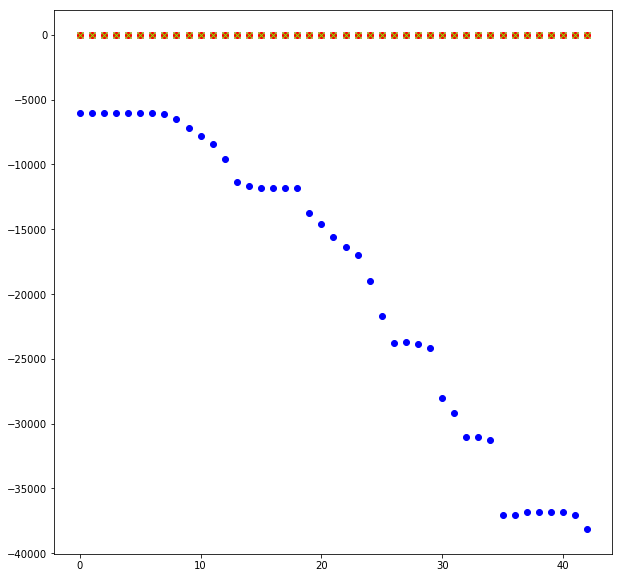

In [5]:
data1=map(int,positions1)
data2=map(int,positions2)
data3=map(int,positions3)
data4=map(int,positions4)
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10));
plt.plot(data1,'bo');
plt.plot(data2,'ro');
plt.plot(data3,'gx');
plt.plot(data4,'yx');
plt.show()

In [ ]:
data

In [239]:
mc.getPosition(1)
mc.move_abs(1,250)

INFO - Channel: 1 position: 52.294921875
INFO - Channel: 1 position: 52.294921875
INFO - avg_steps: 3756.39648438
INFO - Channel: 1 position: 52.294921875
INFO - Response: ''

INFO - Sending next command(2120): '2PR2629\r\n'


780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 108.500976562
INFO - Response: ''

INFO - Sending next command(2121): '2PR1882\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 146.162109375
INFO - Response: ''

INFO - Sending next command(2122): '2PR1381\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 175.913085938
INFO - Response: ''

INFO - Sending next command(2123): '2PR985\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 193.842773438
INFO - Response: ''

INFO - Sending next command(2124): '2PR747\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 207.158203125
INFO - Response: ''

INFO - Sending next command(2125): '2PR570\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 218.012695312
INFO - Response: ''

INFO - Sending next command(2126): '2PR425\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 225.263671875
INFO - Response: ''

INFO - Sending next command(2127): '2PR329\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 231.064453125
INFO - Response: ''

INFO - Sending next command(2128): '2PR252\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 235.283203125
INFO - Response: ''

INFO - Sending next command(2129): '2PR196\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 238.18359375
INFO - Response: ''

INFO - Sending next command(2130): '2PR157\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 240.424804688
INFO - Response: ''

INFO - Sending next command(2131): '2PR127\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 242.006835938
INFO - Response: ''

INFO - Sending next command(2132): '2PR106\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 243.28125
INFO - Response: ''

INFO - Sending next command(2133): '2PR89\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 244.3359375
INFO - Response: ''

INFO - Sending next command(2134): '2PR75\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 245.302734375
INFO - Response: ''

INFO - Sending next command(2135): '2PR62\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 246.181640625
INFO - Response: ''

INFO - Sending next command(2136): '2PR51\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 246.97265625
INFO - Response: ''

INFO - Sending next command(2137): '2PR40\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 247.67578125
INFO - Response: ''

INFO - Sending next command(2138): '2PR31\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 248.247070312
INFO - Response: ''

INFO - Sending next command(2139): '2PR23\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 248.686523438
ERROR - Current position 248.686523438 deg. Setpoint not achieved by -1.3134765625 deg after max iterations.


780
1


0

In [1]:
for i in range(0,4):
   print mc.getPosition(i)

NameError: name 'mc' is not defined

In [219]:
## Closed-loop movement testing


In [31]:
import numpy as np
test_channel=1
random_sequence=np.random.uniform(-15,15,150)
starting_point=0
#print random_sequence


In [32]:
positions=[]
mc.move_abs(test_channel,np.median(random_sequence)) #move it back to zero.
positions.append(mc.getPosition(test_channel))
tracker = 1
for i in random_sequence:
    print 'tracker: ', tracker
    tracker += 1
    mc.move_abs(test_channel,i)
    new_position=mc.getPosition(test_channel)
    positions.append(new_position)
print positions

INFO - Channel: 1 position: -0.3955078125
INFO - avg_steps: 10.5173790673
INFO - Channel: 1 position: -0.3955078125
INFO - Response: ''

INFO - Sending next command(480): '2PR7\r\n'


780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 0.087890625
INFO - Response: ''

INFO - Sending next command(481): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 0.17578125
INFO - New motor position is 0.17578125 deg, error 0.0177427958006 deg.
INFO - Channel: 1 position: 0.17578125
INFO - Channel: 1 position: 0.17578125
INFO - avg_steps: -110.390034349
INFO - Need to go negative. Current position 0.17578125 DEG. Setpoint -5.63422055784 DEG. Steps to be taken: -1110
INFO - Response: ''

INFO - Sending next command(482): '2PR-1110\r\n'


780
1
780
1
tracker:  1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -55.107421875
INFO - Response: ''

INFO - Sending next command(483): '2PR658\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -11.77734375
INFO - Response: ''

INFO - Sending next command(484): '2PR82\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -6.15234375
INFO - Response: ''

INFO - Sending next command(485): '2PR7\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -5.6689453125
INFO - Response: ''

INFO - Sending next command(486): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -5.5810546875
INFO - New motor position is -5.5810546875 deg, error 0.0531658703415 deg.
INFO - Channel: 1 position: -5.5810546875
INFO - Channel: 1 position: -5.5810546875
INFO - avg_steps: 373.251376054
INFO - Channel: 1 position: -5.5810546875
INFO - Response: ''

INFO - Sending next command(487): '2PR261\r\n'


780
1
780
1
tracker:  2
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 11.9091796875
INFO - Response: ''

INFO - Sending next command(488): '2PR29\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 13.9306640625
INFO - Response: ''

INFO - Sending next command(489): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 14.0625
INFO - New motor position is 14.0625 deg, error -0.00125457852145 deg.
INFO - Channel: 1 position: 14.0625
INFO - Channel: 1 position: 14.0625
INFO - avg_steps: -455.45464101
INFO - Need to go negative. Current position 14.0625 DEG. Setpoint -9.90879689528 DEG. Steps to be taken: -1455
INFO - Response: ''

INFO - Sending next command(490): '2PR-1455\r\n'


780
1
780
1
tracker:  3
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -58.974609375
INFO - Response: ''

INFO - Sending next command(491): '2PR653\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -16.2158203125
INFO - Response: ''

INFO - Sending next command(492): '2PR84\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -10.546875
INFO - Response: ''

INFO - Sending next command(493): '2PR8\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -10.01953125
INFO - Response: ''

INFO - Sending next command(494): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -9.931640625
INFO - New motor position is -9.931640625 deg, error -0.0228437297162 deg.
INFO - Channel: 1 position: -9.931640625
INFO - Channel: 1 position: -9.931640625
INFO - avg_steps: 286.5320682
INFO - Channel: 1 position: -9.931640625
INFO - Response: ''

INFO - Sending next command(495): '2PR201\r\n'


780
1
780
1
tracker:  4
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 3.4716796875
INFO - Response: ''

INFO - Sending next command(496): '2PR22\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 5.0537109375
INFO - Response: ''

INFO - Sending next command(497): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 5.09765625
INFO - Response: ''

INFO - Sending next command(498): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 5.185546875
INFO - New motor position is 5.185546875 deg, error 0.0365523315559 deg.
INFO - Channel: 1 position: 5.185546875
INFO - Channel: 1 position: 5.185546875
INFO - avg_steps: -337.694025794
INFO - Need to go negative. Current position 5.185546875 DEG. Setpoint -12.5878229036 DEG. Steps to be taken: -1338
INFO - Response: ''

INFO - Sending next command(499): '2PR-1338\r\n'


780
1
780
1
tracker:  5
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -61.0400390625
INFO - Response: ''

INFO - Sending next command(500): '2PR644\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -19.16015625
INFO - Response: ''

INFO - Sending next command(501): '2PR87\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -13.18359375
INFO - Response: ''

INFO - Sending next command(502): '2PR8\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -12.65625
INFO - Response: ''

INFO - Sending next command(503): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -12.568359375
INFO - New motor position is -12.568359375 deg, error 0.0194635286423 deg.
INFO - Channel: 1 position: -12.568359375
INFO - Channel: 1 position: -12.568359375
INFO - avg_steps: 455.051971128
INFO - Channel: 1 position: -12.568359375
INFO - Response: ''

INFO - Sending next command(504): '2PR319\r\n'


780
1
780
1
tracker:  6
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 8.61328125
INFO - Response: ''

INFO - Sending next command(505): '2PR37\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 11.162109375
INFO - Response: ''

INFO - Sending next command(506): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 11.3818359375
INFO - New motor position is 11.3818359375 deg, error 9.15689188332e-05 deg.
INFO - Channel: 1 position: 11.3818359375
INFO - Channel: 1 position: 11.3818359375
INFO - avg_steps: -382.994005959
INFO - Need to go negative. Current position 11.3818359375 DEG. Setpoint -8.7757433235 DEG. Steps to be taken: -1383
INFO - Response: ''

INFO - Sending next command(507): '2PR-1383\r\n'


780
1
780
1
tracker:  7
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -57.744140625
INFO - Response: ''

INFO - Sending next command(508): '2PR651\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -15.556640625
INFO - Response: ''

INFO - Sending next command(509): '2PR90\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -9.4921875
INFO - Response: ''

INFO - Sending next command(510): '2PR10\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -8.7451171875
INFO - New motor position is -8.7451171875 deg, error 0.0306261359998 deg.
INFO - Channel: 1 position: -8.7451171875
INFO - Channel: 1 position: -8.7451171875
INFO - avg_steps: 207.721619775
INFO - Channel: 1 position: -8.7451171875
INFO - Response: ''

INFO - Sending next command(511): '2PR145\r\n'


780
1
780
1
tracker:  8
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 0.87890625
INFO - Response: ''

INFO - Sending next command(512): '2PR17\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 2.0654296875
INFO - Response: ''

INFO - Sending next command(513): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 2.197265625
INFO - New motor position is 2.197265625 deg, error 0.00966598221265 deg.
INFO - Channel: 1 position: 2.197265625
INFO - Channel: 1 position: 2.197265625
INFO - avg_steps: -106.37019188
INFO - Need to go negative. Current position 2.197265625 DEG. Setpoint -3.40116552656 DEG. Steps to be taken: -1106
INFO - Response: ''

INFO - Sending next command(514): '2PR-1106\r\n'


780
1
780
1
tracker:  9
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -52.5146484375
INFO - Response: ''

INFO - Sending next command(515): '2PR653\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -10.2392578125
INFO - Response: ''

INFO - Sending next command(516): '2PR91\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -4.21875
INFO - Response: ''

INFO - Sending next command(517): '2PR11\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -3.4716796875
INFO - Response: ''

INFO - Sending next command(518): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -3.3837890625
INFO - New motor position is -3.3837890625 deg, error 0.0173764640645 deg.
INFO - Channel: 1 position: -3.3837890625
INFO - Channel: 1 position: -3.3837890625
INFO - avg_steps: -209.047337442
INFO - Need to go negative. Current position -3.3837890625 DEG. Setpoint -14.3862805068 DEG. Steps to be taken: -1209
INFO - Response: ''

INFO - Sending next command(519): '2PR-1209\r\n'


780
1
780
1
tracker:  10
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -62.578125
INFO - Response: ''

INFO - Sending next command(520): '2PR641\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -21.3134765625
INFO - Response: ''

INFO - Sending next command(521): '2PR92\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -15.1171875
INFO - Response: ''

INFO - Sending next command(522): '2PR10\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -14.4140625
INFO - Response: ''

INFO - Sending next command(523): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -14.3701171875
INFO - New motor position is -14.3701171875 deg, error 0.0161633193111 deg.
INFO - Channel: 1 position: -14.3701171875
INFO - Channel: 1 position: -14.3701171875
INFO - avg_steps: 389.457396339
INFO - Channel: 1 position: -14.3701171875
INFO - Response: ''

INFO - Sending next command(524): '2PR273\r\n'


780
1
780
1
tracker:  11
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 3.779296875
INFO - Response: ''

INFO - Sending next command(525): '2PR31\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 5.9326171875
INFO - Response: ''

INFO - Sending next command(526): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 6.15234375
INFO - New motor position is 6.15234375 deg, error 0.0247032354276 deg.
INFO - Channel: 1 position: 6.15234375
INFO - Channel: 1 position: 6.15234375
INFO - avg_steps: -340.483098464
INFO - Need to go negative. Current position 6.15234375 DEG. Setpoint -11.7678193271 DEG. Steps to be taken: -1340
INFO - Response: ''

INFO - Sending next command(527): '2PR-1340\r\n'


780
1
780
1
tracker:  12
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -60.4248046875
INFO - Response: ''

INFO - Sending next command(528): '2PR647\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -18.8525390625
INFO - Response: ''

INFO - Sending next command(529): '2PR94\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -12.48046875
INFO - Response: ''

INFO - Sending next command(530): '2PR9\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -11.865234375
INFO - Response: ''

INFO - Sending next command(531): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -11.77734375
INFO - New motor position is -11.77734375 deg, error -0.0095244229421 deg.
INFO - Channel: 1 position: -11.77734375
INFO - Channel: 1 position: -11.77734375
INFO - avg_steps: 386.344220323
INFO - Channel: 1 position: -11.77734375
INFO - Response: ''

INFO - Sending next command(532): '2PR270\r\n'


780
1
780
1
tracker:  13
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 6.1083984375
INFO - Response: ''

INFO - Sending next command(533): '2PR33\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 8.349609375
INFO - Response: ''

INFO - Sending next command(534): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 8.5693359375
INFO - New motor position is 8.5693359375 deg, error 0.0127733547219 deg.
INFO - Channel: 1 position: 8.5693359375
INFO - Channel: 1 position: 8.5693359375
INFO - avg_steps: -110.947740179
INFO - Need to go negative. Current position 8.5693359375 DEG. Setpoint 2.72998119124 DEG. Steps to be taken: -1111
INFO - Response: ''

INFO - Sending next command(535): '2PR-1111\r\n'


780
1
780
1
tracker:  14
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -47.2412109375
INFO - Response: ''

INFO - Sending next command(536): '2PR665\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -4.2626953125
INFO - Response: ''

INFO - Sending next command(537): '2PR93\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 1.8896484375
INFO - Response: ''

INFO - Sending next command(538): '2PR11\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 2.63671875
INFO - Response: ''

INFO - Sending next command(539): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 2.6806640625
INFO - Response: ''

INFO - Sending next command(540): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 2.7685546875
INFO - New motor position is 2.7685546875 deg, error 0.0385734962574 deg.
INFO - Channel: 1 position: 2.7685546875
INFO - Channel: 1 position: 2.7685546875
INFO - avg_steps: 134.227893486
INFO - Channel: 1 position: 2.7685546875
INFO - Response: ''

INFO - Sending next command(541): '2PR94\r\n'


780
1
780
1
tracker:  15
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 9.0087890625
INFO - Response: ''

INFO - Sending next command(542): '2PR11\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 9.7119140625
INFO - Response: ''

INFO - Sending next command(543): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 9.84375
INFO - New motor position is 9.84375 deg, error 0.0105693395729 deg.
INFO - Channel: 1 position: 9.84375
INFO - Channel: 1 position: 9.84375
INFO - avg_steps: -78.7306493734
INFO - Need to go negative. Current position 9.84375 DEG. Setpoint 5.70003161193 DEG. Steps to be taken: -1079
INFO - Response: ''

INFO - Sending next command(544): '2PR-1079\r\n'


780
1
780
1
tracker:  16
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -44.6923828125
INFO - Response: ''

INFO - Sending next command(545): '2PR670\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -1.4501953125
INFO - Response: ''

INFO - Sending next command(546): '2PR95\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 4.74609375
INFO - Response: ''

INFO - Sending next command(547): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 5.5810546875
INFO - Response: ''

INFO - Sending next command(548): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 5.7568359375
INFO - New motor position is 5.7568359375 deg, error 0.0568043255715 deg.
INFO - Channel: 1 position: 5.7568359375
INFO - Channel: 1 position: 5.7568359375
INFO - avg_steps: -353.870582889
INFO - Need to go negative. Current position 5.7568359375 DEG. Setpoint -12.867931583 DEG. Steps to be taken: -1354
INFO - Response: ''

INFO - Sending next command(549): '2PR-1354\r\n'


780
1
780
1
tracker:  17
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -61.7431640625
INFO - Response: ''

INFO - Sending next command(550): '2PR650\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -20.21484375
INFO - Response: ''

INFO - Sending next command(551): '2PR98\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -13.623046875
INFO - Response: ''

INFO - Sending next command(552): '2PR10\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -12.919921875
INFO - Response: ''

INFO - Sending next command(553): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -12.83203125
INFO - New motor position is -12.83203125 deg, error 0.0359003329684 deg.
INFO - Channel: 1 position: -12.83203125
INFO - Channel: 1 position: -12.83203125
INFO - avg_steps: 271.389714347
INFO - Channel: 1 position: -12.83203125
INFO - Response: ''

INFO - Sending next command(554): '2PR190\r\n'


780
1
780
1
tracker:  18
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -0.263671875
INFO - Response: ''

INFO - Sending next command(555): '2PR23\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 1.3623046875
INFO - Response: ''

INFO - Sending next command(556): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 1.4501953125
INFO - New motor position is 1.4501953125 deg, error -0.0014426136435 deg.
INFO - Channel: 1 position: 1.4501953125
INFO - Channel: 1 position: 1.4501953125
INFO - avg_steps: -262.565346056
INFO - Need to go negative. Current position 1.4501953125 DEG. Setpoint -12.3690334273 DEG. Steps to be taken: -1263
INFO - Response: ''

INFO - Sending next command(557): '2PR-1263\r\n'


780
1
780
1
tracker:  19
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -61.171875
INFO - Response: ''

INFO - Sending next command(558): '2PR649\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -19.775390625
INFO - Response: ''

INFO - Sending next command(559): '2PR99\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -13.18359375
INFO - Response: ''

INFO - Sending next command(560): '2PR11\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -12.392578125
INFO - New motor position is -12.392578125 deg, error -0.0235446976847 deg.
INFO - Channel: 1 position: -12.392578125
INFO - Channel: 1 position: -12.392578125
INFO - avg_steps: 162.272122883
INFO - Channel: 1 position: -12.392578125
INFO - Response: ''

INFO - Sending next command(561): '2PR114\r\n'


780
1
780
1
tracker:  20
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -4.833984375
INFO - Response: ''

INFO - Sending next command(562): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -3.9111328125
INFO - Response: ''

INFO - Sending next command(563): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -3.8671875
INFO - New motor position is -3.8671875 deg, error -0.0152474214502 deg.
INFO - Channel: 1 position: -3.8671875
INFO - Channel: 1 position: -3.8671875
INFO - avg_steps: 310.362049505
INFO - Channel: 1 position: -3.8671875
INFO - Response: ''

INFO - Sending next command(564): '2PR217\r\n'


780
1
780
1
tracker:  21
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 10.37109375
INFO - Response: ''

INFO - Sending next command(565): '2PR28\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 12.3046875
INFO - Response: ''

INFO - Sending next command(566): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 12.4365234375
INFO - Response: ''

INFO - Sending next command(567): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 12.5244140625
INFO - New motor position is 12.5244140625 deg, error 0.0567568517005 deg.
INFO - Channel: 1 position: 12.5244140625
INFO - Channel: 1 position: 12.5244140625
INFO - avg_steps: 16.3281817969
INFO - Channel: 1 position: 12.5244140625
INFO - Response: ''

INFO - Sending next command(568): '2PR11\r\n'


780
1
780
1
tracker:  22
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 13.2275390625
INFO - Response: ''

INFO - Sending next command(569): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 13.359375
INFO - New motor position is 13.359375 deg, error -0.0244170518098 deg.
INFO - Channel: 1 position: 13.359375
INFO - Channel: 1 position: 13.359375
INFO - avg_steps: -268.026735431
INFO - Need to go negative. Current position 13.359375 DEG. Setpoint -0.747295285844 DEG. Steps to be taken: -1268
INFO - Response: ''

INFO - Sending next command(570): '2PR-1268\r\n'


780
1
780
1
tracker:  23
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -51.240234375
INFO - Response: ''

INFO - Sending next command(571): '2PR672\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -7.734375
INFO - Response: ''

INFO - Sending next command(572): '2PR93\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -1.5380859375
INFO - Response: ''

INFO - Sending next command(573): '2PR11\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -0.791015625
INFO - Response: ''

INFO - Sending next command(574): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -0.703125
INFO - New motor position is -0.703125 deg, error 0.0441702858441 deg.
INFO - Channel: 1 position: -0.703125
INFO - Channel: 1 position: -0.703125
INFO - avg_steps: 159.770814793
INFO - Channel: 1 position: -0.703125
INFO - Response: ''

INFO - Sending next command(575): '2PR112\r\n'


780
1
780
1
tracker:  24
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 6.591796875
INFO - Response: ''

INFO - Sending next command(576): '2PR15\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 7.6025390625
INFO - Response: ''

INFO - Sending next command(577): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 7.6904296875
INFO - New motor position is 7.6904296875 deg, error -0.0154355647811 deg.
INFO - Channel: 1 position: 7.6904296875
INFO - Channel: 1 position: 7.6904296875
INFO - avg_steps: -393.536651054
INFO - Need to go negative. Current position 7.6904296875 DEG. Setpoint -13.0220256311 DEG. Steps to be taken: -1394
INFO - Response: ''

INFO - Sending next command(578): '2PR-1394\r\n'


780
1
780
1
tracker:  25
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -62.314453125
INFO - Response: ''

INFO - Sending next command(579): '2PR656\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -20.302734375
INFO - Response: ''

INFO - Sending next command(580): '2PR97\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -13.7548828125
INFO - Response: ''

INFO - Sending next command(581): '2PR10\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -13.0517578125
INFO - Response: ''

INFO - Sending next command(582): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -12.9638671875
INFO - New motor position is -12.9638671875 deg, error 0.0581584436354 deg.
INFO - Channel: 1 position: -12.9638671875
INFO - Channel: 1 position: -12.9638671875
INFO - avg_steps: 245.947850614
INFO - Channel: 1 position: -12.9638671875
INFO - Response: ''

INFO - Sending next command(583): '2PR172\r\n'


780
1
780
1
tracker:  26
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -1.5380859375
INFO - Response: ''

INFO - Sending next command(584): '2PR20\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -0.1318359375
INFO - Response: ''

INFO - Sending next command(585): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -0.087890625
INFO - Response: ''

INFO - Sending next command(586): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 0.0
INFO - New motor position is 0.0 deg, error 0.0192434709826 deg.
INFO - Channel: 1 position: 0.0
INFO - Channel: 1 position: 0.0
INFO - avg_steps: -169.755843303
INFO - Need to go negative. Current position 0.0 DEG. Setpoint -8.93451806857 DEG. Steps to be taken: -1170
INFO - Response: ''

INFO - Sending next command(587): '2PR-1170\r\n'


780
1
780
1
tracker:  27
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -58.18359375
INFO - Response: ''

INFO - Sending next command(588): '2PR655\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -16.3037109375
INFO - Response: ''

INFO - Sending next command(589): '2PR98\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -9.7998046875
INFO - Response: ''

INFO - Sending next command(590): '2PR12\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -8.96484375
INFO - Response: ''

INFO - Sending next command(591): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -8.9208984375
INFO - New motor position is -8.9208984375 deg, error 0.0136196310699 deg.
INFO - Channel: 1 position: -8.9208984375
INFO - Channel: 1 position: -8.9208984375
INFO - avg_steps: 358.80555311
INFO - Channel: 1 position: -8.9208984375
INFO - Response: ''

INFO - Sending next command(592): '2PR251\r\n'


780
1
780
1
tracker:  28
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 7.6904296875
INFO - Response: ''

INFO - Sending next command(593): '2PR30\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 9.755859375
INFO - Response: ''

INFO - Sending next command(594): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 9.931640625
INFO - Response: ''

INFO - Sending next command(595): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 10.01953125
INFO - New motor position is 10.01953125 deg, error 0.055926892243 deg.
INFO - Channel: 1 position: 10.01953125
INFO - Channel: 1 position: 10.01953125
INFO - avg_steps: -99.7039545431
INFO - Need to go negative. Current position 10.01953125 DEG. Setpoint 4.7719546951 DEG. Steps to be taken: -1100
INFO - Response: ''

INFO - Sending next command(596): '2PR-1100\r\n'


780
1
780
1
tracker:  29
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -45.8349609375
INFO - Response: ''

INFO - Sending next command(597): '2PR673\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -2.548828125
INFO - Response: ''

INFO - Sending next command(598): '2PR97\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 3.8671875
INFO - Response: ''

INFO - Sending next command(599): '2PR12\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 4.658203125
INFO - Response: ''

INFO - Sending next command(600): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 4.7900390625
INFO - New motor position is 4.7900390625 deg, error 0.0180843673984 deg.
INFO - Channel: 1 position: 4.7900390625
INFO - Channel: 1 position: 4.7900390625
INFO - avg_steps: 133.024831095
INFO - Channel: 1 position: 4.7900390625
INFO - Response: ''

INFO - Sending next command(601): '2PR93\r\n'


780
1
780
1
tracker:  30
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 10.8984375
INFO - Response: ''

INFO - Sending next command(602): '2PR12\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 11.689453125
INFO - Response: ''

INFO - Sending next command(603): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 11.77734375
INFO - New motor position is 11.77734375 deg, error -0.0140022122244 deg.
INFO - Channel: 1 position: 11.77734375
INFO - Channel: 1 position: 11.77734375
INFO - avg_steps: -407.696455534
INFO - Need to go negative. Current position 11.77734375 DEG. Setpoint -9.68036443599 DEG. Steps to be taken: -1408
INFO - Response: ''

INFO - Sending next command(604): '2PR-1408\r\n'


780
1
780
1
tracker:  31
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -59.4580078125
INFO - Response: ''

INFO - Sending next command(605): '2PR662\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -17.2705078125
INFO - Response: ''

INFO - Sending next command(606): '2PR101\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -10.458984375
INFO - Response: ''

INFO - Sending next command(607): '2PR10\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -9.755859375
INFO - Response: ''

INFO - Sending next command(608): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -9.66796875
INFO - New motor position is -9.66796875 deg, error 0.0123956859873 deg.
INFO - Channel: 1 position: -9.66796875
INFO - Channel: 1 position: -9.66796875
INFO - avg_steps: -80.6627210622
INFO - Need to go negative. Current position -9.66796875 DEG. Setpoint -13.9133751217 DEG. Steps to be taken: -1081
INFO - Response: ''

INFO - Sending next command(609): '2PR-1081\r\n'


780
1
780
1
tracker:  32
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -62.9736328125
INFO - Response: ''

INFO - Sending next command(610): '2PR653\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -21.4892578125
INFO - Response: ''

INFO - Sending next command(611): '2PR101\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -14.677734375
INFO - Response: ''

INFO - Sending next command(612): '2PR10\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -13.974609375
INFO - Response: ''

INFO - Sending next command(613): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -13.88671875
INFO - New motor position is -13.88671875 deg, error 0.0266563716961 deg.
INFO - Channel: 1 position: -13.88671875
INFO - Channel: 1 position: -13.88671875
INFO - avg_steps: 41.7280072754
INFO - Channel: 1 position: -13.88671875
INFO - Response: ''

INFO - Sending next command(614): '2PR29\r\n'


780
1
780
1
tracker:  33
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -11.865234375
INFO - Response: ''

INFO - Sending next command(615): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -11.7333984375
INFO - Response: ''

INFO - Sending next command(616): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -11.689453125
INFO - New motor position is -11.689453125 deg, error 0.00105471576958 deg.
INFO - Channel: 1 position: -11.689453125
INFO - Channel: 1 position: -11.689453125
INFO - avg_steps: 276.42843328
INFO - Channel: 1 position: -11.689453125
INFO - Response: ''

INFO - Sending next command(617): '2PR193\r\n'


780
1
780
1
tracker:  34
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 1.0107421875
INFO - Response: ''

INFO - Sending next command(618): '2PR25\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 2.7685546875
INFO - Response: ''

INFO - Sending next command(619): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 2.8564453125
INFO - New motor position is 2.8564453125 deg, error -0.00296647198573 deg.
INFO - Channel: 1 position: 2.8564453125
INFO - Channel: 1 position: 2.8564453125
INFO - avg_steps: 169.483306415
INFO - Channel: 1 position: 2.8564453125
INFO - Response: ''

INFO - Sending next command(620): '2PR119\r\n'


780
1
780
1
tracker:  35
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 10.634765625
INFO - Response: ''

INFO - Sending next command(621): '2PR15\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 11.6455078125
INFO - Response: ''

INFO - Sending next command(622): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 11.77734375
INFO - New motor position is 11.77734375 deg, error 0.000724415659729 deg.
INFO - Channel: 1 position: 11.77734375
INFO - Channel: 1 position: 11.77734375
INFO - avg_steps: -67.0766551067
INFO - Need to go negative. Current position 11.77734375 DEG. Setpoint 8.24699348123 DEG. Steps to be taken: -1067
INFO - Response: ''

INFO - Sending next command(623): '2PR-1067\r\n'


780
1
780
1
tracker:  36
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -42.6708984375
INFO - Response: ''

INFO - Sending next command(624): '2PR677\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 1.0107421875
INFO - Response: ''

INFO - Sending next command(625): '2PR96\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 7.294921875
INFO - Response: ''

INFO - Sending next command(626): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 8.173828125
INFO - Response: ''

INFO - Sending next command(627): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 8.2177734375
INFO - Response: ''

INFO - Sending next command(628): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 8.3056640625
INFO - New motor position is 8.3056640625 deg, error 0.0586705812747 deg.
INFO - Channel: 1 position: 8.3056640625
INFO - Channel: 1 position: 8.3056640625
INFO - avg_steps: -272.848541639
INFO - Need to go negative. Current position 8.3056640625 DEG. Setpoint -6.05478549745 DEG. Steps to be taken: -1273
INFO - Response: ''

INFO - Sending next command(629): '2PR-1273\r\n'


780
1
780
1
tracker:  37
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -55.8984375
INFO - Response: ''

INFO - Sending next command(630): '2PR663\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -13.6669921875
INFO - Response: ''

INFO - Sending next command(631): '2PR101\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -6.8994140625
INFO - Response: ''

INFO - Sending next command(632): '2PR11\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -6.15234375
INFO - Response: ''

INFO - Sending next command(633): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -6.1083984375
INFO - Response: ''

INFO - Sending next command(634): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -6.0205078125
INFO - New motor position is -6.0205078125 deg, error 0.0342776849461 deg.
INFO - Channel: 1 position: -6.0205078125
INFO - Channel: 1 position: -6.0205078125
INFO - avg_steps: 301.738182351
INFO - Channel: 1 position: -6.0205078125
INFO - Response: ''

INFO - Sending next command(635): '2PR211\r\n'


780
1
780
1
tracker:  38
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 7.822265625
INFO - Response: ''

INFO - Sending next command(636): '2PR27\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 9.66796875
INFO - Response: ''

INFO - Sending next command(637): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 9.84375
INFO - New motor position is 9.84375 deg, error -0.0166991533626 deg.
INFO - Channel: 1 position: 9.84375
INFO - Channel: 1 position: 9.84375
INFO - avg_steps: 55.5249756855
INFO - Channel: 1 position: 9.84375
INFO - Response: ''

INFO - Sending next command(638): '2PR39\r\n'


780
1
780
1
tracker:  39
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 12.392578125
INFO - Response: ''

INFO - Sending next command(639): '2PR5\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 12.7001953125
INFO - Response: ''

INFO - Sending next command(640): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 12.7880859375
INFO - New motor position is 12.7880859375 deg, error 0.0219687961573 deg.
INFO - Channel: 1 position: 12.7880859375
INFO - Channel: 1 position: 12.7880859375
INFO - avg_steps: -71.7411802107
INFO - Need to go negative. Current position 12.7880859375 DEG. Setpoint 9.01223434746 DEG. Steps to be taken: -1072
INFO - Response: ''

INFO - Sending next command(641): '2PR-1072\r\n'


780
1
780
1
tracker:  40
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -42.0556640625
INFO - Response: ''

INFO - Sending next command(642): '2PR679\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 1.845703125
INFO - Response: ''

INFO - Sending next command(643): '2PR95\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 7.91015625
INFO - Response: ''

INFO - Sending next command(644): '2PR15\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 8.876953125
INFO - Response: ''

INFO - Sending next command(645): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 9.0087890625
INFO - New motor position is 9.0087890625 deg, error -0.00344528496311 deg.
INFO - Channel: 1 position: 9.0087890625
INFO - Channel: 1 position: 9.0087890625
INFO - avg_steps: 27.7095051838
INFO - Channel: 1 position: 9.0087890625
INFO - Response: ''

INFO - Sending next command(646): '2PR19\r\n'


780
1
780
1
tracker:  41
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 10.3271484375
INFO - Response: ''

INFO - Sending next command(647): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 10.458984375
INFO - New motor position is 10.458984375 deg, error -0.00819969717444 deg.
INFO - Channel: 1 position: 10.458984375
INFO - Channel: 1 position: 10.458984375
INFO - avg_steps: -439.675875573
INFO - Need to go negative. Current position 10.458984375 DEG. Setpoint -12.6818511815 DEG. Steps to be taken: -1440
INFO - Response: ''

INFO - Sending next command(648): '2PR-1440\r\n'


780
1
780
1
tracker:  42
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -62.2705078125
INFO - Response: ''

INFO - Sending next command(649): '2PR660\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -20.1708984375
INFO - Response: ''

INFO - Sending next command(650): '2PR100\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -13.359375
INFO - Response: ''

INFO - Sending next command(651): '2PR9\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -12.744140625
INFO - Response: ''

INFO - Sending next command(652): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -12.65625
INFO - New motor position is -12.65625 deg, error 0.025601181477 deg.
INFO - Channel: 1 position: -12.65625
INFO - Channel: 1 position: -12.65625
INFO - avg_steps: 32.4821937975
INFO - Channel: 1 position: -12.65625
INFO - Response: ''

INFO - Sending next command(653): '2PR23\r\n'


780
1
780
1
tracker:  43
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -11.0302734375
INFO - Response: ''

INFO - Sending next command(654): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -10.986328125
INFO - Response: ''

INFO - Sending next command(655): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -10.8984375
INFO - New motor position is -10.8984375 deg, error 0.0482233527631 deg.
INFO - Channel: 1 position: -10.8984375
INFO - Channel: 1 position: -10.8984375
INFO - avg_steps: 115.953152479
INFO - Channel: 1 position: -10.8984375
INFO - Response: ''

INFO - Sending next command(656): '2PR81\r\n'


780
1
780
1
tracker:  44
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -5.5810546875
INFO - Response: ''

INFO - Sending next command(657): '2PR10\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -4.8779296875
INFO - Response: ''

INFO - Sending next command(658): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -4.7900390625
INFO - New motor position is -4.7900390625 deg, error 0.00560093861498 deg.
INFO - Channel: 1 position: -4.7900390625
INFO - Channel: 1 position: -4.7900390625
INFO - avg_steps: -58.2697124216
INFO - Need to go negative. Current position -4.7900390625 DEG. Setpoint -7.85686603206 DEG. Steps to be taken: -1058
INFO - Response: ''

INFO - Sending next command(659): '2PR-1058\r\n'


780
1
780
1
tracker:  45
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -57.392578125
INFO - Response: ''

INFO - Sending next command(660): '2PR659\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -15.6884765625
INFO - Response: ''

INFO - Sending next command(661): '2PR104\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -8.7451171875
INFO - Response: ''

INFO - Sending next command(662): '2PR12\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -7.91015625
INFO - Response: ''

INFO - Sending next command(663): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -7.8662109375
INFO - New motor position is -7.8662109375 deg, error -0.00934490544025 deg.
INFO - Channel: 1 position: -7.8662109375
INFO - Channel: 1 position: -7.8662109375
INFO - avg_steps: 256.787106744
INFO - Channel: 1 position: -7.8662109375
INFO - Response: ''

INFO - Sending next command(664): '2PR180\r\n'


780
1
780
1
tracker:  46
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 3.9990234375
INFO - Response: ''

INFO - Sending next command(665): '2PR22\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 5.5810546875
INFO - Response: ''

INFO - Sending next command(666): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 5.625
INFO - New motor position is 5.625 deg, error -0.0238999437736 deg.
INFO - Channel: 1 position: 5.625
INFO - Channel: 1 position: 5.625
INFO - avg_steps: -94.1910991608
INFO - Need to go negative. Current position 5.625 DEG. Setpoint 0.667573728377 DEG. Steps to be taken: -1094
INFO - Response: ''

INFO - Sending next command(667): '2PR-1094\r\n'


780
1
780
1
tracker:  47
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -49.6142578125
INFO - Response: ''

INFO - Sending next command(668): '2PR669\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -7.03125
INFO - Response: ''

INFO - Sending next command(669): '2PR102\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -0.3955078125
INFO - Response: ''

INFO - Sending next command(670): '2PR14\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 0.5712890625
INFO - Response: ''

INFO - Sending next command(671): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 0.615234375
INFO - Response: ''

INFO - Sending next command(672): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 0.703125
INFO - New motor position is 0.703125 deg, error 0.0355512716233 deg.
INFO - Channel: 1 position: 0.703125
INFO - Channel: 1 position: 0.703125
INFO - avg_steps: 224.065695076
INFO - Channel: 1 position: 0.703125
INFO - Response: ''

INFO - Sending next command(673): '2PR157\r\n'


780
1
780
1
tracker:  48
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 10.810546875
INFO - Response: ''

INFO - Sending next command(674): '2PR22\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 12.3046875
INFO - Response: ''

INFO - Sending next command(675): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 12.5244140625
INFO - New motor position is 12.5244140625 deg, error 0.028357742711 deg.
INFO - Channel: 1 position: 12.5244140625
INFO - Channel: 1 position: 12.5244140625
INFO - avg_steps: -469.480293531
INFO - Need to go negative. Current position 12.5244140625 DEG. Setpoint -12.1850750707 DEG. Steps to be taken: -1469
INFO - Response: ''

INFO - Sending next command(676): '2PR-1469\r\n'


780
1
780
1
tracker:  49
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -62.0068359375
INFO - Response: ''

INFO - Sending next command(677): '2PR663\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -19.9951171875
INFO - Response: ''

INFO - Sending next command(678): '2PR104\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -13.0517578125
INFO - Response: ''

INFO - Sending next command(679): '2PR12\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -12.1728515625
INFO - New motor position is -12.1728515625 deg, error 0.0122235082285 deg.
INFO - Channel: 1 position: -12.1728515625
INFO - Channel: 1 position: -12.1728515625
INFO - avg_steps: 298.864041723
INFO - Channel: 1 position: -12.1728515625
INFO - Response: ''

INFO - Sending next command(680): '2PR209\r\n'


780
1
780
1
tracker:  50
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 1.5380859375
INFO - Response: ''

INFO - Sending next command(681): '2PR27\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 3.3837890625
INFO - Response: ''

INFO - Sending next command(682): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 3.515625
INFO - Response: ''

INFO - Sending next command(683): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 3.603515625
INFO - New motor position is 3.603515625 deg, error 0.046680781028 deg.
INFO - Channel: 1 position: 3.603515625
INFO - Channel: 1 position: 3.603515625
INFO - avg_steps: 148.176295506
INFO - Channel: 1 position: 3.603515625
INFO - Response: ''

INFO - Sending next command(684): '2PR104\r\n'


780
1
780
1
tracker:  51
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 10.4150390625
INFO - Response: ''

INFO - Sending next command(685): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 11.2939453125
INFO - Response: ''

INFO - Sending next command(686): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 11.337890625
INFO - Response: ''

INFO - Sending next command(687): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 11.42578125
INFO - New motor position is 11.42578125 deg, error 0.0235132299328 deg.
INFO - Channel: 1 position: 11.42578125
INFO - Channel: 1 position: 11.42578125
INFO - avg_steps: -178.918192715
INFO - Need to go negative. Current position 11.42578125 DEG. Setpoint 2.009034265 DEG. Steps to be taken: -1179
INFO - Response: ''

INFO - Sending next command(688): '2PR-1179\r\n'


780
1
780
1
tracker:  52
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -48.6474609375
INFO - Response: ''

INFO - Sending next command(689): '2PR674\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -5.44921875
INFO - Response: ''

INFO - Sending next command(690): '2PR99\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 1.0107421875
INFO - Response: ''

INFO - Sending next command(691): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 1.93359375
INFO - Response: ''

INFO - Sending next command(692): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 1.9775390625
INFO - Response: ''

INFO - Sending next command(693): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 2.0654296875
INFO - New motor position is 2.0654296875 deg, error 0.0563954225022 deg.
INFO - Channel: 1 position: 2.0654296875
INFO - Channel: 1 position: 2.0654296875
INFO - avg_steps: -188.845813265
INFO - Need to go negative. Current position 2.0654296875 DEG. Setpoint -7.87382364221 DEG. Steps to be taken: -1189
INFO - Response: ''

INFO - Sending next command(694): '2PR-1189\r\n'


780
1
780
1
tracker:  53
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -57.5244140625
INFO - Response: ''

INFO - Sending next command(695): '2PR660\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -15.8203125
INFO - Response: ''

INFO - Sending next command(696): '2PR106\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -8.8330078125
INFO - Response: ''

INFO - Sending next command(697): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -7.9541015625
INFO - Response: ''

INFO - Sending next command(698): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -7.8662109375
INFO - New motor position is -7.8662109375 deg, error 0.0076127047124 deg.
INFO - Channel: 1 position: -7.8662109375
INFO - Channel: 1 position: -7.8662109375
INFO - avg_steps: -100.33545369
INFO - Need to go negative. Current position -7.8662109375 DEG. Setpoint -13.1470242896 DEG. Steps to be taken: -1100
INFO - Response: ''

INFO - Sending next command(699): '2PR-1100\r\n'


780
1
780
1
tracker:  54
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -62.40234375
INFO - Response: ''

INFO - Sending next command(700): '2PR655\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -21.0498046875
INFO - Response: ''

INFO - Sending next command(701): '2PR105\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -14.150390625
INFO - Response: ''

INFO - Sending next command(702): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -13.2275390625
INFO - Response: ''

INFO - Sending next command(703): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -13.18359375
INFO - Response: ''

INFO - Sending next command(704): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -13.095703125
INFO - New motor position is -13.095703125 deg, error 0.0513211646217 deg.
INFO - Channel: 1 position: -13.095703125
INFO - Channel: 1 position: -13.095703125
INFO - avg_steps: 189.713345514
INFO - Channel: 1 position: -13.095703125
INFO - Response: ''

INFO - Sending next command(705): '2PR133\r\n'


780
1
780
1
tracker:  55
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -4.306640625
INFO - Response: ''

INFO - Sending next command(706): '2PR16\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -3.2080078125
INFO - Response: ''

INFO - Sending next command(707): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -3.1201171875
INFO - New motor position is -3.1201171875 deg, error -0.00932698428616 deg.
INFO - Channel: 1 position: -3.1201171875
INFO - Channel: 1 position: -3.1201171875
INFO - avg_steps: -120.514760731
INFO - Need to go negative. Current position -3.1201171875 DEG. Setpoint -9.46299933123 DEG. Steps to be taken: -1121
INFO - Response: ''

INFO - Sending next command(708): '2PR-1121\r\n'


780
1
780
1
tracker:  56
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -59.0185546875
INFO - Response: ''

INFO - Sending next command(709): '2PR659\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -17.6220703125
INFO - Response: ''

INFO - Sending next command(710): '2PR109\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -10.458984375
INFO - Response: ''

INFO - Sending next command(711): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -9.580078125
INFO - Response: ''

INFO - Sending next command(712): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -9.4482421875
INFO - New motor position is -9.4482421875 deg, error 0.0147571437338 deg.
INFO - Channel: 1 position: -9.4482421875
INFO - Channel: 1 position: -9.4482421875
INFO - avg_steps: 389.443233281
INFO - Channel: 1 position: -9.4482421875
INFO - Response: ''

INFO - Sending next command(713): '2PR273\r\n'


780
1
780
1
tracker:  57
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 8.349609375
INFO - Response: ''

INFO - Sending next command(714): '2PR36\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 10.7666015625
INFO - Response: ''

INFO - Sending next command(715): '2PR4\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 11.0302734375
INFO - New motor position is 11.0302734375 deg, error -0.0184966529267 deg.
INFO - Channel: 1 position: 11.0302734375
INFO - Channel: 1 position: 11.0302734375
INFO - avg_steps: -19.0022952447
INFO - Need to go negative. Current position 11.0302734375 DEG. Setpoint 10.0301526351 DEG. Steps to be taken: -1019
INFO - Response: ''

INFO - Sending next command(716): '2PR-1019\r\n'


780
1
780
1
tracker:  58
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -41.220703125
INFO - Response: ''

INFO - Sending next command(717): '2PR682\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 2.0654296875
INFO - Response: ''

INFO - Sending next command(718): '2PR106\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 8.96484375
INFO - Response: ''

INFO - Sending next command(719): '2PR14\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 9.8876953125
INFO - Response: ''

INFO - Sending next command(720): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 10.01953125
INFO - New motor position is 10.01953125 deg, error -0.0106213851477 deg.
INFO - Channel: 1 position: 10.01953125
INFO - Channel: 1 position: 10.01953125
INFO - avg_steps: -312.536206932
INFO - Need to go negative. Current position 10.01953125 DEG. Setpoint -6.42974279904 DEG. Steps to be taken: -1313
INFO - Response: ''

INFO - Sending next command(721): '2PR-1313\r\n'


780
1
780
1
tracker:  59
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -56.6455078125
INFO - Response: ''

INFO - Sending next command(722): '2PR668\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -14.677734375
INFO - Response: ''

INFO - Sending next command(723): '2PR110\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -7.4267578125
INFO - Response: ''

INFO - Sending next command(724): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -6.5478515625
INFO - Response: ''

INFO - Sending next command(725): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -6.416015625
INFO - New motor position is -6.416015625 deg, error 0.0137271740426 deg.
INFO - Channel: 1 position: -6.416015625
INFO - Channel: 1 position: -6.416015625
INFO - avg_steps: -73.6775604503
INFO - Need to go negative. Current position -6.416015625 DEG. Setpoint -10.2937819645 DEG. Steps to be taken: -1074
INFO - Response: ''

INFO - Sending next command(726): '2PR-1074\r\n'


780
1
780
1
tracker:  60
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -59.853515625
INFO - Response: ''

INFO - Sending next command(727): '2PR659\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -18.6767578125
INFO - Response: ''

INFO - Sending next command(728): '2PR111\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -11.25
INFO - Response: ''

INFO - Sending next command(729): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -10.37109375
INFO - Response: ''

INFO - Sending next command(730): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -10.283203125
INFO - New motor position is -10.283203125 deg, error 0.0105788394899 deg.
INFO - Channel: 1 position: -10.283203125
INFO - Channel: 1 position: -10.283203125
INFO - avg_steps: 453.939269044
INFO - Channel: 1 position: -10.283203125
INFO - Response: ''

INFO - Sending next command(731): '2PR318\r\n'


780
1
780
1
tracker:  61
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 10.4150390625
INFO - Response: ''

INFO - Sending next command(732): '2PR42\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 13.095703125
INFO - Response: ''

INFO - Sending next command(733): '2PR7\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 13.5791015625
INFO - Response: ''

INFO - Sending next command(734): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 13.623046875
INFO - New motor position is 13.623046875 deg, error 0.0147095239778 deg.
INFO - Channel: 1 position: 13.623046875
INFO - Channel: 1 position: 13.623046875
INFO - avg_steps: -134.294661408
INFO - Need to go negative. Current position 13.623046875 DEG. Setpoint 6.55490680087 DEG. Steps to be taken: -1134
INFO - Response: ''

INFO - Sending next command(735): '2PR-1134\r\n'


780
1
780
1
tracker:  62
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -44.6484375
INFO - Response: ''

INFO - Sending next command(736): '2PR681\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -1.58203125
INFO - Response: ''

INFO - Sending next command(737): '2PR108\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 5.44921875
INFO - Response: ''

INFO - Sending next command(738): '2PR15\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 6.4599609375
INFO - Response: ''

INFO - Sending next command(739): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 6.5478515625
INFO - New motor position is 6.5478515625 deg, error -0.00705523837427 deg.
INFO - Channel: 1 position: 6.5478515625
INFO - Channel: 1 position: 6.5478515625
INFO - avg_steps: -241.38286992
INFO - Need to go negative. Current position 6.5478515625 DEG. Setpoint -6.15651001226 DEG. Steps to be taken: -1241
INFO - Response: ''

INFO - Sending next command(740): '2PR-1241\r\n'


780
1
780
1
tracker:  63
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -56.25
INFO - Response: ''

INFO - Sending next command(741): '2PR666\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -14.501953125
INFO - Response: ''

INFO - Sending next command(742): '2PR111\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -7.1630859375
INFO - Response: ''

INFO - Sending next command(743): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -6.2841796875
INFO - Response: ''

INFO - Sending next command(744): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -6.15234375
INFO - New motor position is -6.15234375 deg, error 0.00416626225549 deg.
INFO - Channel: 1 position: -6.15234375
INFO - Channel: 1 position: -6.15234375
INFO - avg_steps: 311.293853617
INFO - Channel: 1 position: -6.15234375
INFO - Response: ''

INFO - Sending next command(745): '2PR218\r\n'


780
1
780
1
tracker:  64
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 8.0419921875
INFO - Response: ''

INFO - Sending next command(746): '2PR29\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 9.9755859375
INFO - Response: ''

INFO - Sending next command(747): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 10.1513671875
INFO - Response: ''

INFO - Sending next command(748): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 10.2392578125
INFO - New motor position is 10.2392578125 deg, error 0.00771453002692 deg.
INFO - Channel: 1 position: 10.2392578125
INFO - Channel: 1 position: 10.2392578125
INFO - avg_steps: -222.517873045
INFO - Need to go negative. Current position 10.2392578125 DEG. Setpoint -1.47220918985 DEG. Steps to be taken: -1223
INFO - Response: ''

INFO - Sending next command(749): '2PR-1223\r\n'


780
1
780
1
tracker:  65
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -52.1630859375
INFO - Response: ''

INFO - Sending next command(750): '2PR674\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -9.755859375
INFO - Response: ''

INFO - Sending next command(751): '2PR110\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -2.548828125
INFO - Response: ''

INFO - Sending next command(752): '2PR14\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -1.58203125
INFO - Response: ''

INFO - Sending next command(753): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -1.494140625
INFO - New motor position is -1.494140625 deg, error -0.0219314351464 deg.
INFO - Channel: 1 position: -1.494140625
INFO - Channel: 1 position: -1.494140625
INFO - avg_steps: 233.239027839
INFO - Channel: 1 position: -1.494140625
INFO - Response: ''

INFO - Sending next command(754): '2PR163\r\n'


780
1
780
1
tracker:  66
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 9.052734375
INFO - Response: ''

INFO - Sending next command(755): '2PR23\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 10.634765625
INFO - Response: ''

INFO - Sending next command(756): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 10.7666015625
INFO - New motor position is 10.7666015625 deg, error -0.0149961197932 deg.
INFO - Channel: 1 position: 10.7666015625
INFO - Channel: 1 position: 10.7666015625
INFO - avg_steps: -337.288902266
INFO - Need to go negative. Current position 10.7666015625 DEG. Setpoint -6.98544592521 DEG. Steps to be taken: -1337
INFO - Response: ''

INFO - Sending next command(757): '2PR-1337\r\n'


780
1
780
1
tracker:  67
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -57.216796875
INFO - Response: ''

INFO - Sending next command(758): '2PR668\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -15.3369140625
INFO - Response: ''

INFO - Sending next command(759): '2PR111\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -7.998046875
INFO - Response: ''

INFO - Sending next command(760): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -7.119140625
INFO - Response: ''

INFO - Sending next command(761): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -6.9873046875
INFO - New motor position is -6.9873046875 deg, error -0.00185876229427 deg.
INFO - Channel: 1 position: -6.9873046875
INFO - Channel: 1 position: -6.9873046875
INFO - avg_steps: -81.2482350053
INFO - Need to go negative. Current position -6.9873046875 DEG. Setpoint -11.2635275825 DEG. Steps to be taken: -1081
INFO - Response: ''

INFO - Sending next command(762): '2PR-1081\r\n'


780
1
780
1
tracker:  68
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -60.8203125
INFO - Response: ''

INFO - Sending next command(763): '2PR659\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -19.6435546875
INFO - Response: ''

INFO - Sending next command(764): '2PR111\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -12.216796875
INFO - Response: ''

INFO - Sending next command(765): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -11.337890625
INFO - Response: ''

INFO - Sending next command(766): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -11.25
INFO - New motor position is -11.25 deg, error 0.0135275825169 deg.
INFO - Channel: 1 position: -11.25
INFO - Channel: 1 position: -11.25
INFO - avg_steps: 359.503697504
INFO - Channel: 1 position: -11.25
INFO - Response: ''

INFO - Sending next command(767): '2PR252\r\n'


780
1
780
1
tracker:  69
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 5.009765625
INFO - Response: ''

INFO - Sending next command(768): '2PR35\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 7.3388671875
INFO - Response: ''

INFO - Sending next command(769): '2PR4\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 7.6025390625
INFO - Response: ''

INFO - Sending next command(770): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 7.6904296875
INFO - New motor position is 7.6904296875 deg, error 0.0191824504262 deg.
INFO - Channel: 1 position: 7.6904296875
INFO - Channel: 1 position: 7.6904296875
INFO - avg_steps: -13.6063070641
INFO - Need to go negative. Current position 7.6904296875 DEG. Setpoint 6.97430826307 DEG. Steps to be taken: -1014
INFO - Response: ''

INFO - Sending next command(771): '2PR-1014\r\n'


780
1
780
1
tracker:  70
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -44.12109375
INFO - Response: ''

INFO - Sending next command(772): '2PR680\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -1.1865234375
INFO - Response: ''

INFO - Sending next command(773): '2PR109\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 5.7568359375
INFO - Response: ''

INFO - Sending next command(774): '2PR16\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 6.8115234375
INFO - Response: ''

INFO - Sending next command(775): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 6.943359375
INFO - Response: ''

INFO - Sending next command(776): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 7.03125
INFO - New motor position is 7.03125 deg, error 0.0569417369266 deg.
INFO - Channel: 1 position: 7.03125
INFO - Channel: 1 position: 7.03125
INFO - avg_steps: -322.791290932
INFO - Need to go negative. Current position 7.03125 DEG. Setpoint -9.95776531221 DEG. Steps to be taken: -1323
INFO - Response: ''

INFO - Sending next command(777): '2PR-1323\r\n'


780
1
780
1
tracker:  71
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -59.9853515625
INFO - Response: ''

INFO - Sending next command(778): '2PR665\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -18.28125
INFO - Response: ''

INFO - Sending next command(779): '2PR111\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -10.986328125
INFO - Response: ''

INFO - Sending next command(780): '2PR14\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -10.01953125
INFO - Response: ''

INFO - Sending next command(781): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -9.9755859375
INFO - New motor position is -9.9755859375 deg, error -0.0178206252891 deg.
INFO - Channel: 1 position: -9.9755859375
INFO - Channel: 1 position: -9.9755859375
INFO - avg_steps: 44.1783372751
INFO - Channel: 1 position: -9.9755859375
INFO - Response: ''

INFO - Sending next command(782): '2PR31\r\n'


780
1
780
1
tracker:  72
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -7.822265625
INFO - Response: ''

INFO - Sending next command(783): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -7.6904296875
INFO - Response: ''

INFO - Sending next command(784): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -7.6025390625
INFO - New motor position is -7.6025390625 deg, error 0.0478712289429 deg.
INFO - Channel: 1 position: -7.6025390625
INFO - Channel: 1 position: -7.6025390625
INFO - avg_steps: -116.96011878
INFO - Need to go negative. Current position -7.6025390625 DEG. Setpoint -13.7583347878 DEG. Steps to be taken: -1117
INFO - Response: ''

INFO - Sending next command(785): '2PR-1117\r\n'


780
1
780
1
tracker:  73
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -63.28125
INFO - Response: ''

INFO - Sending next command(786): '2PR659\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -22.0166015625
INFO - Response: ''

INFO - Sending next command(787): '2PR110\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -14.7216796875
INFO - Response: ''

INFO - Sending next command(788): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -13.8427734375
INFO - Response: ''

INFO - Sending next command(789): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -13.7548828125
INFO - New motor position is -13.7548828125 deg, error 0.00345197526052 deg.
INFO - Channel: 1 position: -13.7548828125
INFO - Channel: 1 position: -13.7548828125
INFO - avg_steps: -11.1356377742
INFO - Need to go negative. Current position -13.7548828125 DEG. Setpoint -14.3409690111 DEG. Steps to be taken: -1011
INFO - Response: ''

INFO - Sending next command(790): '2PR-1011\r\n'


780
1
780
1
tracker:  74
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -63.9404296875
INFO - Response: ''

INFO - Sending next command(791): '2PR660\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -22.763671875
INFO - Response: ''

INFO - Sending next command(792): '2PR112\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -15.3369140625
INFO - Response: ''

INFO - Sending next command(793): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -14.4580078125
INFO - Response: ''

INFO - Sending next command(794): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -14.2822265625
INFO - New motor position is -14.2822265625 deg, error 0.0587424486426 deg.
INFO - Channel: 1 position: -14.2822265625
INFO - Channel: 1 position: -14.2822265625
INFO - avg_steps: 463.502821805
INFO - Channel: 1 position: -14.2822265625
INFO - Response: ''

INFO - Sending next command(795): '2PR324\r\n'


780
1
780
1
tracker:  75
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 6.7236328125
INFO - Response: ''

INFO - Sending next command(796): '2PR45\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 9.7119140625
INFO - Response: ''

INFO - Sending next command(797): '2PR5\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 10.01953125
INFO - Response: ''

INFO - Sending next command(798): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 10.107421875
INFO - New motor position is 10.107421875 deg, error -0.00523692063445 deg.
INFO - Channel: 1 position: 10.107421875
INFO - Channel: 1 position: 10.107421875
INFO - avg_steps: 28.014704592
INFO - Channel: 1 position: 10.107421875
INFO - Response: ''

INFO - Sending next command(799): '2PR20\r\n'


780
1
780
1
tracker:  76
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 11.4697265625
INFO - Response: ''

INFO - Sending next command(800): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 11.513671875
INFO - Response: ''

INFO - Sending next command(801): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 11.6015625
INFO - New motor position is 11.6015625 deg, error 0.0196824885765 deg.
INFO - Channel: 1 position: 11.6015625
INFO - Channel: 1 position: 11.6015625
INFO - avg_steps: 15.6199039499
INFO - Channel: 1 position: 11.6015625
INFO - Response: ''

INFO - Sending next command(802): '2PR11\r\n'


780
1
780
1
tracker:  77
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 12.3046875
INFO - Response: ''

INFO - Sending next command(803): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 12.4365234375
INFO - New motor position is 12.4365234375 deg, error 0.012860729613 deg.
INFO - Channel: 1 position: 12.4365234375
INFO - Channel: 1 position: 12.4365234375
INFO - avg_steps: -268.475903437
INFO - Need to go negative. Current position 12.4365234375 DEG. Setpoint -1.69378726972 DEG. Steps to be taken: -1268
INFO - Response: ''

INFO - Sending next command(804): '2PR-1268\r\n'


780
1
780
1
tracker:  78
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -52.6025390625
INFO - Response: ''

INFO - Sending next command(805): '2PR677\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -10.0634765625
INFO - Response: ''

INFO - Sending next command(806): '2PR111\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -2.724609375
INFO - Response: ''

INFO - Sending next command(807): '2PR14\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -1.7578125
INFO - Response: ''

INFO - Sending next command(808): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -1.669921875
INFO - New motor position is -1.669921875 deg, error 0.0238653947194 deg.
INFO - Channel: 1 position: -1.669921875
INFO - Channel: 1 position: -1.669921875
INFO - avg_steps: 131.633793428
INFO - Channel: 1 position: -1.669921875
INFO - Response: ''

INFO - Sending next command(809): '2PR92\r\n'


780
1
780
1
tracker:  79
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 4.306640625
INFO - Response: ''

INFO - Sending next command(810): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 5.185546875
INFO - Response: ''

INFO - Sending next command(811): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 5.2734375
INFO - New motor position is 5.2734375 deg, error 0.015264984047 deg.
INFO - Channel: 1 position: 5.2734375
INFO - Channel: 1 position: 5.2734375
INFO - avg_steps: -291.750679222
INFO - Need to go negative. Current position 5.2734375 DEG. Setpoint -10.0818614064 DEG. Steps to be taken: -1292
INFO - Response: ''

INFO - Sending next command(812): '2PR-1292\r\n'


780
1
780
1
tracker:  80
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -59.9853515625
INFO - Response: ''

INFO - Sending next command(813): '2PR664\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -18.45703125
INFO - Response: ''

INFO - Sending next command(814): '2PR111\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -11.07421875
INFO - Response: ''

INFO - Sending next command(815): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -10.1953125
INFO - Response: ''

INFO - Sending next command(816): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -10.0634765625
INFO - New motor position is -10.0634765625 deg, error 0.0183848439244 deg.
INFO - Channel: 1 position: -10.0634765625
INFO - Channel: 1 position: -10.0634765625
INFO - avg_steps: 177.309942414
INFO - Channel: 1 position: -10.0634765625
INFO - Response: ''

INFO - Sending next command(817): '2PR124\r\n'


780
1
780
1
tracker:  81
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -1.845703125
INFO - Response: ''

INFO - Sending next command(818): '2PR15\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -0.791015625
INFO - Response: ''

INFO - Sending next command(819): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -0.7470703125
INFO - New motor position is -0.7470703125 deg, error -0.0156959822973 deg.
INFO - Channel: 1 position: -0.7470703125
INFO - Channel: 1 position: -0.7470703125
INFO - avg_steps: 146.539457734
INFO - Channel: 1 position: -0.7470703125
INFO - Response: ''

INFO - Sending next command(820): '2PR103\r\n'


780
1
780
1
tracker:  82
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 6.0205078125
INFO - Response: ''

INFO - Sending next command(821): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 6.8994140625
INFO - Response: ''

INFO - Sending next command(822): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 6.943359375
INFO - New motor position is 6.943359375 deg, error -0.0221733511396 deg.
INFO - Channel: 1 position: 6.943359375
INFO - Channel: 1 position: 6.943359375
INFO - avg_steps: -345.615594701
INFO - Need to go negative. Current position 6.943359375 DEG. Setpoint -11.246935083 DEG. Steps to be taken: -1346
INFO - Response: ''

INFO - Sending next command(823): '2PR-1346\r\n'


780
1
780
1
tracker:  83
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -61.171875
INFO - Response: ''

INFO - Sending next command(824): '2PR664\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -19.7314453125
INFO - Response: ''

INFO - Sending next command(825): '2PR113\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -12.216796875
INFO - Response: ''

INFO - Sending next command(826): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -11.337890625
INFO - Response: ''

INFO - Sending next command(827): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -11.25
INFO - New motor position is -11.25 deg, error -0.00306491704204 deg.
INFO - Channel: 1 position: -11.25
INFO - Channel: 1 position: -11.25
INFO - avg_steps: 170.632559508
INFO - Channel: 1 position: -11.25
INFO - Response: ''

INFO - Sending next command(828): '2PR119\r\n'


780
1
780
1
tracker:  84
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -3.3837890625
INFO - Response: ''

INFO - Sending next command(829): '2PR15\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -2.3291015625
INFO - Response: ''

INFO - Sending next command(830): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -2.28515625
INFO - New motor position is -2.28515625 deg, error -0.0158172767517 deg.
INFO - Channel: 1 position: -2.28515625
INFO - Channel: 1 position: -2.28515625
INFO - avg_steps: 312.251307657
INFO - Channel: 1 position: -2.28515625
INFO - Response: ''

INFO - Sending next command(831): '2PR219\r\n'


780
1
780
1
tracker:  85
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 11.9970703125
INFO - Response: ''

INFO - Sending next command(832): '2PR29\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 13.9306640625
INFO - Response: ''

INFO - Sending next command(833): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 14.1064453125
INFO - Response: ''

INFO - Sending next command(834): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 14.1943359375
INFO - New motor position is 14.1943359375 deg, error 0.0452128371149 deg.
INFO - Channel: 1 position: 14.1943359375
INFO - Channel: 1 position: 14.1943359375
INFO - avg_steps: -21.6183360537
INFO - Need to go negative. Current position 14.1943359375 DEG. Setpoint 13.0565287768 DEG. Steps to be taken: -1022
INFO - Response: ''

INFO - Sending next command(835): '2PR-1022\r\n'


780
1
780
1
tracker:  86
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -38.7158203125
INFO - Response: ''

INFO - Sending next command(836): '2PR689\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 5.009765625
INFO - Response: ''

INFO - Sending next command(837): '2PR107\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 11.8212890625
INFO - Response: ''

INFO - Sending next command(838): '2PR16\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 12.83203125
INFO - Response: ''

INFO - Sending next command(839): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 13.0517578125
INFO - New motor position is 13.0517578125 deg, error -0.00477096427871 deg.
INFO - Channel: 1 position: 13.0517578125
INFO - Channel: 1 position: 13.0517578125
INFO - avg_steps: -90.4700982761
INFO - Need to go negative. Current position 13.0517578125 DEG. Setpoint 8.29017369271 DEG. Steps to be taken: -1090
INFO - Response: ''

INFO - Sending next command(840): '2PR-1090\r\n'


780
1
780
1
tracker:  87
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -43.06640625
INFO - Response: ''

INFO - Sending next command(841): '2PR683\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 0.1318359375
INFO - Response: ''

INFO - Sending next command(842): '2PR109\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 7.119140625
INFO - Response: ''

INFO - Sending next command(843): '2PR16\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 8.2177734375
INFO - Response: ''

INFO - Sending next command(844): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 8.26171875
INFO - Response: ''

INFO - Sending next command(845): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 8.349609375
INFO - New motor position is 8.349609375 deg, error 0.0594356822925 deg.
INFO - Channel: 1 position: 8.349609375
INFO - Channel: 1 position: 8.349609375
INFO - avg_steps: -3.36627340082
INFO - Need to go negative. Current position 8.349609375 DEG. Setpoint 8.17243709075 DEG. Steps to be taken: -1003
INFO - Response: ''

INFO - Sending next command(846): '2PR-1003\r\n'


780
1
780
1
tracker:  88
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -43.0224609375
INFO - Response: ''

INFO - Sending next command(847): '2PR681\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -0.0439453125
INFO - Response: ''

INFO - Sending next command(848): '2PR109\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 6.8994140625
INFO - Response: ''

INFO - Sending next command(849): '2PR17\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 8.0419921875
INFO - Response: ''

INFO - Sending next command(850): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 8.173828125
INFO - New motor position is 8.173828125 deg, error 0.00139103425345 deg.
INFO - Channel: 1 position: 8.173828125
INFO - Channel: 1 position: 8.173828125
INFO - avg_steps: -228.237787503
INFO - Need to go negative. Current position 8.173828125 DEG. Setpoint -3.83868700673 DEG. Steps to be taken: -1228
INFO - Response: ''

INFO - Sending next command(851): '2PR-1228\r\n'


780
1
780
1
tracker:  89
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -54.4482421875
INFO - Response: ''

INFO - Sending next command(852): '2PR673\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -12.1728515625
INFO - Response: ''

INFO - Sending next command(853): '2PR111\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -4.833984375
INFO - Response: ''

INFO - Sending next command(854): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -3.955078125
INFO - Response: ''

INFO - Sending next command(855): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -3.8232421875
INFO - New motor position is -3.8232421875 deg, error 0.0154448192284 deg.
INFO - Channel: 1 position: -3.8232421875
INFO - Channel: 1 position: -3.8232421875
INFO - avg_steps: -102.521369868
INFO - Need to go negative. Current position -3.8232421875 DEG. Setpoint -9.21910375949 DEG. Steps to be taken: -1103
INFO - Response: ''

INFO - Sending next command(856): '2PR-1103\r\n'


780
1
780
1
tracker:  90
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -59.150390625
INFO - Response: ''

INFO - Sending next command(857): '2PR664\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -17.7099609375
INFO - Response: ''

INFO - Sending next command(858): '2PR113\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -10.283203125
INFO - Response: ''

INFO - Sending next command(859): '2PR14\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -9.31640625
INFO - Response: ''

INFO - Sending next command(860): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -9.228515625
INFO - New motor position is -9.228515625 deg, error -0.00941186550705 deg.
INFO - Channel: 1 position: -9.228515625
INFO - Channel: 1 position: -9.228515625
INFO - avg_steps: -95.3538053346
INFO - Need to go negative. Current position -9.228515625 DEG. Setpoint -14.2471369584 DEG. Steps to be taken: -1095
INFO - Response: ''

INFO - Sending next command(861): '2PR-1095\r\n'


780
1
780
1
tracker:  91
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -63.8525390625
INFO - Response: ''

INFO - Sending next command(862): '2PR660\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -22.763671875
INFO - Response: ''

INFO - Sending next command(863): '2PR113\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -15.2490234375
INFO - Response: ''

INFO - Sending next command(864): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -14.3701171875
INFO - Response: ''

INFO - Sending next command(865): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -14.23828125
INFO - New motor position is -14.23828125 deg, error 0.00885570840063 deg.
INFO - Channel: 1 position: -14.23828125
INFO - Channel: 1 position: -14.23828125
INFO - avg_steps: 170.835078519
INFO - Channel: 1 position: -14.23828125
INFO - Response: ''

INFO - Sending next command(866): '2PR120\r\n'


780
1
780
1
tracker:  92
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -6.2841796875
INFO - Response: ''

INFO - Sending next command(867): '2PR14\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -5.361328125
INFO - Response: ''

INFO - Sending next command(868): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -5.185546875
INFO - New motor position is -5.185546875 deg, error 0.0614144529664 deg.
INFO - Channel: 1 position: -5.185546875
INFO - Channel: 1 position: -5.185546875
INFO - avg_steps: 147.501976017
INFO - Channel: 1 position: -5.185546875
INFO - Response: ''

INFO - Sending next command(869): '2PR103\r\n'


780
1
780
1
tracker:  93
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 1.6259765625
INFO - Response: ''

INFO - Sending next command(870): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 2.5048828125
INFO - Response: ''

INFO - Sending next command(871): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 2.5927734375
INFO - New motor position is 2.5927734375 deg, error 0.0150584168816 deg.
INFO - Channel: 1 position: 2.5927734375
INFO - Channel: 1 position: 2.5927734375
INFO - avg_steps: 193.01458905
INFO - Channel: 1 position: 2.5927734375
INFO - Response: ''

INFO - Sending next command(872): '2PR135\r\n'


780
1
780
1
tracker:  94
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 11.42578125
INFO - Response: ''

INFO - Sending next command(873): '2PR18\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 12.6123046875
INFO - Response: ''

INFO - Sending next command(874): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 12.744140625
INFO - New motor position is 12.744140625 deg, error -0.00729539406272 deg.
INFO - Channel: 1 position: 12.744140625
INFO - Channel: 1 position: 12.744140625
INFO - avg_steps: -363.184786063
INFO - Need to go negative. Current position 12.744140625 DEG. Setpoint -6.37084811515 DEG. Steps to be taken: -1363
INFO - Response: ''

INFO - Sending next command(875): '2PR-1363\r\n'


780
1
780
1
tracker:  95
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -57.12890625
INFO - Response: ''

INFO - Sending next command(876): '2PR675\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -14.6337890625
INFO - Response: ''

INFO - Sending next command(877): '2PR110\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -7.4267578125
INFO - Response: ''

INFO - Sending next command(878): '2PR14\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -6.416015625
INFO - Response: ''

INFO - Sending next command(879): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -6.3720703125
INFO - New motor position is -6.3720703125 deg, error -0.00122219735486 deg.
INFO - Channel: 1 position: -6.3720703125
INFO - Channel: 1 position: -6.3720703125
INFO - avg_steps: -82.9814498997
INFO - Need to go negative. Current position -6.3720703125 DEG. Setpoint -10.7395150441 DEG. Steps to be taken: -1083
INFO - Response: ''

INFO - Sending next command(880): '2PR-1083\r\n'


780
1
780
1
tracker:  96
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -60.556640625
INFO - Response: ''

INFO - Sending next command(881): '2PR663\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -19.248046875
INFO - Response: ''

INFO - Sending next command(882): '2PR113\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -11.8212890625
INFO - Response: ''

INFO - Sending next command(883): '2PR14\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -10.8544921875
INFO - Response: ''

INFO - Sending next command(884): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -10.72265625
INFO - New motor position is -10.72265625 deg, error 0.0168587940637 deg.
INFO - Channel: 1 position: -10.72265625
INFO - Channel: 1 position: -10.72265625
INFO - avg_steps: 390.673667813
INFO - Channel: 1 position: -10.72265625
INFO - Response: ''

INFO - Sending next command(885): '2PR273\r\n'


780
1
780
1
tracker:  97
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 7.03125
INFO - Response: ''

INFO - Sending next command(886): '2PR37\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 9.5361328125
INFO - Response: ''

INFO - Sending next command(887): '2PR4\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 9.7998046875
INFO - Response: ''

INFO - Sending next command(888): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 9.84375
INFO - New motor position is 9.84375 deg, error 0.00463425985226 deg.
INFO - Channel: 1 position: 9.84375
INFO - Channel: 1 position: 9.84375
INFO - avg_steps: -80.1554983911
INFO - Need to go negative. Current position 9.84375 DEG. Setpoint 5.62503955836 DEG. Steps to be taken: -1080
INFO - Response: ''

INFO - Sending next command(889): '2PR-1080\r\n'


780
1
780
1
tracker:  98
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -45.5712890625
INFO - Response: ''

INFO - Sending next command(890): '2PR681\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -2.6806640625
INFO - Response: ''

INFO - Sending next command(891): '2PR110\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 4.5263671875
INFO - Response: ''

INFO - Sending next command(892): '2PR15\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 5.537109375
INFO - Response: ''

INFO - Sending next command(893): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 5.5810546875
INFO - Response: ''

INFO - Sending next command(894): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 5.6689453125
INFO - New motor position is 5.6689453125 deg, error 0.0439057541363 deg.
INFO - Channel: 1 position: 5.6689453125
INFO - Channel: 1 position: 5.6689453125
INFO - avg_steps: -248.274331372
INFO - Need to go negative. Current position 5.6689453125 DEG. Setpoint -7.39812475973 DEG. Steps to be taken: -1248
INFO - Response: ''

INFO - Sending next command(895): '2PR-1248\r\n'


780
1
780
1
tracker:  99
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -57.7001953125
INFO - Response: ''

INFO - Sending next command(896): '2PR669\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -15.908203125
INFO - Response: ''

INFO - Sending next command(897): '2PR113\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -8.4375
INFO - Response: ''

INFO - Sending next command(898): '2PR14\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -7.470703125
INFO - Response: ''

INFO - Sending next command(899): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -7.3828125
INFO - New motor position is -7.3828125 deg, error 0.0153122597283 deg.
INFO - Channel: 1 position: -7.3828125
INFO - Channel: 1 position: -7.3828125
INFO - avg_steps: -44.6788617057
INFO - Need to go negative. Current position -7.3828125 DEG. Setpoint -9.73433153714 DEG. Steps to be taken: -1045
INFO - Response: ''

INFO - Sending next command(900): '2PR-1045\r\n'


780
1
780
1
tracker:  100
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -59.58984375
INFO - Response: ''

INFO - Sending next command(901): '2PR663\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -18.28125
INFO - Response: ''

INFO - Sending next command(902): '2PR114\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -10.7666015625
INFO - Response: ''

INFO - Sending next command(903): '2PR14\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -9.7998046875
INFO - Response: ''

INFO - Sending next command(904): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -9.755859375
INFO - New motor position is -9.755859375 deg, error -0.0215278378596 deg.
INFO - Channel: 1 position: -9.755859375
INFO - Channel: 1 position: -9.755859375
INFO - avg_steps: -65.3374387465
INFO - Need to go negative. Current position -9.755859375 DEG. Setpoint -13.1946719406 DEG. Steps to be taken: -1065
INFO - Response: ''

INFO - Sending next command(905): '2PR-1065\r\n'


780
1
780
1
tracker:  101
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -62.7099609375
INFO - Response: ''

INFO - Sending next command(906): '2PR659\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -21.708984375
INFO - Response: ''

INFO - Sending next command(907): '2PR113\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -14.326171875
INFO - Response: ''

INFO - Sending next command(908): '2PR15\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -13.271484375
INFO - Response: ''

INFO - Sending next command(909): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -13.18359375
INFO - New motor position is -13.18359375 deg, error 0.0110781906037 deg.
INFO - Channel: 1 position: -13.18359375
INFO - Channel: 1 position: -13.18359375
INFO - avg_steps: 246.198673777
INFO - Channel: 1 position: -13.18359375
INFO - Response: ''

INFO - Sending next command(910): '2PR172\r\n'


780
1
780
1
tracker:  102
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -1.9775390625
INFO - Response: ''

INFO - Sending next command(911): '2PR23\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -0.3955078125
INFO - Response: ''

INFO - Sending next command(912): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -0.263671875
INFO - Response: ''

INFO - Sending next command(913): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -0.17578125
INFO - New motor position is -0.17578125 deg, error 0.0499875643789 deg.
INFO - Channel: 1 position: -0.17578125
INFO - Channel: 1 position: -0.17578125
INFO - avg_steps: 243.71188756
INFO - Channel: 1 position: -0.17578125
INFO - Response: ''

INFO - Sending next command(914): '2PR171\r\n'


780
1
780
1
tracker:  103
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 10.9423828125
INFO - Response: ''

INFO - Sending next command(915): '2PR23\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 12.5244140625
INFO - Response: ''

INFO - Sending next command(916): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 12.65625
INFO - New motor position is 12.65625 deg, error 0.00508979948098 deg.
INFO - Channel: 1 position: 12.65625
INFO - Channel: 1 position: 12.65625
INFO - avg_steps: -410.660792351
INFO - Need to go negative. Current position 12.65625 DEG. Setpoint -8.95747591323 DEG. Steps to be taken: -1411
INFO - Response: ''

INFO - Sending next command(917): '2PR-1411\r\n'


780
1
780
1
tracker:  104
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -59.5458984375
INFO - Response: ''

INFO - Sending next command(918): '2PR673\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -17.4462890625
INFO - Response: ''

INFO - Sending next command(919): '2PR113\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -10.01953125
INFO - Response: ''

INFO - Sending next command(920): '2PR14\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -9.052734375
INFO - Response: ''

INFO - Sending next command(921): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -8.96484375
INFO - New motor position is -8.96484375 deg, error -0.00736783677089 deg.
INFO - Channel: 1 position: -8.96484375
INFO - Channel: 1 position: -8.96484375
INFO - avg_steps: 133.547455555
INFO - Channel: 1 position: -8.96484375
INFO - Response: ''

INFO - Sending next command(922): '2PR93\r\n'


780
1
780
1
tracker:  105
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -2.724609375
INFO - Response: ''

INFO - Sending next command(923): '2PR10\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -2.0654296875
INFO - Response: ''

INFO - Sending next command(924): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -1.93359375
INFO - New motor position is -1.93359375 deg, error 0.00243654971069 deg.
INFO - Channel: 1 position: -1.93359375
INFO - Channel: 1 position: -1.93359375
INFO - avg_steps: 109.360974327
INFO - Channel: 1 position: -1.93359375
INFO - Response: ''

INFO - Sending next command(925): '2PR77\r\n'


780
1
780
1
tracker:  106
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 3.1201171875
INFO - Response: ''

INFO - Sending next command(926): '2PR9\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 3.7353515625
INFO - Response: ''

INFO - Sending next command(927): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 3.779296875
INFO - Response: ''

INFO - Sending next command(928): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 3.8671875
INFO - New motor position is 3.8671875 deg, error 0.0449404959467 deg.
INFO - Channel: 1 position: 3.8671875
INFO - Channel: 1 position: 3.8671875
INFO - avg_steps: -92.6628947502
INFO - Need to go negative. Current position 3.8671875 DEG. Setpoint -1.00980696053 DEG. Steps to be taken: -1093
INFO - Response: ''

INFO - Sending next command(929): '2PR-1093\r\n'


780
1
780
1
tracker:  107
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -51.5478515625
INFO - Response: ''

INFO - Sending next command(930): '2PR672\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -9.2724609375
INFO - Response: ''

INFO - Sending next command(931): '2PR110\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -2.0654296875
INFO - Response: ''

INFO - Sending next command(932): '2PR14\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -1.0986328125
INFO - Response: ''

INFO - Sending next command(933): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -1.0546875
INFO - Response: ''

INFO - Sending next command(934): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -0.966796875
INFO - New motor position is -0.966796875 deg, error 0.0430100855349 deg.
INFO - Channel: 1 position: -0.966796875
INFO - Channel: 1 position: -0.966796875
INFO - avg_steps: -247.460554898
INFO - Need to go negative. Current position -0.966796875 DEG. Setpoint -13.9910366065 DEG. Steps to be taken: -1247
INFO - Response: ''

INFO - Sending next command(935): '2PR-1247\r\n'


780
1
780
1
tracker:  108
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -63.544921875
INFO - Response: ''

INFO - Sending next command(936): '2PR659\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -22.32421875
INFO - Response: ''

INFO - Sending next command(937): '2PR111\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -14.9853515625
INFO - Response: ''

INFO - Sending next command(938): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -14.1064453125
INFO - Response: ''

INFO - Sending next command(939): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -13.974609375
INFO - New motor position is -13.974609375 deg, error 0.0164272314806 deg.
INFO - Channel: 1 position: -13.974609375
INFO - Channel: 1 position: -13.974609375
INFO - avg_steps: 66.1226259368
INFO - Channel: 1 position: -13.974609375
INFO - Response: ''

INFO - Sending next command(940): '2PR46\r\n'


780
1
780
1
tracker:  109
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -10.8984375
INFO - Response: ''

INFO - Sending next command(941): '2PR5\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -10.546875
INFO - Response: ''

INFO - Sending next command(942): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -10.458984375
INFO - New motor position is -10.458984375 deg, error 0.0354867928008 deg.
INFO - Channel: 1 position: -10.458984375
INFO - Channel: 1 position: -10.458984375
INFO - avg_steps: 113.694921891
INFO - Channel: 1 position: -10.458984375
INFO - Response: ''

INFO - Sending next command(943): '2PR80\r\n'


780
1
780
1
tracker:  110
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -5.185546875
INFO - Response: ''

INFO - Sending next command(944): '2PR9\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -4.5703125
INFO - Response: ''

INFO - Sending next command(945): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -4.482421875
INFO - New motor position is -4.482421875 deg, error -0.00738075739962 deg.
INFO - Channel: 1 position: -4.482421875
INFO - Channel: 1 position: -4.482421875
INFO - avg_steps: 38.446784773
INFO - Channel: 1 position: -4.482421875
INFO - Response: ''

INFO - Sending next command(946): '2PR27\r\n'


780
1
780
1
tracker:  111
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -2.63671875
INFO - Response: ''

INFO - Sending next command(947): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -2.5048828125
INFO - Response: ''

INFO - Sending next command(948): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -2.4169921875
INFO - New motor position is -2.4169921875 deg, error 0.041914699448 deg.
INFO - Channel: 1 position: -2.4169921875
INFO - Channel: 1 position: -2.4169921875
INFO - avg_steps: 32.1615619409
INFO - Channel: 1 position: -2.4169921875
INFO - Response: ''

INFO - Sending next command(949): '2PR23\r\n'


780
1
780
1
tracker:  112
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -0.8349609375
INFO - Response: ''

INFO - Sending next command(950): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -0.7470703125
INFO - New motor position is -0.7470703125 deg, error -0.0227919113639 deg.
INFO - Channel: 1 position: -0.7470703125
INFO - Channel: 1 position: -0.7470703125
INFO - avg_steps: -118.084177227
INFO - Need to go negative. Current position -0.7470703125 DEG. Setpoint -6.96202700864 DEG. Steps to be taken: -1118
INFO - Response: ''

INFO - Sending next command(951): '2PR-1118\r\n'


780
1
780
1
tracker:  113
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -56.865234375
INFO - Response: ''

INFO - Sending next command(952): '2PR664\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -15.029296875
INFO - Response: ''

INFO - Sending next command(953): '2PR107\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -7.9541015625
INFO - Response: ''

INFO - Sending next command(954): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -7.0751953125
INFO - Response: ''

INFO - Sending next command(955): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -6.943359375
INFO - New motor position is -6.943359375 deg, error 0.0186676336376 deg.
INFO - Channel: 1 position: -6.943359375
INFO - Channel: 1 position: -6.943359375
INFO - avg_steps: 398.714187307
INFO - Channel: 1 position: -6.943359375
INFO - Response: ''

INFO - Sending next command(956): '2PR279\r\n'


780
1
780
1
tracker:  114
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 11.25
INFO - Response: ''

INFO - Sending next command(957): '2PR37\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 13.7109375
INFO - Response: ''

INFO - Sending next command(958): '2PR4\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 13.974609375
INFO - Response: ''

INFO - Sending next command(959): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 14.0625
INFO - New motor position is 14.0625 deg, error 0.0209021482913 deg.
INFO - Channel: 1 position: 14.0625
INFO - Channel: 1 position: 14.0625
INFO - avg_steps: -289.297359866
INFO - Need to go negative. Current position 14.0625 DEG. Setpoint -1.16367683504 DEG. Steps to be taken: -1289
INFO - Response: ''

INFO - Sending next command(960): '2PR-1289\r\n'


780
1
780
1
tracker:  115
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -52.1630859375
INFO - Response: ''

INFO - Sending next command(961): '2PR678\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -9.4482421875
INFO - Response: ''

INFO - Sending next command(962): '2PR110\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -2.197265625
INFO - Response: ''

INFO - Sending next command(963): '2PR14\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -1.2744140625
INFO - Response: ''

INFO - Sending next command(964): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -1.1865234375
INFO - New motor position is -1.1865234375 deg, error -0.0228466024636 deg.
INFO - Channel: 1 position: -1.1865234375
INFO - Channel: 1 position: -1.1865234375
INFO - avg_steps: 28.9150325207
INFO - Channel: 1 position: -1.1865234375
INFO - Response: ''

INFO - Sending next command(965): '2PR20\r\n'


780
1
780
1
tracker:  116
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 0.17578125
INFO - Response: ''

INFO - Sending next command(966): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 0.3076171875
INFO - Response: ''

INFO - Sending next command(967): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 0.3515625
INFO - New motor position is 0.3515625 deg, error 0.0162421206186 deg.
INFO - Channel: 1 position: 0.3515625
INFO - Channel: 1 position: 0.3515625
INFO - avg_steps: 19.079320982
INFO - Channel: 1 position: 0.3515625
INFO - Response: ''

INFO - Sending next command(968): '2PR13\r\n'


780
1
780
1
tracker:  117
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 1.23046875
INFO - Response: ''

INFO - Sending next command(969): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 1.3623046875
INFO - New motor position is 1.3623046875 deg, error 0.00656739897318 deg.
INFO - Channel: 1 position: 1.3623046875
INFO - Channel: 1 position: 1.3623046875
INFO - avg_steps: -224.632264325
INFO - Need to go negative. Current position 1.3623046875 DEG. Setpoint -10.4604460665 DEG. Steps to be taken: -1225
INFO - Response: ''

INFO - Sending next command(970): '2PR-1225\r\n'


780
1
780
1
tracker:  118
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -60.1611328125
INFO - Response: ''

INFO - Sending next command(971): '2PR661\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -18.369140625
INFO - Response: ''

INFO - Sending next command(972): '2PR105\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -11.3818359375
INFO - Response: ''

INFO - Sending next command(973): '2PR12\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -10.546875
INFO - Response: ''

INFO - Sending next command(974): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -10.458984375
INFO - New motor position is -10.458984375 deg, error 0.00146169147274 deg.
INFO - Channel: 1 position: -10.458984375
INFO - Channel: 1 position: -10.458984375
INFO - avg_steps: 98.1073788905
INFO - Channel: 1 position: -10.458984375
INFO - Response: ''

INFO - Sending next command(975): '2PR69\r\n'


780
1
780
1
tracker:  119
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -5.8447265625
INFO - Response: ''

INFO - Sending next command(976): '2PR7\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -5.4052734375
INFO - Response: ''

INFO - Sending next command(977): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -5.3173828125
INFO - New motor position is -5.3173828125 deg, error -0.0219446948958 deg.
INFO - Channel: 1 position: -5.3173828125
INFO - Channel: 1 position: -5.3173828125
INFO - avg_steps: 344.213036952
INFO - Channel: 1 position: -5.3173828125
INFO - Response: ''

INFO - Sending next command(978): '2PR241\r\n'


780
1
780
1
tracker:  120
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 10.5029296875
INFO - Response: ''

INFO - Sending next command(979): '2PR31\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 12.568359375
INFO - Response: ''

INFO - Sending next command(980): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 12.7880859375
INFO - New motor position is 12.7880859375 deg, error -0.0110068790699 deg.
INFO - Channel: 1 position: 12.7880859375
INFO - Channel: 1 position: 12.7880859375
INFO - avg_steps: -40.2415593632
INFO - Need to go negative. Current position 12.7880859375 DEG. Setpoint 10.6701091289 DEG. Steps to be taken: -1040
INFO - Response: ''

INFO - Sending next command(981): '2PR-1040\r\n'


780
1
780
1
tracker:  121
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -40.693359375
INFO - Response: ''

INFO - Sending next command(982): '2PR683\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 2.4169921875
INFO - Response: ''

INFO - Sending next command(983): '2PR110\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 9.4482421875
INFO - Response: ''

INFO - Sending next command(984): '2PR16\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 10.5029296875
INFO - Response: ''

INFO - Sending next command(985): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 10.634765625
INFO - Response: ''

INFO - Sending next command(986): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 10.72265625
INFO - New motor position is 10.72265625 deg, error 0.0525471210887 deg.
INFO - Channel: 1 position: 10.72265625
INFO - Channel: 1 position: 10.72265625
INFO - avg_steps: -249.687119151
INFO - Need to go negative. Current position 10.72265625 DEG. Setpoint -2.41877107376 DEG. Steps to be taken: -1250
INFO - Response: ''

INFO - Sending next command(987): '2PR-1250\r\n'


780
1
780
1
tracker:  122
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -53.0859375
INFO - Response: ''

INFO - Sending next command(988): '2PR674\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -10.810546875
INFO - Response: ''

INFO - Sending next command(989): '2PR112\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -3.427734375
INFO - Response: ''

INFO - Sending next command(990): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -2.548828125
INFO - Response: ''

INFO - Sending next command(991): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -2.4609375
INFO - Response: ''

INFO - Sending next command(992): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -2.373046875
INFO - New motor position is -2.373046875 deg, error 0.045724198758 deg.
INFO - Channel: 1 position: -2.373046875
INFO - Channel: 1 position: -2.373046875
INFO - avg_steps: 167.200102813
INFO - Channel: 1 position: -2.373046875
INFO - Response: ''

INFO - Sending next command(993): '2PR117\r\n'


780
1
780
1
tracker:  123
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 5.2294921875
INFO - Response: ''

INFO - Sending next command(994): '2PR16\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 6.328125
INFO - Response: ''

INFO - Sending next command(995): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 6.416015625
INFO - New motor position is 6.416015625 deg, error -0.0109429111905 deg.
INFO - Channel: 1 position: 6.416015625
INFO - Channel: 1 position: 6.416015625
INFO - avg_steps: -106.084918181
INFO - Need to go negative. Current position 6.416015625 DEG. Setpoint 0.83259887865 DEG. Steps to be taken: -1106
INFO - Response: ''

INFO - Sending next command(996): '2PR-1106\r\n'


780
1
780
1
tracker:  124
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -49.7900390625
INFO - Response: ''

INFO - Sending next command(997): '2PR673\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -7.6025390625
INFO - Response: ''

INFO - Sending next command(998): '2PR112\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -0.3076171875
INFO - Response: ''

INFO - Sending next command(999): '2PR15\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 0.703125
INFO - Response: ''

INFO - Sending next command(1000): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 0.8349609375
INFO - New motor position is 0.8349609375 deg, error 0.00236205884995 deg.
INFO - Channel: 1 position: 0.8349609375
INFO - Channel: 1 position: 0.8349609375
INFO - avg_steps: -16.9008258693
INFO - Need to go negative. Current position 0.8349609375 DEG. Setpoint -0.0545562135162 DEG. Steps to be taken: -1017
INFO - Response: ''

INFO - Sending next command(1001): '2PR-1017\r\n'


780
1
780
1
tracker:  125
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -50.44921875
INFO - Response: ''

INFO - Sending next command(1002): '2PR670\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -8.7451171875
INFO - Response: ''

INFO - Sending next command(1003): '2PR116\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -1.1865234375
INFO - Response: ''

INFO - Sending next command(1004): '2PR15\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -0.2197265625
INFO - Response: ''

INFO - Sending next command(1005): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -0.0439453125
INFO - New motor position is -0.0439453125 deg, error 0.0106109010162 deg.
INFO - Channel: 1 position: -0.0439453125
INFO - Channel: 1 position: -0.0439453125
INFO - avg_steps: 251.778225497
INFO - Channel: 1 position: -0.0439453125
INFO - Response: ''

INFO - Sending next command(1006): '2PR176\r\n'


780
1
780
1
tracker:  126
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 11.25
INFO - Response: ''

INFO - Sending next command(1007): '2PR26\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 12.9638671875
INFO - Response: ''

INFO - Sending next command(1008): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 13.18359375
INFO - New motor position is 13.18359375 deg, error -0.0239464899845 deg.
INFO - Channel: 1 position: 13.18359375
INFO - Channel: 1 position: 13.18359375
INFO - avg_steps: -234.189507005
INFO - Need to go negative. Current position 13.18359375 DEG. Setpoint 0.857830223429 DEG. Steps to be taken: -1234
INFO - Response: ''

INFO - Sending next command(1009): '2PR-1234\r\n'


780
1
780
1
tracker:  127
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -50.2734375
INFO - Response: ''

INFO - Sending next command(1010): '2PR680\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -7.646484375
INFO - Response: ''

INFO - Sending next command(1011): '2PR113\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -0.263671875
INFO - Response: ''

INFO - Sending next command(1012): '2PR15\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 0.7470703125
INFO - Response: ''

INFO - Sending next command(1013): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 0.791015625
INFO - Response: ''

INFO - Sending next command(1014): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 0.87890625
INFO - New motor position is 0.87890625 deg, error 0.0210760265705 deg.
INFO - Channel: 1 position: 0.87890625
INFO - Channel: 1 position: 0.87890625
INFO - avg_steps: -58.7409714086
INFO - Need to go negative. Current position 0.87890625 DEG. Setpoint -2.21272382414 DEG. Steps to be taken: -1059
INFO - Response: ''

INFO - Sending next command(1015): '2PR-1059\r\n'


780
1
780
1
tracker:  128
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -52.55859375
INFO - Response: ''

INFO - Sending next command(1016): '2PR670\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -10.6787109375
INFO - Response: ''

INFO - Sending next command(1017): '2PR113\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -3.2080078125
INFO - Response: ''

INFO - Sending next command(1018): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -2.3291015625
INFO - Response: ''

INFO - Sending next command(1019): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -2.197265625
INFO - New motor position is -2.197265625 deg, error 0.0154581991372 deg.
INFO - Channel: 1 position: -2.197265625
INFO - Channel: 1 position: -2.197265625
INFO - avg_steps: 148.075672242
INFO - Channel: 1 position: -2.197265625
INFO - Response: ''

INFO - Sending next command(1020): '2PR104\r\n'


780
1
780
1
tracker:  129
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 4.6142578125
INFO - Response: ''

INFO - Sending next command(1021): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 5.4931640625
INFO - Response: ''

INFO - Sending next command(1022): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 5.5810546875
INFO - New motor position is 5.5810546875 deg, error -0.0151361212895 deg.
INFO - Channel: 1 position: 5.5810546875
INFO - Channel: 1 position: 5.5810546875
INFO - avg_steps: -16.9376337669
INFO - Need to go negative. Current position 5.5810546875 DEG. Setpoint 4.68960027872 DEG. Steps to be taken: -1017
INFO - Response: ''

INFO - Sending next command(1023): '2PR-1017\r\n'


780
1
780
1
tracker:  130
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -46.1865234375
INFO - Response: ''

INFO - Sending next command(1024): '2PR677\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -3.7353515625
INFO - Response: ''

INFO - Sending next command(1025): '2PR112\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 3.5595703125
INFO - Response: ''

INFO - Sending next command(1026): '2PR15\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 4.5703125
INFO - Response: ''

INFO - Sending next command(1027): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 4.7021484375
INFO - New motor position is 4.7021484375 deg, error 0.0125481587835 deg.
INFO - Channel: 1 position: 4.7021484375
INFO - Channel: 1 position: 4.7021484375
INFO - avg_steps: -354.714148436
INFO - Need to go negative. Current position 4.7021484375 DEG. Setpoint -13.9670172696 DEG. Steps to be taken: -1355
INFO - Response: ''

INFO - Sending next command(1028): '2PR-1355\r\n'


780
1
780
1
tracker:  131
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -63.6328125
INFO - Response: ''

INFO - Sending next command(1029): '2PR661\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -22.3681640625
INFO - Response: ''

INFO - Sending next command(1030): '2PR112\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -14.94140625
INFO - Response: ''

INFO - Sending next command(1031): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -14.0625
INFO - Response: ''

INFO - Sending next command(1032): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -13.974609375
INFO - New motor position is -13.974609375 deg, error -0.00759210535839 deg.
INFO - Channel: 1 position: -13.974609375
INFO - Channel: 1 position: -13.974609375
INFO - avg_steps: 44.8966997152
INFO - Channel: 1 position: -13.974609375
INFO - Response: ''

INFO - Sending next command(1033): '2PR31\r\n'


780
1
780
1
tracker:  132
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -11.8212890625
INFO - Response: ''

INFO - Sending next command(1034): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -11.6015625
INFO - New motor position is -11.6015625 deg, error 0.0100626794648 deg.
INFO - Channel: 1 position: -11.6015625
INFO - Channel: 1 position: -11.6015625
INFO - avg_steps: 98.2082069576
INFO - Channel: 1 position: -11.6015625
INFO - Response: ''

INFO - Sending next command(1035): '2PR69\r\n'


780
1
780
1
tracker:  133
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -7.03125
INFO - Response: ''

INFO - Sending next command(1036): '2PR8\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -6.50390625
INFO - Response: ''

INFO - Sending next command(1037): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -6.416015625
INFO - New motor position is -6.416015625 deg, error 0.0166938772304 deg.
INFO - Channel: 1 position: -6.416015625
INFO - Channel: 1 position: -6.416015625
INFO - avg_steps: -4.71703354619
INFO - Need to go negative. Current position -6.416015625 DEG. Setpoint -6.66428054848 DEG. Steps to be taken: -1005
INFO - Response: ''

INFO - Sending next command(1038): '2PR-1005\r\n'


780
1
780
1
tracker:  134
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -56.6015625
INFO - Response: ''

INFO - Sending next command(1039): '2PR664\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -15.2490234375
INFO - Response: ''

INFO - Sending next command(1040): '2PR114\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -7.822265625
INFO - Response: ''

INFO - Sending next command(1041): '2PR15\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -6.767578125
INFO - Response: ''

INFO - Sending next command(1042): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -6.7236328125
INFO - Response: ''

INFO - Sending next command(1043): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -6.6357421875
INFO - New motor position is -6.6357421875 deg, error 0.0285383609835 deg.
INFO - Channel: 1 position: -6.6357421875
INFO - Channel: 1 position: -6.6357421875
INFO - avg_steps: 197.212749265
INFO - Channel: 1 position: -6.6357421875
INFO - Response: ''

INFO - Sending next command(1044): '2PR138\r\n'


780
1
780
1
tracker:  135
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 2.4169921875
INFO - Response: ''

INFO - Sending next command(1045): '2PR18\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 3.6474609375
INFO - Response: ''

INFO - Sending next command(1046): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 3.69140625
INFO - Response: ''

INFO - Sending next command(1047): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 3.779296875
INFO - New motor position is 3.779296875 deg, error 0.0354206801265 deg.
INFO - Channel: 1 position: 3.779296875
INFO - Channel: 1 position: 3.779296875
INFO - avg_steps: 168.013560401
INFO - Channel: 1 position: 3.779296875
INFO - Response: ''

INFO - Sending next command(1048): '2PR118\r\n'


780
1
780
1
tracker:  136
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 11.513671875
INFO - Response: ''

INFO - Sending next command(1049): '2PR15\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 12.5244140625
INFO - Response: ''

INFO - Sending next command(1050): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 12.6123046875
INFO - New motor position is 12.6123046875 deg, error -0.00981115595786 deg.
INFO - Channel: 1 position: 12.6123046875
INFO - Channel: 1 position: 12.6123046875
INFO - avg_steps: -366.767855916
INFO - Need to go negative. Current position 12.6123046875 DEG. Setpoint -6.69126667648 DEG. Steps to be taken: -1367
INFO - Response: ''

INFO - Sending next command(1051): '2PR-1367\r\n'


780
1
780
1
tracker:  137
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -57.1728515625
INFO - Response: ''

INFO - Sending next command(1052): '2PR671\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -15.205078125
INFO - Response: ''

INFO - Sending next command(1053): '2PR113\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -7.7783203125
INFO - Response: ''

INFO - Sending next command(1054): '2PR14\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -6.8115234375
INFO - Response: ''

INFO - Sending next command(1055): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -6.6796875
INFO - New motor position is -6.6796875 deg, error 0.0115791764796 deg.
INFO - Channel: 1 position: -6.6796875
INFO - Channel: 1 position: -6.6796875
INFO - avg_steps: 53.7908685097
INFO - Channel: 1 position: -6.6796875
INFO - Response: ''

INFO - Sending next command(1056): '2PR38\r\n'


780
1
780
1
tracker:  138
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -4.0869140625
INFO - Response: ''

INFO - Sending next command(1057): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -3.8671875
INFO - New motor position is -3.8671875 deg, error -0.0185983426183 deg.
INFO - Channel: 1 position: -3.8671875
INFO - Channel: 1 position: -3.8671875
INFO - avg_steps: 86.4842808914
INFO - Channel: 1 position: -3.8671875
INFO - Response: ''

INFO - Sending next command(1058): '2PR61\r\n'


780
1
780
1
tracker:  139
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 0.17578125
INFO - Response: ''

INFO - Sending next command(1059): '2PR7\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 0.6591796875
INFO - New motor position is 0.6591796875 deg, error -0.0254370699441 deg.
INFO - Channel: 1 position: 0.6591796875
INFO - Channel: 1 position: 0.6591796875
INFO - avg_steps: 13.782242601
INFO - Channel: 1 position: 0.6591796875
INFO - Response: ''

INFO - Sending next command(1060): '2PR10\r\n'


780
1
780
1
tracker:  140
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 1.318359375
INFO - Response: ''

INFO - Sending next command(1061): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 1.40625
INFO - New motor position is 1.40625 deg, error 0.0216891229744 deg.
INFO - Channel: 1 position: 1.40625
INFO - Channel: 1 position: 1.40625
INFO - avg_steps: 221.181676382
INFO - Channel: 1 position: 1.40625
INFO - Response: ''

INFO - Sending next command(1062): '2PR155\r\n'


780
1
780
1
tracker:  141
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 11.4697265625
INFO - Response: ''

INFO - Sending next command(1063): '2PR21\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 12.8759765625
INFO - Response: ''

INFO - Sending next command(1064): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 13.0078125
INFO - Response: ''

INFO - Sending next command(1065): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 13.095703125
INFO - New motor position is 13.095703125 deg, error 0.0483122628036 deg.
INFO - Channel: 1 position: 13.095703125
INFO - Channel: 1 position: 13.095703125
INFO - avg_steps: -136.818130176
INFO - Need to go negative. Current position 13.095703125 DEG. Setpoint 5.8947489052 DEG. Steps to be taken: -1137
INFO - Response: ''

INFO - Sending next command(1066): '2PR-1137\r\n'


780
1
780
1
tracker:  142
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -45.3076171875
INFO - Response: ''

INFO - Sending next command(1067): '2PR681\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -2.109375
INFO - Response: ''

INFO - Sending next command(1068): '2PR106\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 4.833984375
INFO - Response: ''

INFO - Sending next command(1069): '2PR14\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 5.7568359375
INFO - Response: ''

INFO - Sending next command(1070): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 5.888671875
INFO - New motor position is 5.888671875 deg, error -0.00607703020122 deg.
INFO - Channel: 1 position: 5.888671875
INFO - Channel: 1 position: 5.888671875
INFO - avg_steps: 45.8867476262
INFO - Channel: 1 position: 5.888671875
INFO - Response: ''

INFO - Sending next command(1071): '2PR32\r\n'


780
1
780
1
tracker:  143
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 7.998046875
INFO - Response: ''

INFO - Sending next command(1072): '2PR4\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 8.26171875
INFO - Response: ''

INFO - Sending next command(1073): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 8.3056640625
INFO - New motor position is 8.3056640625 deg, error 0.00190020717429 deg.
INFO - Channel: 1 position: 8.3056640625
INFO - Channel: 1 position: 8.3056640625
INFO - avg_steps: 113.573563063
INFO - Channel: 1 position: 8.3056640625
INFO - Response: ''

INFO - Sending next command(1074): '2PR80\r\n'


780
1
780
1
tracker:  144
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 13.4912109375
INFO - Response: ''

INFO - Sending next command(1075): '2PR11\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 14.1943359375
INFO - Response: ''

INFO - Sending next command(1076): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 14.23828125
INFO - Response: ''

INFO - Sending next command(1077): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 14.326171875
INFO - New motor position is 14.326171875 deg, error 0.0429518618252 deg.
INFO - Channel: 1 position: 14.326171875
INFO - Channel: 1 position: 14.326171875
INFO - avg_steps: -190.059896743
INFO - Need to go negative. Current position 14.326171875 DEG. Setpoint 4.32301941487 DEG. Steps to be taken: -1190
INFO - Response: ''

INFO - Sending next command(1078): '2PR-1190\r\n'


780
1
780
1
tracker:  145
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -46.845703125
INFO - Response: ''

INFO - Sending next command(1079): '2PR681\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -3.6474609375
INFO - Response: ''

INFO - Sending next command(1080): '2PR106\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 3.2958984375
INFO - Response: ''

INFO - Sending next command(1081): '2PR14\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 4.2626953125
INFO - Response: ''

INFO - Sending next command(1082): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 4.306640625
INFO - New motor position is 4.306640625 deg, error -0.0163787898655 deg.
INFO - Channel: 1 position: 4.306640625
INFO - Channel: 1 position: 4.306640625
INFO - avg_steps: -87.7293365191
INFO - Need to go negative. Current position 4.306640625 DEG. Setpoint -0.310692876003 DEG. Steps to be taken: -1088
INFO - Response: ''

INFO - Sending next command(1083): '2PR-1088\r\n'


780
1
780
1
tracker:  146
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -50.712890625
INFO - Response: ''

INFO - Sending next command(1084): '2PR670\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -8.61328125
INFO - Response: ''

INFO - Sending next command(1085): '2PR110\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -1.318359375
INFO - Response: ''

INFO - Sending next command(1086): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -0.4833984375
INFO - Response: ''

INFO - Sending next command(1087): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -0.3515625
INFO - Response: ''

INFO - Sending next command(1088): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -0.263671875
INFO - New motor position is -0.263671875 deg, error 0.047021001003 deg.
INFO - Channel: 1 position: -0.263671875
INFO - Channel: 1 position: -0.263671875
INFO - avg_steps: 32.1275377033
INFO - Channel: 1 position: -0.263671875
INFO - Response: ''

INFO - Sending next command(1089): '2PR22\r\n'


780
1
780
1
tracker:  147
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 1.2744140625
INFO - Response: ''

INFO - Sending next command(1090): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 1.40625
INFO - New motor position is 1.40625 deg, error -0.0210011620138 deg.
INFO - Channel: 1 position: 1.40625
INFO - Channel: 1 position: 1.40625
INFO - avg_steps: -11.6534955926
INFO - Need to go negative. Current position 1.40625 DEG. Setpoint 0.792908126705 DEG. Steps to be taken: -1012
INFO - Response: ''

INFO - Sending next command(1091): '2PR-1012\r\n'


780
1
780
1
tracker:  148
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -49.5703125
INFO - Response: ''

INFO - Sending next command(1092): '2PR670\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -7.4267578125
INFO - Response: ''

INFO - Sending next command(1093): '2PR109\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -0.3515625
INFO - Response: ''

INFO - Sending next command(1094): '2PR15\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 0.6591796875
INFO - Response: ''

INFO - Sending next command(1095): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 0.791015625
INFO - New motor position is 0.791015625 deg, error -0.00189250170514 deg.
INFO - Channel: 1 position: 0.791015625
INFO - Channel: 1 position: 0.791015625
INFO - avg_steps: 9.22351493348
INFO - Channel: 1 position: 0.791015625
INFO - Response: ''

INFO - Sending next command(1096): '2PR6\r\n'


780
1
780
1
tracker:  149
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 1.1865234375
INFO - Response: ''

INFO - Sending next command(1097): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 1.23046875
INFO - Response: ''

INFO - Sending next command(1098): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 1.318359375
INFO - New motor position is 1.318359375 deg, error 0.0418955956065 deg.
INFO - Channel: 1 position: 1.318359375
INFO - Channel: 1 position: 1.318359375
INFO - avg_steps: -227.531397342
INFO - Need to go negative. Current position 1.318359375 DEG. Setpoint -10.6569773272 DEG. Steps to be taken: -1228
INFO - Response: ''

INFO - Sending next command(1099): '2PR-1228\r\n'


780
1
780
1
tracker:  150
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -60.3369140625
INFO - Response: ''

INFO - Sending next command(1100): '2PR661\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -18.80859375
INFO - Response: ''

INFO - Sending next command(1101): '2PR108\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -11.6455078125
INFO - Response: ''

INFO - Sending next command(1102): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -10.72265625
INFO - Response: ''

INFO - Sending next command(1103): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -10.634765625
INFO - New motor position is -10.634765625 deg, error 0.0222117022089 deg.
INFO - Channel: 1 position: -10.634765625


780
1
780
1
[0.17578125, -5.5810546875, 14.0625, -9.931640625, 5.185546875, -12.568359375, 11.3818359375, -8.7451171875, 2.197265625, -3.3837890625, -14.3701171875, 6.15234375, -11.77734375, 8.5693359375, 2.7685546875, 9.84375, 5.7568359375, -12.83203125, 1.4501953125, -12.392578125, -3.8671875, 12.5244140625, 13.359375, -0.703125, 7.6904296875, -12.9638671875, 0.0, -8.9208984375, 10.01953125, 4.7900390625, 11.77734375, -9.66796875, -13.88671875, -11.689453125, 2.8564453125, 11.77734375, 8.3056640625, -6.0205078125, 9.84375, 12.7880859375, 9.0087890625, 10.458984375, -12.65625, -10.8984375, -4.7900390625, -7.8662109375, 5.625, 0.703125, 12.5244140625, -12.1728515625, 3.603515625, 11.42578125, 2.0654296875, -7.8662109375, -13.095703125, -3.1201171875, -9.4482421875, 11.0302734375, 10.01953125, -6.416015625, -10.283203125, 13.623046875, 6.5478515625, -6.15234375, 10.2392578125, -1.494140625, 10.7666015625, -6.9873046875, -11.25, 7.6904296875, 7.03125, -9.9755859375, -7.6025390625, -13.75

[0.17578125, -5.5810546875, 14.0625, -9.931640625, 5.185546875, -12.568359375, 11.3818359375, -8.7451171875, 2.197265625, -3.3837890625, -14.3701171875, 6.15234375, -11.77734375, 8.5693359375, 2.7685546875, 9.84375, 5.7568359375, -12.83203125, 1.4501953125, -12.392578125, -3.8671875, 12.5244140625, 13.359375, -0.703125, 7.6904296875, -12.9638671875, 0.0, -8.9208984375, 10.01953125, 4.7900390625, 11.77734375, -9.66796875, -13.88671875, -11.689453125, 2.8564453125, 11.77734375, 8.3056640625, -6.0205078125, 9.84375, 12.7880859375, 9.0087890625, 10.458984375, -12.65625, -10.8984375, -4.7900390625, -7.8662109375, 5.625, 0.703125, 12.5244140625, -12.1728515625, 3.603515625, 11.42578125, 2.0654296875, -7.8662109375, -13.095703125, -3.1201171875, -9.4482421875, 11.0302734375, 10.01953125, -6.416015625, -10.283203125, 13.623046875, 6.5478515625, -6.15234375, 10.2392578125, -1.494140625, 10.7666015625, -6.9873046875, -11.25, 7.6904296875, 7.03125, -9.9755859375, -7.6025390625, -13.7548828125, -1

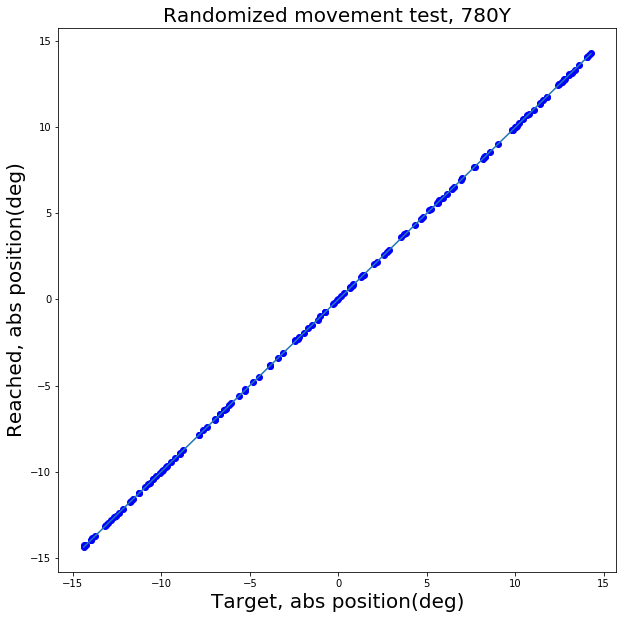

In [33]:
savefig=False
channel_labels=['780X','780Y','480X','480Y']
values=np.linspace(np.min(random_sequence),np.max(random_sequence),2)
fig=plt.figure(figsize=(10,10));
print positions

plt.plot(np.insert(random_sequence,0,positions[0]),positions, 'bo');
plt.plot(values,values)
plt.title('Randomized movement test, {}'.format(channel_labels[test_channel]),fontsize=20)
plt.xlabel('Target, abs position(deg)',fontsize=20)
plt.ylabel('Reached, abs position(deg)',fontsize=20)
if savefig:
    plt.savefig('Randomized_movement_test_780X.pdf')
    plt.savefig('Randomized_movement_test_780X.png')
plt.show()

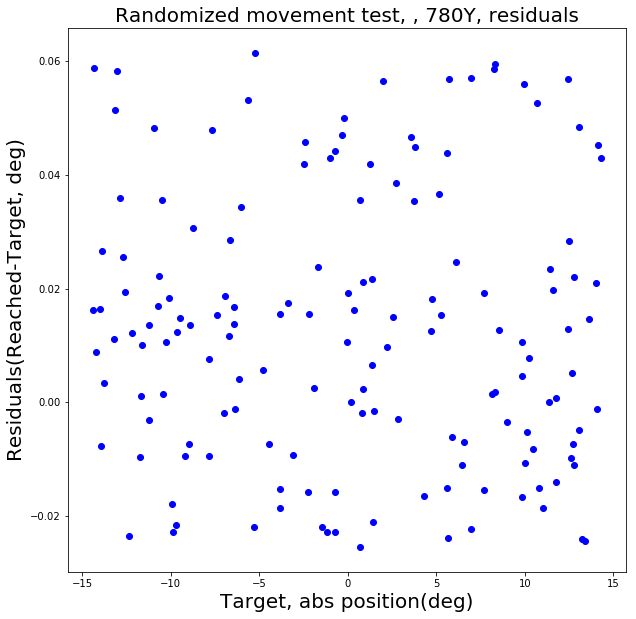

In [34]:
values=np.linspace(np.min(random_sequence),np.max(random_sequence),2)
fig=plt.figure(figsize=(10,10));
plt.plot(np.insert(random_sequence,0,positions[0]),positions-np.insert(random_sequence,0,positions[0]), 'bo');
plt.title('Randomized movement test, , {}, residuals'.format(channel_labels[test_channel]),fontsize=20)
plt.xlabel('Target, abs position(deg)',fontsize=20)
plt.ylabel('Residuals(Reached-Target, deg)',fontsize=20)
#plt.ylim(-1,1)
savefig=False
if savefig:
    plt.savefig('Randomized_movement_test_780X,residuals_20160622.pdf')
    #plt.savefig('Randomized_movement_test_780X,residuals.png')
plt.show()

In [4]:
# Testing Y axis
import numpy as np
test_channel=1
random_sequence=np.random.randint(0,500,40)
print random_sequence

[299 497 303 262 392 367  54 133 205 215 347 444 108 171 186 155 366  94
 307 233 121 414 206 252 393 428 475  89 317 185 263  80 349  27  57  26
 260 105 399 129]


In [5]:
positions=[]
mc.move_abs(test_channel,np.median(random_sequence)) #move it back to zero.
positions.append(mc.getPosition(test_channel))
for i in random_sequence:
    mc.move_abs(test_channel,i)
    new_position=mc.getPosition(test_channel)
    positions.append(new_position)
print positions

INFO - Channel: 1 position: 99.931640625
INFO - avg_steps: 2708.79882812
INFO - Channel: 1 position: 99.931640625
INFO - Response: ''

INFO - Sending next command(17): '2PR1896\r\n'


780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 146.469726562
INFO - Response: ''

INFO - Sending next command(18): '2PR1277\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 174.287109375
INFO - Response: ''

INFO - Sending next command(19): '2PR907\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 190.239257812
INFO - Response: ''

INFO - Sending next command(20): '2PR695\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 201.357421875
INFO - Response: ''

INFO - Sending next command(21): '2PR547\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 210.322265625
INFO - Response: ''

INFO - Sending next command(22): '2PR428\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 217.265625
INFO - Response: ''

INFO - Sending next command(23): '2PR336\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 223.330078125
INFO - Response: ''

INFO - Sending next command(24): '2PR255\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 228.120117188
INFO - Response: ''

INFO - Sending next command(25): '2PR191\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 231.811523438
INFO - Response: ''

INFO - Sending next command(26): '2PR142\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 234.66796875
INFO - Response: ''

INFO - Sending next command(27): '2PR104\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 236.733398438
INFO - Response: ''

INFO - Sending next command(28): '2PR77\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 238.359375
INFO - Response: ''

INFO - Sending next command(29): '2PR55\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 239.633789062
INFO - Response: ''

INFO - Sending next command(30): '2PR38\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 240.600585938
INFO - Response: ''

INFO - Sending next command(31): '2PR25\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 241.303710938
INFO - Response: ''

INFO - Sending next command(32): '2PR16\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 241.787109375
INFO - Response: ''

INFO - Sending next command(33): '2PR9\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 242.05078125
INFO - Response: ''

INFO - Sending next command(34): '2PR6\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 242.2265625
INFO - Response: ''

INFO - Sending next command(35): '2PR4\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 242.358398438
INFO - Response: ''

INFO - Sending next command(36): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 242.40234375
INFO - New motor position is 242.40234375 deg, error -0.09765625 deg.
INFO - Channel: 1 position: 242.40234375
INFO - Channel: 1 position: 242.40234375
INFO - avg_steps: 1075.35546875
INFO - Channel: 1 position: 242.40234375
INFO - Response: ''

INFO - Sending next command(37): '2PR753\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 256.948242188
INFO - Response: ''

INFO - Sending next command(38): '2PR559\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 266.791992188
INFO - Response: ''

INFO - Sending next command(39): '2PR428\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 273.69140625
INFO - Response: ''

INFO - Sending next command(40): '2PR337\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 279.096679688
INFO - Response: ''

INFO - Sending next command(41): '2PR265\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 283.227539062
INFO - Response: ''

INFO - Sending next command(42): '2PR210\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 286.391601562
INFO - Response: ''

INFO - Sending next command(43): '2PR168\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 288.80859375
INFO - Response: ''

INFO - Sending next command(44): '2PR136\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 290.786132812
INFO - Response: ''

INFO - Sending next command(45): '2PR109\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 292.456054688
INFO - Response: ''

INFO - Sending next command(46): '2PR87\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 293.90625
INFO - Response: ''

INFO - Sending next command(47): '2PR68\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 295.092773438
INFO - Response: ''

INFO - Sending next command(48): '2PR52\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 296.059570312
INFO - Response: ''

INFO - Sending next command(49): '2PR39\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 296.850585938
INFO - Response: ''

INFO - Sending next command(50): '2PR29\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 297.465820312
INFO - Response: ''

INFO - Sending next command(51): '2PR20\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 297.905273438
INFO - Response: ''

INFO - Sending next command(52): '2PR15\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 298.30078125
INFO - Response: ''

INFO - Sending next command(53): '2PR9\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 298.4765625
INFO - Response: ''

INFO - Sending next command(54): '2PR7\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 298.608398438
INFO - Response: ''

INFO - Sending next command(55): '2PR5\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 298.740234375
INFO - Response: ''

INFO - Sending next command(56): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 298.784179688
ERROR - Current position 298.784179688 deg. Setpoint not achieved by -0.2158203125 deg after max iterations.
INFO - Channel: 1 position: 298.784179688
INFO - Channel: 1 position: 298.784179688
INFO - avg_steps: 3766.10058594
INFO - Channel: 1 position: 298.784179688
INFO - Response: ''

INFO - Sending next command(57): '2PR2636\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 338.73046875
INFO - Response: ''

INFO - Sending next command(58): '2PR2105\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 386.71875
INFO - Response: ''

INFO - Sending next command(59): '2PR1467\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 430.83984375
INFO - Response: ''

INFO - Sending next command(60): '2PR880\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 456.372070312
INFO - Response: ''

INFO - Sending next command(61): '2PR540\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 471.708984375
INFO - Response: ''

INFO - Sending next command(62): '2PR336\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 481.245117188
INFO - Response: ''

INFO - Sending next command(63): '2PR210\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 487.485351562
INFO - Response: ''

INFO - Sending next command(64): '2PR127\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 491.352539062
INFO - Response: ''

INFO - Sending next command(65): '2PR75\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 493.637695312
INFO - Response: ''

INFO - Sending next command(66): '2PR45\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 495.087890625
INFO - Response: ''

INFO - Sending next command(67): '2PR25\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 495.966796875
INFO - Response: ''

INFO - Sending next command(68): '2PR14\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 496.494140625
INFO - Response: ''

INFO - Sending next command(69): '2PR7\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 496.7578125
INFO - Response: ''

INFO - Sending next command(70): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 496.845703125
INFO - Response: ''

INFO - Sending next command(71): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 496.93359375
INFO - Response: ''

INFO - Sending next command(72): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 496.977539062
INFO - New motor position is 496.977539062 deg, error -0.0224609375 deg.
INFO - Channel: 1 position: 496.977539062
INFO - Channel: 1 position: 496.977539062
INFO - avg_steps: -3685.57324219
INFO - Need to go negative. Current position 496.977539062 DEG. Setpoint 303 DEG. Steps to be taken: -4686
INFO - Response: ''

INFO - Sending next command(73): '2PR-4686\r\n'


780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 247.236328125
INFO - Response: ''

INFO - Sending next command(74): '2PR742\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 270.3515625
INFO - Response: ''

INFO - Sending next command(75): '2PR434\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 279.008789062
INFO - Response: ''

INFO - Sending next command(76): '2PR319\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 284.853515625
INFO - Response: ''

INFO - Sending next command(77): '2PR241\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 288.940429688
INFO - Response: ''

INFO - Sending next command(78): '2PR187\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 292.1484375
INFO - Response: ''

INFO - Sending next command(79): '2PR144\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 294.829101562
INFO - Response: ''

INFO - Sending next command(80): '2PR109\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 296.89453125
INFO - Response: ''

INFO - Sending next command(81): '2PR81\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 298.520507812
INFO - Response: ''

INFO - Sending next command(82): '2PR60\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 299.794921875
INFO - Response: ''

INFO - Sending next command(83): '2PR43\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 300.76171875
INFO - Response: ''

INFO - Sending next command(84): '2PR30\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 301.552734375
INFO - Response: ''

INFO - Sending next command(85): '2PR19\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 302.080078125
INFO - Response: ''

INFO - Sending next command(86): '2PR12\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 302.387695312
INFO - Response: ''

INFO - Sending next command(87): '2PR8\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 302.607421875
INFO - Response: ''

INFO - Sending next command(88): '2PR5\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 302.739257812
INFO - Response: ''

INFO - Sending next command(89): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 302.827148438
INFO - Response: ''

INFO - Sending next command(90): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 302.87109375
INFO - Response: ''

INFO - Sending next command(91): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 302.915039062
INFO - Response: ''

INFO - Sending next command(92): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 302.958984375
INFO - Response: ''

INFO - Sending next command(93): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 302.958984375
INFO - New motor position is 302.958984375 deg, error -0.041015625 deg.
INFO - Channel: 1 position: 302.958984375
INFO - Channel: 1 position: 302.958984375
INFO - avg_steps: -778.220703125
INFO - Need to go negative. Current position 302.958984375 DEG. Setpoint 262 DEG. Steps to be taken: -1778
INFO - Response: ''

INFO - Sending next command(94): '2PR-1778\r\n'


780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 209.00390625
INFO - Response: ''

INFO - Sending next command(95): '2PR705\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 234.272460938
INFO - Response: ''

INFO - Sending next command(96): '2PR369\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 243.588867188
INFO - Response: ''

INFO - Sending next command(97): '2PR245\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 249.565429688
INFO - Response: ''

INFO - Sending next command(98): '2PR165\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 253.4765625
INFO - Response: ''

INFO - Sending next command(99): '2PR113\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 256.11328125
INFO - Response: ''

INFO - Sending next command(100): '2PR78\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 258.002929688
INFO - Response: ''

INFO - Sending next command(101): '2PR53\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 259.365234375
INFO - Response: ''

INFO - Sending next command(102): '2PR35\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 260.33203125
INFO - Response: ''

INFO - Sending next command(103): '2PR22\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 261.03515625
INFO - Response: ''

INFO - Sending next command(104): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 261.430664062
INFO - Response: ''

INFO - Sending next command(105): '2PR8\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 261.650390625
INFO - Response: ''

INFO - Sending next command(106): '2PR5\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 261.782226562
INFO - Response: ''

INFO - Sending next command(107): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 261.870117188
INFO - Response: ''

INFO - Sending next command(108): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 261.958007812
INFO - Response: ''

INFO - Sending next command(109): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 261.958007812
INFO - Response: ''

INFO - Sending next command(110): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 262.001953125
INFO - New motor position is 262.001953125 deg, error 0.001953125 deg.
INFO - Channel: 1 position: 262.001953125
INFO - Channel: 1 position: 262.001953125
INFO - avg_steps: 2469.96289062
INFO - Channel: 1 position: 262.001953125
INFO - Response: ''

INFO - Sending next command(111): '2PR1729\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 293.291015625
INFO - Response: ''

INFO - Sending next command(112): '2PR1313\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 314.82421875
INFO - Response: ''

INFO - Sending next command(113): '2PR1026\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 332.094726562
INFO - Response: ''

INFO - Sending next command(114): '2PR797\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 348.706054688
INFO - Response: ''

INFO - Sending next command(115): '2PR576\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 362.329101562
INFO - Response: ''

INFO - Sending next command(116): '2PR395\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 372.392578125
INFO - Response: ''

INFO - Sending next command(117): '2PR261\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 379.643554688
INFO - Response: ''

INFO - Sending next command(118): '2PR164\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 384.916992188
INFO - Response: ''

INFO - Sending next command(119): '2PR94\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 388.037109375
INFO - Response: ''

INFO - Sending next command(120): '2PR53\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 389.838867188
INFO - Response: ''

INFO - Sending next command(121): '2PR29\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 390.893554688
INFO - Response: ''

INFO - Sending next command(122): '2PR15\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 391.508789062
INFO - Response: ''

INFO - Sending next command(123): '2PR7\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 391.772460938
INFO - Response: ''

INFO - Sending next command(124): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 391.860351562
INFO - Response: ''

INFO - Sending next command(125): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 391.948242188
INFO - Response: ''

INFO - Sending next command(126): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 391.9921875
INFO - New motor position is 391.9921875 deg, error -0.0078125 deg.
INFO - Channel: 1 position: 391.9921875
INFO - Channel: 1 position: 391.9921875
INFO - avg_steps: -474.8515625
INFO - Need to go negative. Current position 391.9921875 DEG. Setpoint 367 DEG. Steps to be taken: -1475
INFO - Response: ''

INFO - Sending next command(127): '2PR-1475\r\n'


780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 315.0
INFO - Response: ''

INFO - Sending next command(128): '2PR692\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 338.02734375
INFO - Response: ''

INFO - Sending next command(129): '2PR385\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 347.16796875
INFO - Response: ''

INFO - Sending next command(130): '2PR264\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 353.364257812
INFO - Response: ''

INFO - Sending next command(131): '2PR181\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 357.934570312
INFO - Response: ''

INFO - Sending next command(132): '2PR121\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 361.098632812
INFO - Response: ''

INFO - Sending next command(133): '2PR78\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 363.208007812
INFO - Response: ''

INFO - Sending next command(134): '2PR50\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 364.614257812
INFO - Response: ''

INFO - Sending next command(135): '2PR32\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 365.581054688
INFO - Response: ''

INFO - Sending next command(136): '2PR19\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 366.240234375
INFO - Response: ''

INFO - Sending next command(137): '2PR10\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 366.547851562
INFO - Response: ''

INFO - Sending next command(138): '2PR6\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 366.767578125
INFO - Response: ''

INFO - Sending next command(139): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 366.85546875
INFO - Response: ''

INFO - Sending next command(140): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 366.899414062
INFO - Response: ''

INFO - Sending next command(141): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 366.943359375
INFO - Response: ''

INFO - Sending next command(142): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 366.943359375
INFO - Response: ''

INFO - Sending next command(143): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 366.987304688
INFO - New motor position is 366.987304688 deg, error -0.0126953125 deg.
INFO - Channel: 1 position: 366.987304688
INFO - Channel: 1 position: 366.987304688
INFO - avg_steps: -5946.75878906
INFO - Need to go negative. Current position 366.987304688 DEG. Setpoint 54 DEG. Steps to be taken: -6947
INFO - Response: ''

INFO - Sending next command(144): '2PR-6947\r\n'


780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 8.876953125
INFO - Response: ''

INFO - Sending next command(145): '2PR600\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 33.1787109375
INFO - Response: ''

INFO - Sending next command(146): '2PR277\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 40.95703125
INFO - Response: ''

INFO - Sending next command(147): '2PR173\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 45.2197265625
INFO - Response: ''

INFO - Sending next command(148): '2PR117\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 47.98828125
INFO - Response: ''

INFO - Sending next command(149): '2PR80\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 49.8779296875
INFO - Response: ''

INFO - Sending next command(150): '2PR55\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 51.1962890625
INFO - Response: ''

INFO - Sending next command(151): '2PR37\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 52.1630859375
INFO - Response: ''

INFO - Sending next command(152): '2PR24\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 52.7783203125
INFO - Response: ''

INFO - Sending next command(153): '2PR16\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 53.2177734375
INFO - Response: ''

INFO - Sending next command(154): '2PR10\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 53.4814453125
INFO - Response: ''

INFO - Sending next command(155): '2PR7\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 53.6572265625
INFO - Response: ''

INFO - Sending next command(156): '2PR5\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 53.7451171875
INFO - Response: ''

INFO - Sending next command(157): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 53.8330078125
INFO - Response: ''

INFO - Sending next command(158): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 53.876953125
INFO - Response: ''

INFO - Sending next command(159): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 53.9208984375
INFO - Response: ''

INFO - Sending next command(160): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 53.9208984375
INFO - Response: ''

INFO - Sending next command(161): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 53.96484375
INFO - Response: ''

INFO - Sending next command(162): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 53.96484375
INFO - Response: ''

INFO - Sending next command(163): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 54.0087890625
INFO - New motor position is 54.0087890625 deg, error 0.0087890625 deg.
INFO - Channel: 1 position: 54.0087890625
INFO - Channel: 1 position: 54.0087890625
INFO - avg_steps: 1500.83300781
INFO - Channel: 1 position: 54.0087890625
INFO - Response: ''

INFO - Sending next command(164): '2PR1051\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 70.4443359375
INFO - Response: ''

INFO - Sending next command(165): '2PR832\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 81.4306640625
INFO - Response: ''

INFO - Sending next command(166): '2PR686\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 89.6484375
INFO - Response: ''

INFO - Sending next command(167): '2PR577\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 96.15234375
INFO - Response: ''

INFO - Sending next command(168): '2PR490\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 101.821289062
INFO - Response: ''

INFO - Sending next command(169): '2PR415\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 106.831054688
INFO - Response: ''

INFO - Sending next command(170): '2PR348\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 111.4453125
INFO - Response: ''

INFO - Sending next command(171): '2PR287\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 115.048828125
INFO - Response: ''

INFO - Sending next command(172): '2PR239\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 117.553710938
INFO - Response: ''

INFO - Sending next command(173): '2PR205\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 119.575195312
INFO - Response: ''

INFO - Sending next command(174): '2PR179\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 121.333007812
INFO - Response: ''

INFO - Sending next command(175): '2PR155\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 122.958984375
INFO - Response: ''

INFO - Sending next command(176): '2PR134\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 124.584960938
INFO - Response: ''

INFO - Sending next command(177): '2PR112\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 126.03515625
INFO - Response: ''

INFO - Sending next command(178): '2PR93\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 127.265625
INFO - Response: ''

INFO - Sending next command(179): '2PR76\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 128.3203125
INFO - Response: ''

INFO - Sending next command(180): '2PR62\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 129.19921875
INFO - Response: ''

INFO - Sending next command(181): '2PR51\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 129.946289062
INFO - Response: ''

INFO - Sending next command(182): '2PR41\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 130.561523438
INFO - Response: ''

INFO - Sending next command(183): '2PR32\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 131.1328125
ERROR - Current position 131.1328125 deg. Setpoint not achieved by -1.8671875 deg after max iterations.
INFO - Channel: 1 position: 131.1328125
INFO - Channel: 1 position: 131.1328125
INFO - avg_steps: 1403.4765625
INFO - Channel: 1 position: 131.1328125
INFO - Response: ''

INFO - Sending next command(184): '2PR982\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 143.305664062
INFO - Response: ''

INFO - Sending next command(185): '2PR821\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 156.665039062
INFO - Response: ''

INFO - Sending next command(186): '2PR643\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 168.442382812
INFO - Response: ''

INFO - Sending next command(187): '2PR486\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 177.275390625
INFO - Response: ''

INFO - Sending next command(188): '2PR369\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 183.515625
INFO - Response: ''

INFO - Sending next command(189): '2PR286\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 188.4375
INFO - Response: ''

INFO - Sending next command(190): '2PR220\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 192.3046875
INFO - Response: ''

INFO - Sending next command(191): '2PR169\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 195.336914062
INFO - Response: ''

INFO - Sending next command(192): '2PR129\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 197.885742188
INFO - Response: ''

INFO - Sending next command(193): '2PR95\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 199.86328125
INFO - Response: ''

INFO - Sending next command(194): '2PR68\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 201.401367188
INFO - Response: ''

INFO - Sending next command(195): '2PR48\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 202.543945312
INFO - Response: ''

INFO - Sending next command(196): '2PR33\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 203.466796875
INFO - Response: ''

INFO - Sending next command(197): '2PR20\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 204.038085938
INFO - Response: ''

INFO - Sending next command(198): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 204.43359375
INFO - Response: ''

INFO - Sending next command(199): '2PR8\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 204.653320312
INFO - Response: ''

INFO - Sending next command(200): '2PR5\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 204.78515625
INFO - Response: ''

INFO - Sending next command(201): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 204.873046875
INFO - Response: ''

INFO - Sending next command(202): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 204.916992188
INFO - Response: ''

INFO - Sending next command(203): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 204.9609375
INFO - New motor position is 204.9609375 deg, error -0.0390625 deg.
INFO - Channel: 1 position: 204.9609375
INFO - Channel: 1 position: 204.9609375
INFO - avg_steps: 190.7421875
INFO - Channel: 1 position: 204.9609375
INFO - Response: ''

INFO - Sending next command(204): '2PR134\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 207.7734375
INFO - Response: ''

INFO - Sending next command(205): '2PR96\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 209.8828125
INFO - Response: ''

INFO - Sending next command(206): '2PR68\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 211.420898438
INFO - Response: ''

INFO - Sending next command(207): '2PR48\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 212.563476562
INFO - Response: ''

INFO - Sending next command(208): '2PR32\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 213.3984375
INFO - Response: ''

INFO - Sending next command(209): '2PR21\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 213.969726562
INFO - Response: ''

INFO - Sending next command(210): '2PR14\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 214.409179688
INFO - Response: ''

INFO - Sending next command(211): '2PR8\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 214.62890625
INFO - Response: ''

INFO - Sending next command(212): '2PR5\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 214.716796875
INFO - Response: ''

INFO - Sending next command(213): '2PR4\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 214.848632812
INFO - Response: ''

INFO - Sending next command(214): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 214.892578125
INFO - Response: ''

INFO - Sending next command(215): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 214.936523438
INFO - Response: ''

INFO - Sending next command(216): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 214.936523438
INFO - Response: ''

INFO - Sending next command(217): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 214.98046875
INFO - New motor position is 214.98046875 deg, error -0.01953125 deg.
INFO - Channel: 1 position: 214.98046875
INFO - Channel: 1 position: 214.98046875
INFO - avg_steps: 2508.37109375
INFO - Channel: 1 position: 214.98046875
INFO - Response: ''

INFO - Sending next command(218): '2PR1756\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 248.115234375
INFO - Response: ''

INFO - Sending next command(219): '2PR1315\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 271.845703125
INFO - Response: ''

INFO - Sending next command(220): '2PR1000\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 288.28125
INFO - Response: ''

INFO - Sending next command(221): '2PR781\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 299.619140625
INFO - Response: ''

INFO - Sending next command(222): '2PR630\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 309.506835938
INFO - Response: ''

INFO - Sending next command(223): '2PR499\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 317.28515625
INFO - Response: ''

INFO - Sending next command(224): '2PR395\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 323.349609375
INFO - Response: ''

INFO - Sending next command(225): '2PR315\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 328.18359375
INFO - Response: ''

INFO - Sending next command(226): '2PR250\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 332.75390625
INFO - Response: ''

INFO - Sending next command(227): '2PR189\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 336.4453125
INFO - Response: ''

INFO - Sending next command(228): '2PR140\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 339.169921875
INFO - Response: ''

INFO - Sending next command(229): '2PR104\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 341.3671875
INFO - Response: ''

INFO - Sending next command(230): '2PR75\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 342.94921875
INFO - Response: ''

INFO - Sending next command(231): '2PR54\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 344.1796875
INFO - Response: ''

INFO - Sending next command(232): '2PR38\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 345.102539062
INFO - Response: ''

INFO - Sending next command(233): '2PR25\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 345.76171875
INFO - Response: ''

INFO - Sending next command(234): '2PR16\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 346.245117188
INFO - Response: ''

INFO - Sending next command(235): '2PR10\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 346.46484375
INFO - Response: ''

INFO - Sending next command(236): '2PR7\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 346.684570312
INFO - Response: ''

INFO - Sending next command(237): '2PR4\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 346.772460938
ERROR - Current position 346.772460938 deg. Setpoint not achieved by -0.2275390625 deg after max iterations.
INFO - Channel: 1 position: 346.772460938
INFO - Channel: 1 position: 346.772460938
INFO - avg_steps: 1847.32324219
INFO - Channel: 1 position: 346.772460938
INFO - Response: ''

INFO - Sending next command(238): '2PR1293\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 375.46875
INFO - Response: ''

INFO - Sending next command(239): '2PR911\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 401.440429688
INFO - Response: ''

INFO - Sending next command(240): '2PR566\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 417.919921875
INFO - Response: ''

INFO - Sending next command(241): '2PR347\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 428.37890625
INFO - Response: ''

INFO - Sending next command(242): '2PR208\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 434.443359375
INFO - Response: ''

INFO - Sending next command(243): '2PR127\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 438.134765625
INFO - Response: ''

INFO - Sending next command(244): '2PR78\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 440.463867188
INFO - Response: ''

INFO - Sending next command(245): '2PR47\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 441.958007812
INFO - Response: ''

INFO - Sending next command(246): '2PR27\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 442.924804688
INFO - Response: ''

INFO - Sending next command(247): '2PR14\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 443.408203125
INFO - Response: ''

INFO - Sending next command(248): '2PR8\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 443.715820312
INFO - Response: ''

INFO - Sending next command(249): '2PR4\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 443.84765625
INFO - Response: ''

INFO - Sending next command(250): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 443.935546875
INFO - Response: ''

INFO - Sending next command(251): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 443.979492188
INFO - New motor position is 443.979492188 deg, error -0.0205078125 deg.
INFO - Channel: 1 position: 443.979492188
INFO - Channel: 1 position: 443.979492188
INFO - avg_steps: -6383.61035156
INFO - Need to go negative. Current position 443.979492188 DEG. Setpoint 108 DEG. Steps to be taken: -7384
INFO - Response: ''

INFO - Sending next command(252): '2PR-7384\r\n'


780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 59.501953125
INFO - Response: ''

INFO - Sending next command(253): '2PR645\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 84.2431640625
INFO - Response: ''

INFO - Sending next command(254): '2PR316\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 92.021484375
INFO - Response: ''

INFO - Sending next command(255): '2PR213\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 96.416015625
INFO - Response: ''

INFO - Sending next command(256): '2PR154\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 99.3603515625
INFO - Response: ''

INFO - Sending next command(257): '2PR115\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 101.557617188
INFO - Response: ''

INFO - Sending next command(258): '2PR86\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 103.18359375
INFO - Response: ''

INFO - Sending next command(259): '2PR64\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 104.458007812
INFO - Response: ''

INFO - Sending next command(260): '2PR47\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 105.380859375
INFO - Response: ''

INFO - Sending next command(261): '2PR35\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 106.083984375
INFO - Response: ''

INFO - Sending next command(262): '2PR25\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 106.611328125
INFO - Response: ''

INFO - Sending next command(263): '2PR18\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 106.962890625
INFO - Response: ''

INFO - Sending next command(264): '2PR14\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 107.270507812
INFO - Response: ''

INFO - Sending next command(265): '2PR10\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 107.490234375
INFO - Response: ''

INFO - Sending next command(266): '2PR7\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 107.622070312
INFO - Response: ''

INFO - Sending next command(267): '2PR5\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 107.709960938
INFO - Response: ''

INFO - Sending next command(268): '2PR4\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 107.797851562
INFO - Response: ''

INFO - Sending next command(269): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 107.841796875
INFO - Response: ''

INFO - Sending next command(270): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 107.885742188
INFO - Response: ''

INFO - Sending next command(271): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 107.9296875
INFO - Response: ''

INFO - Sending next command(272): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 107.9296875
INFO - New motor position is 107.9296875 deg, error -0.0703125 deg.
INFO - Channel: 1 position: 107.9296875
INFO - Channel: 1 position: 107.9296875
INFO - avg_steps: 1198.3359375
INFO - Channel: 1 position: 107.9296875
INFO - Response: ''

INFO - Sending next command(273): '2PR839\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 119.223632812
INFO - Response: ''

INFO - Sending next command(274): '2PR689\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 127.836914062
INFO - Response: ''

INFO - Sending next command(275): '2PR574\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 135.483398438
INFO - Response: ''

INFO - Sending next command(276): '2PR472\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 142.646484375
INFO - Response: ''

INFO - Sending next command(277): '2PR377\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 148.754882812
INFO - Response: ''

INFO - Sending next command(278): '2PR296\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 154.204101562
INFO - Response: ''

INFO - Sending next command(279): '2PR223\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 158.247070312
INFO - Response: ''

INFO - Sending next command(280): '2PR170\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 161.586914062
INFO - Response: ''

INFO - Sending next command(281): '2PR125\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 164.1796875
INFO - Response: ''

INFO - Sending next command(282): '2PR91\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 166.157226562
INFO - Response: ''

INFO - Sending next command(283): '2PR64\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 167.607421875
INFO - Response: ''

INFO - Sending next command(284): '2PR45\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 168.75
INFO - Response: ''

INFO - Sending next command(285): '2PR30\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 169.62890625
INFO - Response: ''

INFO - Sending next command(286): '2PR18\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 170.15625
INFO - Response: ''

INFO - Sending next command(287): '2PR11\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 170.463867188
INFO - Response: ''

INFO - Sending next command(288): '2PR7\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 170.68359375
INFO - Response: ''

INFO - Sending next command(289): '2PR4\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 170.771484375
INFO - Response: ''

INFO - Sending next command(290): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 170.859375
INFO - Response: ''

INFO - Sending next command(291): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 170.947265625
INFO - Response: ''

INFO - Sending next command(292): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 170.947265625
INFO - New motor position is 170.947265625 deg, error -0.052734375 deg.
INFO - Channel: 1 position: 170.947265625
INFO - Channel: 1 position: 170.947265625
INFO - avg_steps: 286.001953125
INFO - Channel: 1 position: 170.947265625
INFO - Response: ''

INFO - Sending next command(293): '2PR200\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 175.034179688
INFO - Response: ''

INFO - Sending next command(294): '2PR146\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 177.934570312
INFO - Response: ''

INFO - Sending next command(295): '2PR107\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 180.131835938
INFO - Response: ''

INFO - Sending next command(296): '2PR78\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 181.845703125
INFO - Response: ''

INFO - Sending next command(297): '2PR55\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 183.208007812
INFO - Response: ''

INFO - Sending next command(298): '2PR37\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 184.21875
INFO - Response: ''

INFO - Sending next command(299): '2PR24\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 184.965820312
INFO - Response: ''

INFO - Sending next command(300): '2PR14\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 185.405273438
INFO - Response: ''

INFO - Sending next command(301): '2PR8\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 185.625
INFO - Response: ''

INFO - Sending next command(302): '2PR5\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 185.80078125
INFO - Response: ''

INFO - Sending next command(303): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 185.888671875
INFO - Response: ''

INFO - Sending next command(304): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 185.888671875
INFO - Response: ''

INFO - Sending next command(305): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 185.932617188
INFO - Response: ''

INFO - Sending next command(306): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 185.9765625
INFO - New motor position is 185.9765625 deg, error -0.0234375 deg.
INFO - Channel: 1 position: 185.9765625
INFO - Channel: 1 position: 185.9765625
INFO - avg_steps: -588.5546875
INFO - Need to go negative. Current position 185.9765625 DEG. Setpoint 155 DEG. Steps to be taken: -1589
INFO - Response: ''

INFO - Sending next command(307): '2PR-1589\r\n'


780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 105.46875
INFO - Response: ''

INFO - Sending next command(308): '2PR659\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 129.90234375
INFO - Response: ''

INFO - Sending next command(309): '2PR334\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 137.4609375
INFO - Response: ''

INFO - Sending next command(310): '2PR233\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 141.943359375
INFO - Response: ''

INFO - Sending next command(311): '2PR174\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 145.063476562
INFO - Response: ''

INFO - Sending next command(312): '2PR132\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 147.348632812
INFO - Response: ''

INFO - Sending next command(313): '2PR102\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 149.194335938
INFO - Response: ''

INFO - Sending next command(314): '2PR77\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 150.732421875
INFO - Response: ''

INFO - Sending next command(315): '2PR57\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 151.962890625
INFO - Response: ''

INFO - Sending next command(316): '2PR40\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 152.9296875
INFO - Response: ''

INFO - Sending next command(317): '2PR28\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 153.6328125
INFO - Response: ''

INFO - Sending next command(318): '2PR18\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 154.116210938
INFO - Response: ''

INFO - Sending next command(319): '2PR12\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 154.467773438
INFO - Response: ''

INFO - Sending next command(320): '2PR7\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 154.643554688
INFO - Response: ''

INFO - Sending next command(321): '2PR5\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 154.775390625
INFO - Response: ''

INFO - Sending next command(322): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 154.86328125
INFO - Response: ''

INFO - Sending next command(323): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 154.907226562
INFO - Response: ''

INFO - Sending next command(324): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 154.907226562
INFO - Response: ''

INFO - Sending next command(325): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 154.951171875
INFO - Response: ''

INFO - Sending next command(326): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 154.951171875
INFO - Response: ''

INFO - Sending next command(327): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 154.995117188
INFO - New motor position is 154.995117188 deg, error -0.0048828125 deg.
INFO - Channel: 1 position: 154.995117188
INFO - Channel: 1 position: 154.995117188
INFO - avg_steps: 4009.09277344
INFO - Channel: 1 position: 154.995117188
INFO - Response: ''

INFO - Sending next command(328): '2PR2806\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 203.90625
INFO - Response: ''

INFO - Sending next command(329): '2PR2156\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 243.45703125
INFO - Response: ''

INFO - Sending next command(330): '2PR1630\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 273.779296875
INFO - Response: ''

INFO - Sending next command(331): '2PR1227\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 292.587890625
INFO - Response: ''

INFO - Sending next command(332): '2PR976\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 306.73828125
INFO - Response: ''

INFO - Sending next command(333): '2PR788\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 318.208007812
INFO - Response: ''

INFO - Sending next command(334): '2PR636\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 326.909179688
INFO - Response: ''

INFO - Sending next command(335): '2PR520\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 335.654296875
INFO - Response: ''

INFO - Sending next command(336): '2PR404\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 343.081054688
INFO - Response: ''

INFO - Sending next command(337): '2PR305\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 348.837890625
INFO - Response: ''

INFO - Sending next command(338): '2PR228\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 353.452148438
INFO - Response: ''

INFO - Sending next command(339): '2PR167\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 356.967773438
INFO - Response: ''

INFO - Sending next command(340): '2PR120\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 359.560546875
INFO - Response: ''

INFO - Sending next command(341): '2PR86\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 361.538085938
INFO - Response: ''

INFO - Sending next command(342): '2PR59\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 362.944335938
INFO - Response: ''

INFO - Sending next command(343): '2PR41\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 363.999023438
INFO - Response: ''

INFO - Sending next command(344): '2PR27\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 364.790039062
INFO - Response: ''

INFO - Sending next command(345): '2PR16\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 365.2734375
INFO - Response: ''

INFO - Sending next command(346): '2PR10\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 365.537109375
INFO - Response: ''

INFO - Sending next command(347): '2PR6\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 365.712890625
ERROR - Current position 365.712890625 deg. Setpoint not achieved by -0.287109375 deg after max iterations.
INFO - Channel: 1 position: 365.712890625
INFO - Channel: 1 position: 365.712890625
INFO - avg_steps: -5162.54492188
INFO - Need to go negative. Current position 365.712890625 DEG. Setpoint 94 DEG. Steps to be taken: -6163
INFO - Response: ''

INFO - Sending next command(348): '2PR-6163\r\n'


780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 52.3388671875
INFO - Response: ''

INFO - Sending next command(349): '2PR554\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 74.7509765625
INFO - Response: ''

INFO - Sending next command(350): '2PR256\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 81.826171875
INFO - Response: ''

INFO - Sending next command(351): '2PR162\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 85.5615234375
INFO - Response: ''

INFO - Sending next command(352): '2PR112\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 87.978515625
INFO - Response: ''

INFO - Sending next command(353): '2PR80\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 89.6484375
INFO - Response: ''

INFO - Sending next command(354): '2PR58\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 90.8349609375
INFO - Response: ''

INFO - Sending next command(355): '2PR42\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 91.7138671875
INFO - Response: ''

INFO - Sending next command(356): '2PR30\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 92.373046875
INFO - Response: ''

INFO - Sending next command(357): '2PR22\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 92.8125
INFO - Response: ''

INFO - Sending next command(358): '2PR16\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 93.1640625
INFO - Response: ''

INFO - Sending next command(359): '2PR11\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 93.33984375
INFO - Response: ''

INFO - Sending next command(360): '2PR9\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 93.515625
INFO - Response: ''

INFO - Sending next command(361): '2PR6\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 93.6474609375
INFO - Response: ''

INFO - Sending next command(362): '2PR5\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 93.7353515625
INFO - Response: ''

INFO - Sending next command(363): '2PR4\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 93.8232421875
INFO - Response: ''

INFO - Sending next command(364): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 93.8232421875
INFO - Response: ''

INFO - Sending next command(365): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 93.8671875
INFO - Response: ''

INFO - Sending next command(366): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 93.9111328125
INFO - Response: ''

INFO - Sending next command(367): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 93.9111328125
INFO - Response: ''

INFO - Sending next command(368): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 93.955078125
INFO - New motor position is 93.955078125 deg, error -0.044921875 deg.
INFO - Channel: 1 position: 93.955078125
INFO - Channel: 1 position: 93.955078125
INFO - avg_steps: 4047.85351562
INFO - Channel: 1 position: 93.955078125
INFO - Response: ''

INFO - Sending next command(369): '2PR2833\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 124.453125
INFO - Response: ''

INFO - Sending next command(370): '2PR2428\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 155.786132812
INFO - Response: ''

INFO - Sending next command(371): '2PR2011\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 190.634765625
INFO - Response: ''

INFO - Sending next command(372): '2PR1548\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 217.397460938
INFO - Response: ''

INFO - Sending next command(373): '2PR1192\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 240.556640625
INFO - Response: ''

INFO - Sending next command(374): '2PR884\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 257.651367188
INFO - Response: ''

INFO - Sending next command(375): '2PR656\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 269.692382812
INFO - Response: ''

INFO - Sending next command(376): '2PR496\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 278.349609375
INFO - Response: ''

INFO - Sending next command(377): '2PR381\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 284.721679688
INFO - Response: ''

INFO - Sending next command(378): '2PR296\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 289.51171875
INFO - Response: ''

INFO - Sending next command(379): '2PR233\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 293.334960938
INFO - Response: ''

INFO - Sending next command(380): '2PR182\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 296.3671875
INFO - Response: ''

INFO - Sending next command(381): '2PR141\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 298.740234375
INFO - Response: ''

INFO - Sending next command(382): '2PR110\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 300.673828125
INFO - Response: ''

INFO - Sending next command(383): '2PR84\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 302.211914062
INFO - Response: ''

INFO - Sending next command(384): '2PR64\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 303.486328125
INFO - Response: ''

INFO - Sending next command(385): '2PR47\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 304.497070312
INFO - Response: ''

INFO - Sending next command(386): '2PR33\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 305.288085938
INFO - Response: ''

INFO - Sending next command(387): '2PR23\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 305.859375
INFO - Response: ''

INFO - Sending next command(388): '2PR15\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 306.254882812
ERROR - Current position 306.254882812 deg. Setpoint not achieved by -0.7451171875 deg after max iterations.
INFO - Channel: 1 position: 306.254882812
INFO - Channel: 1 position: 306.254882812
INFO - avg_steps: -1391.84277344
INFO - Need to go negative. Current position 306.254882812 DEG. Setpoint 233 DEG. Steps to be taken: -2392
INFO - Response: ''

INFO - Sending next command(389): '2PR-2392\r\n'


780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 179.077148438
INFO - Response: ''

INFO - Sending next command(390): '2PR717\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 206.3671875
INFO - Response: ''

INFO - Sending next command(391): '2PR354\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 215.419921875
INFO - Response: ''

INFO - Sending next command(392): '2PR234\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 220.913085938
INFO - Response: ''

INFO - Sending next command(393): '2PR161\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 224.47265625
INFO - Response: ''

INFO - Sending next command(394): '2PR113\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 227.065429688
INFO - Response: ''

INFO - Sending next command(395): '2PR79\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 228.955078125
INFO - Response: ''

INFO - Sending next command(396): '2PR54\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 230.2734375
INFO - Response: ''

INFO - Sending next command(397): '2PR36\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 231.284179688
INFO - Response: ''

INFO - Sending next command(398): '2PR23\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 231.943359375
INFO - Response: ''

INFO - Sending next command(399): '2PR14\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 232.3828125
INFO - Response: ''

INFO - Sending next command(400): '2PR8\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 232.602539062
INFO - Response: ''

INFO - Sending next command(401): '2PR5\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 232.734375
INFO - Response: ''

INFO - Sending next command(402): '2PR4\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 232.866210938
INFO - Response: ''

INFO - Sending next command(403): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 232.91015625
INFO - Response: ''

INFO - Sending next command(404): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 232.954101562
INFO - Response: ''

INFO - Sending next command(405): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 232.954101562
INFO - Response: ''

INFO - Sending next command(406): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 232.998046875
INFO - New motor position is 232.998046875 deg, error -0.001953125 deg.
INFO - Channel: 1 position: 232.998046875
INFO - Channel: 1 position: 232.998046875
INFO - avg_steps: -2127.96289062
INFO - Need to go negative. Current position 232.998046875 DEG. Setpoint 121 DEG. Steps to be taken: -3128
INFO - Response: ''

INFO - Sending next command(407): '2PR-3128\r\n'


780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 71.5869140625
INFO - Response: ''

INFO - Sending next command(408): '2PR657\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 97.2509765625
INFO - Response: ''

INFO - Sending next command(409): '2PR316\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 104.985351562
INFO - Response: ''

INFO - Sending next command(410): '2PR213\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 109.248046875
INFO - Response: ''

INFO - Sending next command(411): '2PR156\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 112.104492188
INFO - Response: ''

INFO - Sending next command(412): '2PR118\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 114.038085938
INFO - Response: ''

INFO - Sending next command(413): '2PR93\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 115.400390625
INFO - Response: ''

INFO - Sending next command(414): '2PR74\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 116.455078125
INFO - Response: ''

INFO - Sending next command(415): '2PR60\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 117.333984375
INFO - Response: ''

INFO - Sending next command(416): '2PR49\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 117.993164062
INFO - Response: ''

INFO - Sending next command(417): '2PR40\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 118.65234375
INFO - Response: ''

INFO - Sending next command(418): '2PR31\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 119.1796875
INFO - Response: ''

INFO - Sending next command(419): '2PR24\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 119.575195312
INFO - Response: ''

INFO - Sending next command(420): '2PR19\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 119.8828125
INFO - Response: ''

INFO - Sending next command(421): '2PR15\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 120.102539062
INFO - Response: ''

INFO - Sending next command(422): '2PR12\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 120.322265625
INFO - Response: ''

INFO - Sending next command(423): '2PR9\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 120.454101562
INFO - Response: ''

INFO - Sending next command(424): '2PR7\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 120.541992188
INFO - Response: ''

INFO - Sending next command(425): '2PR6\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 120.629882812
INFO - Response: ''

INFO - Sending next command(426): '2PR5\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 120.717773438
INFO - Response: ''

INFO - Sending next command(427): '2PR4\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 120.76171875
ERROR - Current position 120.76171875 deg. Setpoint not achieved by -0.23828125 deg after max iterations.
INFO - Channel: 1 position: 120.76171875
INFO - Channel: 1 position: 120.76171875
INFO - avg_steps: 5571.52734375
INFO - Channel: 1 position: 120.76171875
INFO - Response: ''

INFO - Sending next command(428): '2PR3900\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 176.000976562
INFO - Response: ''

INFO - Sending next command(429): '2PR3165\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 224.340820312
INFO - Response: ''

INFO - Sending next command(430): '2PR2522\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 265.913085938
INFO - Response: ''

INFO - Sending next command(431): '2PR1970\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 293.203125
INFO - Response: ''

INFO - Sending next command(432): '2PR1607\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 314.384765625
INFO - Response: ''

INFO - Sending next command(433): '2PR1325\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 329.985351562
INFO - Response: ''

INFO - Sending next command(434): '2PR1117\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 347.255859375
INFO - Response: ''

INFO - Sending next command(435): '2PR888\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 362.329101562
INFO - Response: ''

INFO - Sending next command(436): '2PR687\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 375.249023438
INFO - Response: ''

INFO - Sending next command(437): '2PR515\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 387.817382812
INFO - Response: ''

INFO - Sending next command(438): '2PR348\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 396.518554688
INFO - Response: ''

INFO - Sending next command(439): '2PR233\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 402.407226562
INFO - Response: ''

INFO - Sending next command(440): '2PR154\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 406.40625
INFO - Response: ''

INFO - Sending next command(441): '2PR101\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 409.130859375
INFO - Response: ''

INFO - Sending next command(442): '2PR65\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 410.9765625
INFO - Response: ''

INFO - Sending next command(443): '2PR40\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 412.163085938
INFO - Response: ''

INFO - Sending next command(444): '2PR24\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 412.998046875
INFO - Response: ''

INFO - Sending next command(445): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 413.4375
INFO - Response: ''

INFO - Sending next command(446): '2PR7\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 413.657226562
INFO - Response: ''

INFO - Sending next command(447): '2PR5\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 413.833007812
ERROR - Current position 413.833007812 deg. Setpoint not achieved by -0.1669921875 deg after max iterations.
INFO - Channel: 1 position: 413.833007812
INFO - Channel: 1 position: 413.833007812
INFO - avg_steps: -3948.82714844
INFO - Need to go negative. Current position 413.833007812 DEG. Setpoint 206 DEG. Steps to be taken: -4949
INFO - Response: ''

INFO - Sending next command(448): '2PR-4949\r\n'


780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 151.567382812
INFO - Response: ''

INFO - Sending next command(449): '2PR724\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 180.131835938
INFO - Response: ''

INFO - Sending next command(450): '2PR344\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 189.008789062
INFO - Response: ''

INFO - Sending next command(451): '2PR226\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 193.798828125
INFO - Response: ''

INFO - Sending next command(452): '2PR162\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 197.094726562
INFO - Response: ''

INFO - Sending next command(453): '2PR118\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 199.643554688
INFO - Response: ''

INFO - Sending next command(454): '2PR85\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 201.489257812
INFO - Response: ''

INFO - Sending next command(455): '2PR60\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 202.8515625
INFO - Response: ''

INFO - Sending next command(456): '2PR42\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 203.862304688
INFO - Response: ''

INFO - Sending next command(457): '2PR28\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 204.609375
INFO - Response: ''

INFO - Sending next command(458): '2PR18\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 205.13671875
INFO - Response: ''

INFO - Sending next command(459): '2PR11\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 205.48828125
INFO - Response: ''

INFO - Sending next command(460): '2PR7\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 205.6640625
INFO - Response: ''

INFO - Sending next command(461): '2PR4\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 205.795898438
INFO - Response: ''

INFO - Sending next command(462): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 205.883789062
INFO - Response: ''

INFO - Sending next command(463): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 205.927734375
INFO - Response: ''

INFO - Sending next command(464): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 205.971679688
INFO - Response: ''

INFO - Sending next command(465): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 205.971679688
INFO - Response: ''

INFO - Sending next command(466): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 206.015625
INFO - New motor position is 206.015625 deg, error 0.015625 deg.
INFO - Channel: 1 position: 206.015625
INFO - Channel: 1 position: 206.015625
INFO - avg_steps: 873.703125
INFO - Channel: 1 position: 206.015625
INFO - Response: ''

INFO - Sending next command(467): '2PR612\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 218.540039062
INFO - Response: ''

INFO - Sending next command(468): '2PR445\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 228.120117188
INFO - Response: ''

INFO - Sending next command(469): '2PR318\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 234.975585938
INFO - Response: ''

INFO - Sending next command(470): '2PR226\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 239.721679688
INFO - Response: ''

INFO - Sending next command(471): '2PR163\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 243.413085938
INFO - Response: ''

INFO - Sending next command(472): '2PR114\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 246.005859375
INFO - Response: ''

INFO - Sending next command(473): '2PR80\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 247.895507812
INFO - Response: ''

INFO - Sending next command(474): '2PR55\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 249.301757812
INFO - Response: ''

INFO - Sending next command(475): '2PR36\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 250.268554688
INFO - Response: ''

INFO - Sending next command(476): '2PR23\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 250.927734375
INFO - Response: ''

INFO - Sending next command(477): '2PR14\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 251.3671875
INFO - Response: ''

INFO - Sending next command(478): '2PR8\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 251.586914062
INFO - Response: ''

INFO - Sending next command(479): '2PR5\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 251.71875
INFO - Response: ''

INFO - Sending next command(480): '2PR4\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 251.850585938
INFO - Response: ''

INFO - Sending next command(481): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 251.89453125
INFO - Response: ''

INFO - Sending next command(482): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 251.89453125
INFO - Response: ''

INFO - Sending next command(483): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 251.938476562
INFO - Response: ''

INFO - Sending next command(484): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 251.982421875
INFO - New motor position is 251.982421875 deg, error -0.017578125 deg.
INFO - Channel: 1 position: 251.982421875
INFO - Channel: 1 position: 251.982421875
INFO - avg_steps: 2679.33398438
INFO - Channel: 1 position: 251.982421875
INFO - Response: ''

INFO - Sending next command(485): '2PR1876\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 285.161132812
INFO - Response: ''

INFO - Sending next command(486): '2PR1434\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 306.782226562
INFO - Response: ''

INFO - Sending next command(487): '2PR1147\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 323.26171875
INFO - Response: ''

INFO - Sending next command(488): '2PR928\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 336.665039062
INFO - Response: ''

INFO - Sending next command(489): '2PR749\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 349.1015625
INFO - Response: ''

INFO - Sending next command(490): '2PR584\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 359.428710938
INFO - Response: ''

INFO - Sending next command(491): '2PR446\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 367.602539062
INFO - Response: ''

INFO - Sending next command(492): '2PR338\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 373.930664062
INFO - Response: ''

INFO - Sending next command(493): '2PR254\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 379.3359375
INFO - Response: ''

INFO - Sending next command(494): '2PR182\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 383.994140625
INFO - Response: ''

INFO - Sending next command(495): '2PR120\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 387.114257812
INFO - Response: ''

INFO - Sending next command(496): '2PR78\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 389.223632812
INFO - Response: ''

INFO - Sending next command(497): '2PR50\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 390.5859375
INFO - Response: ''

INFO - Sending next command(498): '2PR32\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 391.552734375
INFO - Response: ''

INFO - Sending next command(499): '2PR19\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 392.16796875
INFO - Response: ''

INFO - Sending next command(500): '2PR11\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 392.51953125
INFO - Response: ''

INFO - Sending next command(501): '2PR6\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 392.6953125
INFO - Response: ''

INFO - Sending next command(502): '2PR4\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 392.827148438
INFO - Response: ''

INFO - Sending next command(503): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 392.87109375
INFO - Response: ''

INFO - Sending next command(504): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 392.915039062
INFO - New motor position is 392.915039062 deg, error -0.0849609375 deg.
INFO - Channel: 1 position: 392.915039062
INFO - Channel: 1 position: 392.915039062
INFO - avg_steps: 666.614257812
INFO - Channel: 1 position: 392.915039062
INFO - Response: ''

INFO - Sending next command(505): '2PR467\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 404.604492188
INFO - Response: ''

INFO - Sending next command(506): '2PR311\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 412.866210938
INFO - Response: ''

INFO - Sending next command(507): '2PR201\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 418.579101562
INFO - Response: ''

INFO - Sending next command(508): '2PR125\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 422.2265625
INFO - Response: ''

INFO - Sending next command(509): '2PR77\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 424.467773438
INFO - Response: ''

INFO - Sending next command(510): '2PR47\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 425.91796875
INFO - Response: ''

INFO - Sending next command(511): '2PR28\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 426.884765625
INFO - Response: ''

INFO - Sending next command(512): '2PR15\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 427.456054688
INFO - Response: ''

INFO - Sending next command(513): '2PR7\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 427.67578125
INFO - Response: ''

INFO - Sending next command(514): '2PR4\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 427.807617188
INFO - Response: ''

INFO - Sending next command(515): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 427.895507812
INFO - Response: ''

INFO - Sending next command(516): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 427.939453125
INFO - Response: ''

INFO - Sending next command(517): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 427.983398438
INFO - New motor position is 427.983398438 deg, error -0.0166015625 deg.
INFO - Channel: 1 position: 427.983398438
INFO - Channel: 1 position: 427.983398438
INFO - avg_steps: 893.315429688
INFO - Channel: 1 position: 427.983398438
INFO - Response: ''

INFO - Sending next command(518): '2PR625\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 443.540039062
INFO - Response: ''

INFO - Sending next command(519): '2PR418\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 453.33984375
INFO - Response: ''

INFO - Sending next command(520): '2PR288\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 459.84375
INFO - Response: ''

INFO - Sending next command(521): '2PR202\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 464.370117188
INFO - Response: ''

INFO - Sending next command(522): '2PR141\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 467.666015625
INFO - Response: ''

INFO - Sending next command(523): '2PR98\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 469.995117188
INFO - Response: ''

INFO - Sending next command(524): '2PR67\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 471.62109375
INFO - Response: ''

INFO - Sending next command(525): '2PR45\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 472.8515625
INFO - Response: ''

INFO - Sending next command(526): '2PR29\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 473.774414062
INFO - Response: ''

INFO - Sending next command(527): '2PR16\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 474.2578125
INFO - Response: ''

INFO - Sending next command(528): '2PR10\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 474.609375
INFO - Response: ''

INFO - Sending next command(529): '2PR5\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 474.741210938
INFO - Response: ''

INFO - Sending next command(530): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 474.829101562
INFO - Response: ''

INFO - Sending next command(531): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 474.873046875
INFO - Response: ''

INFO - Sending next command(532): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 474.9609375
INFO - Response: ''

INFO - Sending next command(533): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 474.9609375
INFO - Response: ''

INFO - Sending next command(534): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 475.004882812
INFO - New motor position is 475.004882812 deg, error 0.0048828125 deg.
INFO - Channel: 1 position: 475.004882812
INFO - Channel: 1 position: 475.004882812
INFO - avg_steps: -7334.09277344
INFO - Need to go negative. Current position 475.004882812 DEG. Setpoint 89 DEG. Steps to be taken: -8334
INFO - Response: ''

INFO - Sending next command(535): '2PR-8334\r\n'


780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 45.966796875
INFO - Response: ''

INFO - Sending next command(536): '2PR572\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 81.38671875
INFO - Response: ''

INFO - Sending next command(537): '2PR101\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 87.71484375
INFO - Response: ''

INFO - Sending next command(538): '2PR17\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 88.9013671875
INFO - Response: ''

INFO - Sending next command(539): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 88.9453125
INFO - Response: ''

INFO - Sending next command(540): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 88.9892578125
INFO - New motor position is 88.9892578125 deg, error -0.0107421875 deg.
INFO - Channel: 1 position: 88.9892578125
INFO - Channel: 1 position: 88.9892578125
INFO - avg_steps: 4332.20410156
INFO - Channel: 1 position: 88.9892578125
INFO - Response: ''

INFO - Sending next command(541): '2PR3033\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 151.34765625
INFO - Response: ''

INFO - Sending next command(542): '2PR2203\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 186.196289062
INFO - Response: ''

INFO - Sending next command(543): '2PR1740\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 213.92578125
INFO - Response: ''

INFO - Sending next command(544): '2PR1371\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 238.491210938
INFO - Response: ''

INFO - Sending next command(545): '2PR1044\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 256.684570312
INFO - Response: ''

INFO - Sending next command(546): '2PR802\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 270.0
INFO - Response: ''

INFO - Sending next command(547): '2PR625\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 279.536132812
INFO - Response: ''

INFO - Sending next command(548): '2PR498\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 286.5234375
INFO - Response: ''

INFO - Sending next command(549): '2PR405\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 292.060546875
INFO - Response: ''

INFO - Sending next command(550): '2PR332\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 296.762695312
INFO - Response: ''

INFO - Sending next command(551): '2PR269\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 300.541992188
INFO - Response: ''

INFO - Sending next command(552): '2PR219\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 303.837890625
INFO - Response: ''

INFO - Sending next command(553): '2PR175\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 306.650390625
INFO - Response: ''

INFO - Sending next command(554): '2PR138\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 308.891601562
INFO - Response: ''

INFO - Sending next command(555): '2PR108\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 310.737304688
INFO - Response: ''

INFO - Sending next command(556): '2PR83\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 312.1875
INFO - Response: ''

INFO - Sending next command(557): '2PR64\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 313.286132812
INFO - Response: ''

INFO - Sending next command(558): '2PR49\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 314.165039062
INFO - Response: ''

INFO - Sending next command(559): '2PR38\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 314.956054688
INFO - Response: ''

INFO - Sending next command(560): '2PR27\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 315.52734375
ERROR - Current position 315.52734375 deg. Setpoint not achieved by -1.47265625 deg after max iterations.
INFO - Channel: 1 position: 315.52734375
INFO - Channel: 1 position: 315.52734375
INFO - avg_steps: -2480.01953125
INFO - Need to go negative. Current position 315.52734375 DEG. Setpoint 185 DEG. Steps to be taken: -3480
INFO - Response: ''

INFO - Sending next command(561): '2PR-3480\r\n'


780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 134.033203125
INFO - Response: ''

INFO - Sending next command(562): '2PR678\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 162.158203125
INFO - Response: ''

INFO - Sending next command(563): '2PR304\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 170.859375
INFO - Response: ''

INFO - Sending next command(564): '2PR188\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 175.4296875
INFO - Response: ''

INFO - Sending next command(565): '2PR127\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 178.154296875
INFO - Response: ''

INFO - Sending next command(566): '2PR91\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 180.131835938
INFO - Response: ''

INFO - Sending next command(567): '2PR65\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 181.538085938
INFO - Response: ''

INFO - Sending next command(568): '2PR46\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 182.592773438
INFO - Response: ''

INFO - Sending next command(569): '2PR32\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 183.427734375
INFO - Response: ''

INFO - Sending next command(570): '2PR21\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 183.999023438
INFO - Response: ''

INFO - Sending next command(571): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 184.39453125
INFO - Response: ''

INFO - Sending next command(572): '2PR8\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 184.5703125
INFO - Response: ''

INFO - Sending next command(573): '2PR6\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 184.74609375
INFO - Response: ''

INFO - Sending next command(574): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 184.833984375
INFO - Response: ''

INFO - Sending next command(575): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 184.877929688
INFO - Response: ''

INFO - Sending next command(576): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 184.921875
INFO - Response: ''

INFO - Sending next command(577): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 184.965820312
INFO - Response: ''

INFO - Sending next command(578): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 184.965820312
INFO - Response: ''

INFO - Sending next command(579): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 185.009765625
INFO - New motor position is 185.009765625 deg, error 0.009765625 deg.
INFO - Channel: 1 position: 185.009765625
INFO - Channel: 1 position: 185.009765625
INFO - avg_steps: 1481.81445312
INFO - Channel: 1 position: 185.009765625
INFO - Response: ''

INFO - Sending next command(580): '2PR1037\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 204.43359375
INFO - Response: ''

INFO - Sending next command(581): '2PR779\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 220.341796875
INFO - Response: ''

INFO - Sending next command(582): '2PR567\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 232.514648438
INFO - Response: ''

INFO - Sending next command(583): '2PR405\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 240.732421875
INFO - Response: ''

INFO - Sending next command(584): '2PR296\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 247.016601562
INFO - Response: ''

INFO - Sending next command(585): '2PR213\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 251.54296875
INFO - Response: ''

INFO - Sending next command(586): '2PR152\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 254.750976562
INFO - Response: ''

INFO - Sending next command(587): '2PR110\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 257.036132812
INFO - Response: ''

INFO - Sending next command(588): '2PR79\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 258.837890625
INFO - Response: ''

INFO - Sending next command(589): '2PR55\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 260.112304688
INFO - Response: ''

INFO - Sending next command(590): '2PR38\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 261.123046875
INFO - Response: ''

INFO - Sending next command(591): '2PR25\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 261.782226562
INFO - Response: ''

INFO - Sending next command(592): '2PR16\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 262.265625
INFO - Response: ''

INFO - Sending next command(593): '2PR10\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 262.529296875
INFO - Response: ''

INFO - Sending next command(594): '2PR6\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 262.705078125
INFO - Response: ''

INFO - Sending next command(595): '2PR4\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 262.79296875
INFO - Response: ''

INFO - Sending next command(596): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 262.880859375
INFO - Response: ''

INFO - Sending next command(597): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 262.924804688
INFO - Response: ''

INFO - Sending next command(598): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 262.96875
INFO - Response: ''

INFO - Sending next command(599): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 262.96875
INFO - New motor position is 262.96875 deg, error -0.03125 deg.
INFO - Channel: 1 position: 262.96875
INFO - Channel: 1 position: 262.96875
INFO - avg_steps: -3476.40625
INFO - Need to go negative. Current position 262.96875 DEG. Setpoint 80 DEG. Steps to be taken: -4476
INFO - Response: ''

INFO - Sending next command(600): '2PR-4476\r\n'


780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 33.3544921875
INFO - Response: ''

INFO - Sending next command(601): '2PR620\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 71.4111328125
INFO - Response: ''

INFO - Sending next command(602): '2PR114\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 78.7939453125
INFO - Response: ''

INFO - Sending next command(603): '2PR16\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 79.9365234375
INFO - Response: ''

INFO - Sending next command(604): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 80.0244140625
INFO - New motor position is 80.0244140625 deg, error 0.0244140625 deg.
INFO - Channel: 1 position: 80.0244140625
INFO - Channel: 1 position: 80.0244140625
INFO - avg_steps: 5110.53613281
INFO - Channel: 1 position: 80.0244140625
INFO - Response: ''

INFO - Sending next command(605): '2PR3577\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 178.989257812
INFO - Response: ''

INFO - Sending next command(606): '2PR2261\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 218.452148438
INFO - Response: ''

INFO - Sending next command(607): '2PR1736\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 251.54296875
INFO - Response: ''

INFO - Sending next command(608): '2PR1296\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 273.295898438
INFO - Response: ''

INFO - Sending next command(609): '2PR1007\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 287.314453125
INFO - Response: ''

INFO - Sending next command(610): '2PR820\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 298.564453125
INFO - Response: ''

INFO - Sending next command(611): '2PR671\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 308.49609375
INFO - Response: ''

INFO - Sending next command(612): '2PR539\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 316.23046875
INFO - Response: ''

INFO - Sending next command(613): '2PR436\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 321.811523438
INFO - Response: ''

INFO - Sending next command(614): '2PR362\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 326.25
INFO - Response: ''

INFO - Sending next command(615): '2PR303\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 330.688476562
INFO - Response: ''

INFO - Sending next command(616): '2PR244\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 334.775390625
INFO - Response: ''

INFO - Sending next command(617): '2PR189\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 338.02734375
INFO - Response: ''

INFO - Sending next command(618): '2PR146\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 340.6640625
INFO - Response: ''

INFO - Sending next command(619): '2PR111\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 342.685546875
INFO - Response: ''

INFO - Sending next command(620): '2PR84\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 344.223632812
INFO - Response: ''

INFO - Sending next command(621): '2PR64\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 345.454101562
INFO - Response: ''

INFO - Sending next command(622): '2PR47\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 346.376953125
INFO - Response: ''

INFO - Sending next command(623): '2PR35\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 347.080078125
INFO - Response: ''

INFO - Sending next command(624): '2PR26\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 347.6953125
ERROR - Current position 347.6953125 deg. Setpoint not achieved by -1.3046875 deg after max iterations.
INFO - Channel: 1 position: 347.6953125
INFO - Channel: 1 position: 347.6953125
INFO - avg_steps: -6093.2109375
INFO - Need to go negative. Current position 347.6953125 DEG. Setpoint 27 DEG. Steps to be taken: -7093
INFO - Response: ''

INFO - Sending next command(625): '2PR-7093\r\n'


780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -6.6796875
INFO - Response: ''

INFO - Sending next command(626): '2PR448\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 20.3466796875
INFO - Response: ''

INFO - Sending next command(627): '2PR88\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 25.927734375
INFO - Response: ''

INFO - Sending next command(628): '2PR14\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 26.982421875
INFO - New motor position is 26.982421875 deg, error -0.017578125 deg.
INFO - Channel: 1 position: 26.982421875
INFO - Channel: 1 position: 26.982421875
INFO - avg_steps: 570.333984375
INFO - Channel: 1 position: 26.982421875
INFO - Response: ''

INFO - Sending next command(629): '2PR399\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 51.3720703125
INFO - Response: ''

INFO - Sending next command(630): '2PR75\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 56.42578125
INFO - Response: ''

INFO - Sending next command(631): '2PR8\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 56.9970703125
INFO - New motor position is 56.9970703125 deg, error -0.0029296875 deg.
INFO - Channel: 1 position: 56.9970703125
INFO - Channel: 1 position: 56.9970703125
INFO - avg_steps: -588.944335938
INFO - Need to go negative. Current position 56.9970703125 DEG. Setpoint 26 DEG. Steps to be taken: -1589
INFO - Response: ''

INFO - Sending next command(632): '2PR-1589\r\n'


780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -23.291015625
INFO - Response: ''

INFO - Sending next command(633): '2PR656\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 16.259765625
INFO - Response: ''

INFO - Sending next command(634): '2PR130\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 24.2578125
INFO - Response: ''

INFO - Sending next command(635): '2PR23\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 25.9716796875
INFO - Response: ''

INFO - Sending next command(636): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 26.015625
INFO - New motor position is 26.015625 deg, error 0.015625 deg.
INFO - Channel: 1 position: 26.015625
INFO - Channel: 1 position: 26.015625
INFO - avg_steps: 4445.703125
INFO - Channel: 1 position: 26.015625
INFO - Response: ''

INFO - Sending next command(637): '2PR3112\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 151.567382812
INFO - Response: ''

INFO - Sending next command(638): '2PR1442\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 175.913085938
INFO - Response: ''

INFO - Sending next command(639): '2PR1118\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 195.99609375
INFO - Response: ''

INFO - Sending next command(640): '2PR851\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 212.299804688
INFO - Response: ''

INFO - Sending next command(641): '2PR634\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 225.439453125
INFO - Response: ''

INFO - Sending next command(642): '2PR460\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 235.063476562
INFO - Response: ''

INFO - Sending next command(643): '2PR332\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 241.787109375
INFO - Response: ''

INFO - Sending next command(644): '2PR242\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 246.928710938
INFO - Response: ''

INFO - Sending next command(645): '2PR174\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 250.620117188
INFO - Response: ''

INFO - Sending next command(646): '2PR125\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 253.30078125
INFO - Response: ''

INFO - Sending next command(647): '2PR89\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 255.322265625
INFO - Response: ''

INFO - Sending next command(648): '2PR62\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 256.772460938
INFO - Response: ''

INFO - Sending next command(649): '2PR43\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 257.827148438
INFO - Response: ''

INFO - Sending next command(650): '2PR29\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 258.618164062
INFO - Response: ''

INFO - Sending next command(651): '2PR18\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 259.145507812
INFO - Response: ''

INFO - Sending next command(652): '2PR11\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 259.497070312
INFO - Response: ''

INFO - Sending next command(653): '2PR7\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 259.672851562
INFO - Response: ''

INFO - Sending next command(654): '2PR4\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 259.8046875
INFO - Response: ''

INFO - Sending next command(655): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 259.848632812
INFO - Response: ''

INFO - Sending next command(656): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 259.936523438
INFO - New motor position is 259.936523438 deg, error -0.0634765625 deg.
INFO - Channel: 1 position: 259.936523438
INFO - Channel: 1 position: 259.936523438
INFO - avg_steps: -2943.79394531
INFO - Need to go negative. Current position 259.936523438 DEG. Setpoint 105 DEG. Steps to be taken: -3944
INFO - Response: ''

INFO - Sending next command(657): '2PR-3944\r\n'


780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 61.2158203125
INFO - Response: ''

INFO - Sending next command(658): '2PR582\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 96.9873046875
INFO - Response: ''

INFO - Sending next command(659): '2PR107\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 104.150390625
INFO - Response: ''

INFO - Sending next command(660): '2PR11\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 104.94140625
INFO - Response: ''

INFO - Sending next command(661): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 104.985351562
INFO - New motor position is 104.985351562 deg, error -0.0146484375 deg.
INFO - Channel: 1 position: 104.985351562
INFO - Channel: 1 position: 104.985351562
INFO - avg_steps: 5586.27832031
INFO - Channel: 1 position: 104.985351562
INFO - Response: ''

INFO - Sending next command(662): '2PR3910\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 206.147460938
INFO - Response: ''

INFO - Sending next command(663): '2PR2565\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 258.530273438
INFO - Response: ''

INFO - Sending next command(664): '2PR1868\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 290.698242188
INFO - Response: ''

INFO - Sending next command(665): '2PR1440\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 312.319335938
INFO - Response: ''

INFO - Sending next command(666): '2PR1153\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 328.271484375
INFO - Response: ''

INFO - Sending next command(667): '2PR941\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 343.828125
INFO - Response: ''

INFO - Sending next command(668): '2PR734\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 356.220703125
INFO - Response: ''

INFO - Sending next command(669): '2PR569\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 365.80078125
INFO - Response: ''

INFO - Sending next command(670): '2PR442\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 373.271484375
INFO - Response: ''

INFO - Sending next command(671): '2PR342\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 379.995117188
INFO - Response: ''

INFO - Sending next command(672): '2PR253\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 385.795898438
INFO - Response: ''

INFO - Sending next command(673): '2PR176\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 389.838867188
INFO - Response: ''

INFO - Sending next command(674): '2PR122\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 392.739257812
INFO - Response: ''

INFO - Sending next command(675): '2PR83\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 394.8046875
INFO - Response: ''

INFO - Sending next command(676): '2PR56\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 396.2109375
INFO - Response: ''

INFO - Sending next command(677): '2PR37\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 397.221679688
INFO - Response: ''

INFO - Sending next command(678): '2PR24\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 397.924804688
INFO - Response: ''

INFO - Sending next command(679): '2PR14\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 398.364257812
INFO - Response: ''

INFO - Sending next command(680): '2PR8\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 398.583984375
INFO - Response: ''

INFO - Sending next command(681): '2PR6\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 398.759765625
ERROR - Current position 398.759765625 deg. Setpoint not achieved by -0.240234375 deg after max iterations.
INFO - Channel: 1 position: 398.759765625
INFO - Channel: 1 position: 398.759765625
INFO - avg_steps: -5125.43554688
INFO - Need to go negative. Current position 398.759765625 DEG. Setpoint 129 DEG. Steps to be taken: -6125
INFO - Response: ''

INFO - Sending next command(682): '2PR-6125\r\n'


780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 89.47265625
INFO - Response: ''

INFO - Sending next command(683): '2PR526\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 122.958984375
INFO - Response: ''

INFO - Sending next command(684): '2PR80\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 128.364257812
INFO - Response: ''

INFO - Sending next command(685): '2PR8\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 128.935546875
INFO - Response: ''

INFO - Sending next command(686): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 128.979492188
INFO - New motor position is 128.979492188 deg, error -0.0205078125 deg.
INFO - Channel: 1 position: 128.979492188


780
1
780
1
[242.40234375, 298.7841796875, 496.9775390625, 302.958984375, 262.001953125, 391.9921875, 366.9873046875, 54.0087890625, 131.1328125, 204.9609375, 214.98046875, 346.7724609375, 443.9794921875, 107.9296875, 170.947265625, 185.9765625, 154.9951171875, 365.712890625, 93.955078125, 306.2548828125, 232.998046875, 120.76171875, 413.8330078125, 206.015625, 251.982421875, 392.9150390625, 427.9833984375, 475.0048828125, 88.9892578125, 315.52734375, 185.009765625, 262.96875, 80.0244140625, 347.6953125, 26.982421875, 56.9970703125, 26.015625, 259.9365234375, 104.9853515625, 398.759765625, 128.9794921875]


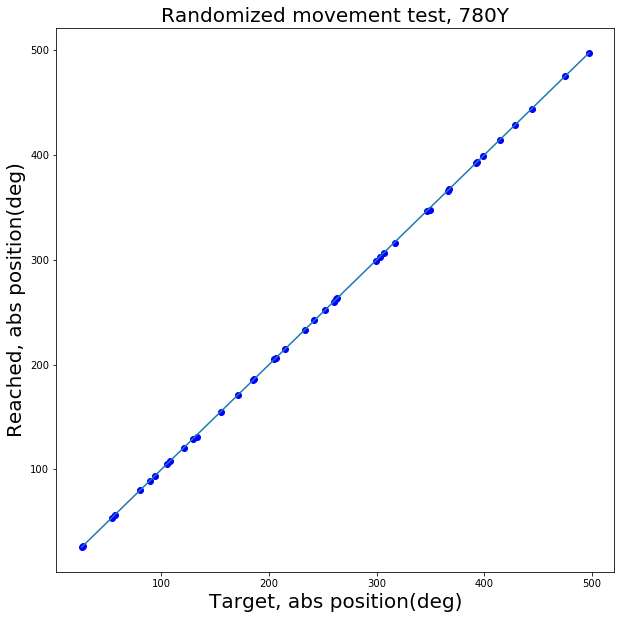

In [6]:
import matplotlib.pyplot as plt
values=np.linspace(np.min(random_sequence),np.max(random_sequence),2)
fig=plt.figure(figsize=(10,10));
plt.plot(np.insert(random_sequence,0,np.median(random_sequence)),positions, 'bo');
plt.plot(values,values)
plt.title('Randomized movement test, 780Y',fontsize=20)
plt.xlabel('Target, abs position(deg)',fontsize=20)
plt.ylabel('Reached, abs position(deg)',fontsize=20)
plt.savefig('Randomized_movement_test_780Y.pdf')
plt.savefig('Randomized_movement_test_780Y.png')
plt.show()

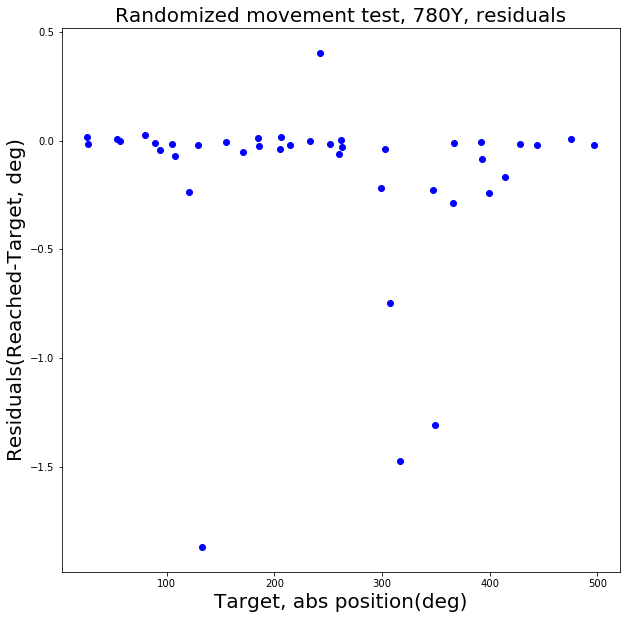

In [11]:
import matplotlib.pyplot as plt
values=np.linspace(np.min(random_sequence),np.max(random_sequence),2)
fig=plt.figure(figsize=(10,10));
plt.plot(np.insert(random_sequence,0,np.median(random_sequence)),positions-np.insert(random_sequence,0,np.median(random_sequence)), 'bo');
plt.title('Randomized movement test, 780Y, residuals',fontsize=20)
plt.xlabel('Target, abs position(deg)',fontsize=20)
plt.ylabel('Residuals(Reached-Target, deg)',fontsize=20)
plt.savefig('Randomized_movement_test_780Y,residuals.pdf')
plt.savefig('Randomized_movement_test_780Y,residuals.png')
plt.show()

In [65]:
positions

[0.0,
 19,
 31,
 262,
 115,
 198,
 92,
 117,
 116,
 178,
 170,
 285,
 137,
 207,
 258,
 285,
 181,
 263,
 260,
 154,
 242,
 266,
 236,
 293,
 244,
 231,
 264,
 80,
 83,
 158,
 254]

In [24]:
## other random tests

In [3]:
mc.getPosition(0)
mc.move_abs(0,220)
mc.getPosition(0)

INFO - Channel: 0 position: 220.034179688
INFO - Channel: 0 position: 220.034179688
INFO - Already within acceptable angle error, not moving
INFO - Channel: 0 position: 220.034179688


780
0
780
0
780
0


220.0341796875

In [36]:
# Implement escaping feature?
first=mc.getPosition(0)
mc.move_rel_steps(0,1000)
last=mc.getPosition(0)
print(last-first)

INFO - Channel: 0 position: 153.500976562
INFO - Response: ''

INFO - Sending next command(385): '1PR1000\r\n'


780
0
pos:3493


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 164.00390625


780
0
pos:3732
10.5029296875


In [14]:
testchannel=0
first=mc.getPosition(testchannel)
mc.move_rel_steps(testchannel,3000)
last=mc.getPosition(testchannel)
print(last-first)

INFO - Channel: 0 position: 186.723632812
INFO - Response: ''

INFO - Sending next command(26): '1PR3000\r\n'


780
0


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 224.560546875


780
0
37.8369140625
